In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from datetime import datetime
from geopy.geocoders import Nominatim
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly_express as px
import plotly.io as pio
pio.renderers.default = 'browser'
import reverse_geocoder as rg
from math import sqrt

## Data Preparation

In [2]:
or_df = pd.read_csv("database.csv")
or_df.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

In [3]:
def convert_date(Date):
    return pd.to_datetime(Date).strftime('%m/%d/%Y')

or_df['date'] = or_df['Date'].apply(convert_date)

In [4]:
or_df['month'] = pd.to_datetime(or_df['date']).dt.month
or_df['year'] = pd.to_datetime(or_df['date']).dt.year

In [5]:
or_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [6]:
or_df.groupby('Type').size()

Type
Earthquake           23232
Explosion                4
Nuclear Explosion      175
Rock Burst               1
dtype: int64

In [5]:
df = or_df[['month', 'year', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]

In [6]:
df = df.dropna()
df.describe()

month          year      Latitude     Longitude         Depth  \
count  23412.000000  23412.000000  23412.000000  23412.000000  23412.000000   
mean       6.537887   1992.632411      1.679033     39.639961     70.767911   
std        3.454541     14.426100     30.113183    125.511959    122.651898   
min        1.000000   1965.000000    -77.080000   -179.997000     -1.100000   
25%        4.000000   1981.000000    -18.653000    -76.349750     14.522500   
50%        7.000000   1993.000000     -3.568500    103.982000     33.000000   
75%       10.000000   2005.000000     26.190750    145.026250     54.000000   
max       12.000000   2016.000000     86.005000    179.998000    700.000000   

          Magnitude  
count  23412.000000  
mean       5.882531  
std        0.423066  
min        5.500000  
25%        5.600000  
50%        5.700000  
75%        6.000000  
max        9.100000

In [ ]:
#Run time 10 Hrs

# for i in range(len(df)):
#     coordinates = (df.Latitude[i],df.Longitude[i])
#     a= rg.search(coordinates) 
#     df['Impacted Country'] = a[0]['cc']
#     print(i, a[0]['cc'])

In [7]:
IC_df = df.copy()

In [8]:
countries = ['MP', 'ID', 'TO', 'GS', 'PH', 'VU', 'IN', 'VU', 'GS', 'FJ', 'ID', 'ID', 'RU', 'TO', 'TJ', 'AU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'GF', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'US', 'RU', 'RU', 'RU', 'RU', 'US', 'RU', 'RU', 'RU', 'RU', 'RU', 'VU', 'RU', 'RU', 'RU', 'ID', 'JP', 'RU', 'MP', 'IN', 'TL', 'RU', 'TO', 'CL', 'PG', 'RU', 'CO', 'MX', 'PG', 'PH', 'PG', 'PH', 'RU', 'MX', 'TR', 'TO', 'PG', 'RU', 'PG', 'RU', 'RU', 'AR', 'RU', 'PF', 'PH', 'TO', 'GR', 'US', 'AF', 'TW', 'JP', 'RU', 'TO', 'GS', 'ID', 'ID', 'TO', 'CL', 'TO', 'PH', 'RU', 'CL', 'JP', 'TO', 'RU', 'GR', 'PH', 'MX', 'RU', 'TO', 'GR', 'JP', 'JP', 'ID', 'RU', 'NZ', 'GR', 'TO', 'WF', 'VU', 'NZ', 'FJ', 'JP', 'JP', 'US', 'US', 'GS', 'GS', 'JP', 'FM', 'MP', 'ID', 'US', 'TW', 'TL', 'GR', 'EC', 'US', 'ID', 'US', 'JP', 'CL', 'SV', 'CL', 'CN', 'ID', 'ID', 'ID', 'PH', 'TW', 'SB', 'ID', 'PG', 'VU', 'ID', 'TO', 'RU', 'PH', 'RU', 'GS', 'TL', 'TO', 'GF', 'ID', 'RU', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'CL', 'JP', 'TR', 'MG', 'NZ', 'VU', 'CN', 'JP', 'US', 'IR', 'PH', 'US', 'PH', 'ZA', 'US', 'TW', 'PG', 'ID', 'RU', 'NZ', 'US', 'CN', 'VU', 'GR', 'JP', 'PG', 'ID', 'AR', 'PH', 'SB', 'PH', 'RU', 'ID', 'JP', 'RU', 'ID', 'US', 'US', 'US', 'CO', 'NZ', 'NZ', 'PE', 'PG', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'PG', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'PG', 'VU', 'SB', 'SH', 'ID', 'VU', 'VU', 'ID', 'BO', 'TO', 'ID', 'TR', 'MX', 'MX', 'JP', 'VU', 'ID', 'NZ', 'RU', 'RU', 'US', 'US', 'PA', 'PG', 'PG', 'MV', 'RU', 'CL', 'PH', 'PH', 'EC', 'JP', 'JP', 'JP', 'PH', 'JP', 'TH', 'PG', 'JP', 'GU', 'JP', 'GS', 'RU', 'TO', 'US', 'RU', 'FJ', 'GS', 'RU', 'CL', 'PH', 'GS', 'US', 'ID', 'SB', 'ID', 'RU', 'US', 'ID', 'RU', 'JP', 'ID', 'BR', 'CL', 'PG', 'CL', 'JP', 'CN', 'AR', 'JP', 'SH', 'PH', 'PT', 'JP', 'TL', 'TO', 'RU', 'TL', 'ID', 'US', 'US', 'ID', 'US', 'ID', 'JP', 'SB', 'CL', 'GR', 'ID', 'US', 'RU', 'MX', 'PG', 'NZ', 'MX', 'WF', 'SB', 'JP', 'JP', 'PN', 'PA', 'RU', 'US', 'CA', 'WF', 'PG', 'JP', 'US', 'PE', 'MM', 'ID', 'JP', 'RU', 'RU', 'JP', 'US', 'PK', 'GS', 'VU', 'RU', 'AR', 'ID', 'PH', 'TW', 'VU', 'GR', 'CN', 'RU', 'PK', 'PK', 'GS', 'ID', 'JP', 'MP', 'ID', 'CN', 'VU', 'TF', 'TF', 'PH', 'GS', 'JP', 'PG', 'TO', 'RU', 'JP', 'JP', 'CL', 'RU', 'NZ', 'CN', 'CN', 'CN', 'VU', 'ID', 'ID', 'BO', 'JP', 'TO', 'ZA', 'UG', 'TO', 'CN', 'CN', 'JP', 'VU', 'CN', 'CN', 'CR', 'MP', 'CN', 'JP', 'IN', 'AU', 'US', 'JP', 'RU', 'CR', 'VU', 'CL', 'MX', 'CL', 'CL', 'US', 'MP', 'RU', 'JP', 'JP', 'CL', 'US', 'ID', 'ID', 'PE', 'PG', 'ID', 'JP', 'GR', 'RU', 'RU', 'RU', 'JP', 'US', 'TL', 'CL', 'MX', 'US', 'MP', 'PH', 'JP', 'MP', 'ID', 'NC', 'NZ', 'JP', 'TO', 'RU', 'ID', 'JP', 'VU', 'AF', 'PH', 'PE', 'JP', 'FM', 'JP', 'US', 'FJ', 'VU', 'SB', 'SB', 'SB', 'SB', 'SB', 'RU', 'ID', 'JP', 'NP', 'NP', 'NP', 'NZ', 'VU', 'JP', 'RU', 'RU', 'US', 'JP', 'TO', 'RU', 'RU', 'US', 'WF', 'US', 'CL', 'PK', 'PK', 'PK', 'SB', 'US', 'SB', 'MX', 'MX', 'TO', 'TO', 'US', 'IN', 'PH', 'MV', 'AF', 'US', 'VU', 'ID', 'RU', 'GT', 'ID', 'ID', 'TR', 'PE', 'JP', 'TR', 'TO', 'PH', 'ID', 'NC', 'JP', 'TO', 'NC', 'NZ', 'US', 'ID', 'JP', 'CO', 'NC', 'US', 'GS', 'GS', 'TW', 'IR', 'MX', 'IN', 'CN', 'VU', 'US', 'WF', 'GS', 'ID', 'TO', 'JP', 'GS', 'PE', 'SH', 'VU', 'MP', 'GR', 'DO', 'TO', 'AR', 'US', 'CL', 'JP', 'VU', 'AG', 'JP', 'GS', 'VU', 'CL', 'PA', 'VU', 'ID', 'JP', 'GT', 'PG', 'PG', 'MM', 'NP', 'AR', 'US', 'VU', 'PG', 'JP', 'CL', 'CL', 'SB', 'SB', 'TO', 'SB', 'ZM', 'SB', 'SB', 'SB', 'SB', 'PH', 'VE', 'MN', 'MN', 'MN', 'JP', 'ID', 'AU', 'GU', 'ID', 'IR', 'SB', 'SB', 'AR', 'JP', 'RU', 'US', 'SB', 'MN', 'CL', 'MX', 'JP', 'SH', 'TJ', 'US', 'US', 'US', 'IN', 'EC', 'GS', 'ID', 'US', 'CO', 'GL', 'MM', 'VU', 'BR', 'TO', 'PG', 'ID', 'ID', 'IN', 'VU', 'JP', 'ID', 'ID', 'JP', 'EC', 'PH', 'TO', 'GR', 'SB', 'SB', 'SB', 'MX', 'CL', 'SD', 'IN', 'PG', 'PG', 'ID', 'JP', 'JP', 'JP', 'ID', 'JP', 'PG', 'CN', 'VU', 'ID', 'JP', 'JP', 'JP', 'PG', 'MP', 'MP', 'MP', 'ID', 'PG', 'PG', 'NZ', 'ID', 'ID', 'MX', 'ID', 'ID', 'GU', 'US', 'ID', 'GR', 'GS', 'SB', 'ID', 'KG', 'CL', 'AR', 'ID', 'GS', 'RU', 'IN', 'GU', 'US', 'PG', 'US', 'CL', 'ZA', 'RU', 'PE', 'TO', 'RU', 'GS', 'US', 'US', 'EC', 'US', 'CL', 'ID', 'VU', 'FM', 'FM', 'SB', 'NZ', 'TL', 'US', 'IN', 'JP', 'US', 'PH', 'ID', 'PA', 'ID', 'PW', 'NZ', 'TR', 'TR', 'CO', 'VE', 'TR', 'PE', 'ID', 'JP', 'TO', 'VU', 'JP', 'FR', 'PG', 'CN', 'ID', 'JP', 'PH', 'VU', 'CL', 'ID', 'GS', 'GS', 'RU', 'VU', 'FM', 'FM', 'CN', 'CN', 'JP', 'PG', 'PE', 'TO', 'MM', 'ID', 'FM', 'AR', 'PN', 'RU', 'JP', 'IN', 'US', 'PG', 'JP', 'GS', 'NZ', 'NZ', 'VU', 'JP', 'CL', 'CL', 'PG', 'US', 'JP', 'CR', 'PG', 'RU', 'PG', 'PG', 'TO', 'JP', 'TO', 'RU', 'TL', 'NI', 'ID', 'PH', 'SJ', 'NZ', 'TW', 'TW', 'ID', 'WF', 'JP', 'JP', 'JP', 'EC', 'WS', 'HN', 'ID', 'RU', 'ID', 'MV', 'TO', 'PG', 'CL', 'PT', 'JP', 'NC', 'NO', 'NC', 'YE', 'SJ', 'JP', 'ID', 'CL', 'JP', 'AL', 'RU', 'VU', 'SB', 'US', 'IN', 'RU', 'VU', 'RU', 'GU', 'CL', 'PG', 'AG', 'AG', 'PG', 'CL', 'CL', 'TO', 'PG', 'PG', 'US', 'PG', 'CL', 'PG', 'JP', 'TW', 'AR', 'TL', 'US', 'US', 'IT', 'SB', 'CL', 'FJ', 'TO', 'SH', 'ID', 'AF', 'RU', 'RU', 'RU', 'ID', 'RU', 'JP', 'MX', 'RU', 'ID', 'CL', 'JP', 'PG', 'ID', 'PG', 'GR', 'GF', 'JP', 'ID', 'NZ', 'JP', 'TW', 'FM', 'FM', 'JP', 'MV', 'ID', 'PH', 'PH', 'PG', 'PG', 'US', 'NZ', 'TO', 'ID', 'CL', 'GU', 'ID', 'PH', 'RU', 'ID', 'JP', 'JP', 'RU', 'US', 'JP', 'SH', 'TO', 'JP', 'US', 'TO', 'US', 'MX', 'RU', 'DO', 'ID', 'JP', 'CO', 'NZ', 'US', 'PE', 'PG', 'JP', 'ZM', 'TO', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'FM', 'JP', 'JP', 'JP', 'JP', 'JP', 'GS', 'JP', 'JP', 'JP', 'TO', 'RU', 'TO', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'NZ', 'JP', 'ID', 'NZ', 'JP', 'TO', 'ID', 'RU', 'JP', 'TO', 'JP', 'SB', 'JP', 'ID', 'ID', 'SB', 'RU', 'ZA', 'US', 'JP', 'ID', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'PA', 'RU', 'ZA', 'JP', 'SB', 'JP', 'PE', 'CL', 'PE', 'PE', 'JP', 'JP', 'JP', 'VU', 'JP', 'MX', 'TO', 'ID', 'JP', 'ID', 'TF', 'JP', 'JP', 'JP', 'TL', 'IN', 'PG', 'SH', 'VU', 'JP', 'TO', 'JP', 'FJ', 'RU', 'TO', 'ID', 'PE', 'TO', 'PH', 'IR', 'MX', 'JP', 'PH', 'PH', 'JP', 'JP', 'JP', 'ID', 'ID', 'ID', 'ID', 'PE', 'US', 'ID', 'ID', 'VU', 'PH', 'MX', 'ID', 'VU', 'JP', 'MX', 'ID', 'SB', 'ID', 'FM', 'TO', 'RU', 'BO', 'JP', 'JP', 'TO', 'FJ', 'GU', 'FJ', 'PH', 'IR', 'IR', 'TR', 'AI', 'JP', 'GS', 'PG', 'PE', 'CL', 'TO', 'IR', 'JP', 'PG', 'PG', 'TO', 'VU', 'VE', 'JP', 'AR', 'NZ', 'MX', 'WF', 'TO', 'TO', 'TL', 'PG', 'PE', 'ID', 'GS', 'TO', 'JP', 'JP', 'TF', 'AR', 'PG', 'TO', 'AU', 'ID', 'JP', 'TW', 'JP', 'PG', 'PG', 'PH', 'RU', 'JP', 'SB', 'JP', 'US', 'ID', 'PE', 'VU', 'ID', 'JP', 'JP', 'JP', 'FJ', 'VE', 'ID', 'SH', 'PH', 'ID', 'PH', 'TO', 'JP', 'ID', 'SH', 'PG', 'MX', 'PG', 'ZM', 'GR', 'IS', 'PG', 'RU', 'CL', 'VU', 'ID', 'PH', 'WF', 'RU', 'RU', 'RU', 'US', 'TO', 'AF', 'RU', 'US', 'CN', 'US', 'US', 'US', 'GS', 'IR', 'US', 'ID', 'SB', 'SB', 'GU', 'JP', 'SB', 'TR', 'GS', 'JP', 'VU', 'SB', 'RU', 'RU', 'TO', 'ID', 'RU', 'FM', 'TO', 'ID', 'ID', 'ID', 'TO', 'PH', 'ID', 'ID', 'ID', 'ID', 'ID', 'PE', 'FJ', 'FJ', 'CN', 'TL', 'VU', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'PT', 'PT', 'TR', 'RU', 'ID', 'AF', 'JP', 'ID', 'ID', 'PG', 'NI', 'ID', 'US', 'JP', 'JP', 'JP', 'MX', 'PH', 'PH', 'JP', 'MX', 'TO', 'TR', 'TR', 'ID', 'ID', 'TR', 'ET', 'ET', 'YE', 'EG', 'JP', 'RU', 'MX', 'RU', 'ET', 'EC', 'TR', 'RU', 'ZA', 'JP', 'RU', 'IN', 'ID', 'JP', 'ID', 'PG', 'VU', 'VU', 'JP', 'ID', 'GT', 'JP', 'CL', 'JP', 'YE', 'PA', 'CL', 'CL', 'ID', 'GS', 'TO', 'SB', 'TO', 'VU', 'NI', 'JP', 'ID', 'US', 'AF', 'GP', 'SB', 'PH', 'US', 'TO', 'GS', 'PH', 'EC', 'TO', 'TO', 'TO', 'JP', 'GR', 'RU', 'SB', 'MP', 'NZ', 'US', 'JP', 'US', 'ID', 'RU', 'US', 'MX', 'PG', 'PH', 'TO', 'AQ', 'AU', 'ID', 'MP', 'ID', 'RU', 'JP', 'RU', 'CN', 'BO', 'PE', 'ID', 'SB', 'JP', 'PE', 'ZA', 'ID', 'CN', 'SB', 'US', 'JP', 'VU', 'US', 'JP', 'JP', 'PG', 'JP', 'JP', 'ID', 'ID', 'PG', 'PG', 'AF', 'SH', 'ID', 'RU', 'RU', 'RU', 'JP', 'RU', 'RU', 'ID', 'RU', 'RU', 'RU', 'JP', 'RU', 'RU', 'RU', 'JP', 'ID', 'RU', 'RU', 'RU', 'RU', 'RU', 'JP', 'PG', 'RU', 'RU', 'MP', 'RU', 'RU', 'RU', 'JP', 'MX', 'MX', 'PN', 'MX', 'MX', 'JP', 'RU', 'RU', 'RU', 'RU', 'RU', 'PG', 'TO', 'RU', 'JP', 'TO', 'RU', 'RU', 'RU', 'RU', 'AR', 'JP', 'RU', 'RU', 'TW', 'RU', 'PT', 'SB', 'SB', 'SB', 'JP', 'JP', 'US', 'US', 'RU', 'CN', 'CN', 'RU', 'JP', 'JP', 'US', 'JP', 'JP', 'PH', 'GL', 'PG', 'EC', 'ID', 'BR', 'MX', 'GF', 'RU', 'FK', 'TL', 'RU', 'ZA', 'TO', 'PE', 'PE', 'PE', 'EC', 'GS', 'NZ', 'PH', 'GR', 'VU', 'MM', 'RU', 'MX', 'US', 'PG', 'PE', 'US', 'US', 'RU', 'TO', 'BA', 'ZA', 'BA', 'JP', 'US', 'MX', 'US', 'US', 'IR', 'VU', 'PG', 'US', 'CL', 'US', 'ID', 'RU', 'TJ', 'US', 'VU', 'GS', 'GP', 'PH', 'JP', 'ID', 'VU', 'BR', 'ID', 'ID', 'YE', 'RU', 'JP', 'RU', 'GP', 'GP', 'GP', 'US', 'GP', 'RU', 'GP', 'JP', 'TO', 'CN', 'CN', 'PG', 'GP', 'NZ', 'ID', 'PH', 'PH', 'PH', 'PH', 'ID', 'US', 'MP', 'TO', 'PG', 'JP', 'MX', 'RU', 'RU', 'VU', 'SB', 'VE', 'TO', 'VU', 'RU', 'RU', 'RU', 'RU', 'MX', 'CN', 'RU', 'RU', 'PH', 'RU', 'PH', 'CN', 'RU', 'RU', 'ID', 'ID', 'PE', 'ID', 'PH', 'NC', 'TO', 'ID', 'IR', 'CN', 'US', 'TW', 'PH', 'RU', 'RU', 'US', 'ID', 'US', 'IR', 'GU', 'TO', 'PH', 'ID', 'JP', 'VU', 'JP', 'PH', 'AU', 'US', 'AR', 'VU', 'RU', 'PH', 'MP', 'JP', 'JP', 'AU', 'US', 'ID', 'PG', 'TR', 'VU', 'PH', 'PE', 'MV', 'JP', 'TO', 'TO', 'PH', 'PH', 'PH', 'GR', 'VU', 'PH', 'JP', 'GT', 'TO', 'US', 'TO', 'PH', 'PH', 'PH', 'TO', 'ZA', 'PH', 'JP', 'US', 'US', 'RU', 'US', 'TR', 'TR', 'VU', 'ID', 'ID', 'TR', 'RU', 'SB', 'SB', 'RU', 'MX', 'MX', 'PN', 'MX', 'MX', 'MX', 'MX', 'PH', 'MX', 'MX', 'ID', 'TF', 'PG', 'MP', 'PG', 'RU', 'RU', 'MX', 'MN', 'PG', 'GS', 'US', 'GS', 'JP', 'JP', 'JP', 'JP', 'RU', 'TO', 'SB', 'PH', 'PE', 'PE', 'PE', 'PE', 'PE', 'PE', 'PA', 'PE', 'PE', 'KG', 'RU', 'RU', 'TO', 'JP', 'CL', 'NZ', 'US', 'ID', 'CL', 'AR', 'PA', 'PE', 'NZ', 'CL', 'GF', 'US', 'RU', 'CA', 'CA', 'SB', 'PE', 'ID', 'ID', 'RU', 'TO', 'PE', 'ID', 'PE', 'AU', 'PH', 'VI', 'JP', 'JP', 'PH', 'PH', 'TO', 'TO', 'US', 'PG', 'TO', 'JP', 'JP', 'NZ', 'CN', 'IN', 'IR', 'YE', 'PE', 'TO', 'SB', 'ID', 'PE', 'WF', 'ID', 'VU', 'SH', 'VU', 'GS', 'VU', 'VU', 'NI', 'NI', 'ID', 'PH', 'US', 'SB', 'PN', 'PH', 'TO', 'MX', 'PG', 'NZ', 'RU', 'RU', 'RU', 'MP', 'VU', 'RU', 'CL', 'JP', 'CL', 'PH', 'GU', 'CL', 'PG', 'PG', 'RU', 'CO', 'CO', 'CO', 'GS', 'RU', 'VU', 'PH', 'PG', 'TO', 'ID', 'RU', 'RU', 'LK', 'TO', 'TO', 'TO', 'PG', 'RU', 'RU', 'RU', 'JP', 'SJ', 'CL', 'CL', 'MU', 'IN', 'SJ', 'TF', 'PG', 'GS', 'US', 'PH', 'PA', 'PH', 'PH', 'ID', 'IR', 'TO', 'PG', 'CL', 'PH', 'GU', 'TW', 'PG', 'ID', 'PT', 'FJ', 'CL', 'JP', 'RU', 'ID', 'PH', 'MP', 'RU', 'ID', 'US', 'JP', 'ID', 'CL', 'CL', 'PG', 'SH', 'PG', 'SB', 'US', 'TO', 'US', 'SB', 'CO', 'ID', 'CL', 'ID', 'ID', 'JP', 'JP', 'CL', 'MX', 'PE', 'US', 'PE', 'ID', 'PE', 'TO', 'EC', 'VU', 'CO', 'GS', 'PH', 'ID', 'ID', 'GU', 'ID', 'MX', 'SH', 'PG', 'SB', 'PE', 'ID', 'ID', 'SH', 'CL', 'JP', 'JP', 'US', 'RU', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'FM', 'ID', 'ID', 'ID', 'GS', 'ID', 'JP', 'ID', 'MX', 'PA', 'PG', 'PE', 'ID', 'PG', 'US', 'US', 'ID', 'RU', 'US', 'TO', 'MP', 'ID', 'CA', 'CL', 'ID', 'RU', 'US', 'US', 'US', 'AR', 'US', 'US', 'US', 'PG', 'ID', 'PG', 'IR', 'FJ', 'TW', 'CL', 'AR', 'TR', 'PH', 'JP', 'ID', 'SB', 'RU', 'JP', 'FJ', 'PG', 'CA', 'JP', 'VU', 'SB', 'PH', 'ID', 'MX', 'ID', 'SH', 'JP', 'TO', 'SJ', 'CN', 'CN', 'PG', 'CN', 'JP', 'CA', 'US', 'IN', 'ID', 'US', 'PH', 'PH', 'PH', 'CN', 'CL', 'JP', 'ID', 'US', 'JP', 'TO', 'FJ', 'ID', 'AR', 'ID', 'JP', 'TO', 'IR', 'TO', 'WF', 'MX', 'PG', 'EC', 'CL', 'ID', 'TO', 'CN', 'PH', 'PH', 'VU', 'US', 'CN', 'SB', 'ID', 'ID', 'AR', 'CL', 'CL', 'CL', 'AF', 'PH', 'TW', 'TR', 'TR', 'TR', 'JP', 'EC', 'NZ', 'AR', 'RU', 'ID', 'US', 'US', 'TR', 'CN', 'TR', 'JP', 'TO', 'IR', 'JP', 'GT', 'JP', 'MM', 'SJ', 'MM', 'IN', 'PH', 'CR', 'PE', 'US', 'JP', 'PE', 'DO', 'RU', 'JP', 'RU', 'CN', 'CN', 'CL', 'JP', 'ID', 'FJ', 'CL', 'ID', 'PH', 'ID', 'TO', 'CL', 'PH', 'TL', 'CL', 'PG', 'PG', 'CL', 'RU', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'ID', 'FJ', 'ID', 'IN', 'CL', 'PG', 'PG', 'PG', 'PG', 'JP', 'PH', 'FJ', 'PG', 'PG', 'JP', 'PH', 'ID', 'RU', 'PG', 'CN', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'EC', 'PG', 'MM', 'PG', 'PG', 'PG', 'PG', 'PG', 'RU', 'ID', 'PG', 'PG', 'CL', 'PG', 'JP', 'ID', 'JP', 'AF', 'SH', 'VU', 'IR', 'PG', 'PG', 'PG', 'PG', 'ID', 'AQ', 'IN', 'MX', 'PG', 'VU', 'WF', 'WF', 'AR', 'CN', 'CN', 'CN', 'TO', 'TW', 'RU', 'GT', 'CL', 'PG', 'JP', 'RU', 'GS', 'TO', 'JP', 'PH', 'SB', 'TO', 'US', 'RU', 'RU', 'RU', 'RU', 'RU', 'JP', 'RU', 'RU', 'ID', 'JP', 'TO', 'TO', 'DO', 'SB', 'CN', 'PG', 'JP', 'ID', 'JP', 'MX', 'US', 'JP', 'PE', 'PG', 'CL', 'GS', 'ID', 'ID', 'PG', 'RU', 'PG', 'SB', 'AR', 'MX', 'CI', 'RU', 'PG', 'PG', 'VU', 'PG', 'PG', 'WF', 'JP', 'TW', 'GT', 'US', 'CL', 'SH', 'PE', 'PG', 'ID', 'NC', 'US', 'TW', 'JP', 'AU', 'GU', 'GS', 'GU', 'GU', 'VU', 'GU', 'PH', 'VU', 'VU', 'PG', 'VU', 'RU', 'JP', 'TW', 'IN', 'ID', 'EC', 'IR', 'PH', 'ID', 'UZ', 'TO', 'CA', 'SB', 'SB', 'RU', 'ID', 'JP', 'RU', 'JP', 'AR', 'PE', 'JP', 'PG', 'PH', 'CA', 'ZA', 'ID', 'CA', 'CA', 'CL', 'IR', 'VU', 'ID', 'PG', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'US', 'PG', 'TO', 'IN', 'PG', 'PH', 'FJ', 'MX', 'RU', 'TW', 'ID', 'PG', 'ID', 'TO', 'TW', 'TW', 'GS', 'BR', 'CN', 'RU', 'TO', 'CN', 'RU', 'PG', 'PG', 'AF', 'BR', 'GT', 'VU', 'VU', 'VU', 'TO', 'TW', 'TW', 'ID', 'TO', 'VU', 'TW', 'SB', 'PG', 'CL', 'GU', 'CR', 'PH', 'CL', 'TO', 'GS', 'BR', 'SB', 'PE', 'SB', 'PG', 'SB', 'JP', 'MX', 'US', 'TO', 'US', 'GS', 'RU', 'JP', 'JP', 'TO', 'US', 'CL', 'JP', 'TO', 'JP', 'TO', 'ID', 'JP', 'TR', 'RU', 'TO', 'JP', 'JP', 'PE', 'US', 'US', 'RU', 'TO', 'TO', 'US', 'PH', 'RU', 'TO', 'PG', 'JP', 'WF', 'TO', 'FJ', 'CL', 'GS', 'NZ', 'TO', 'TO', 'VU', 'GL', 'ID', 'GS', 'BR', 'US', 'CN', 'IR', 'BR', 'TO', 'JP', 'US', 'TO', 'ID', 'CL', 'TO', 'TW', 'TW', 'PH', 'VU', 'PH', 'JP', 'PG', 'PG', 'PH', 'PH', 'MX', 'JP', 'ID', 'VU', 'GR', 'TW', 'PG', 'PG', 'PN', 'ID', 'TO', 'WF', 'PG', 'ID', 'JP', 'TO', 'TW', 'TO', 'CL', 'ID', 'TO', 'AR', 'PH', 'PE', 'PH', 'TO', 'VU', 'PH', 'RU', 'ID', 'ID', 'US', 'PT', 'ID', 'TL', 'TW', 'AR', 'CL', 'TO', 'ID', 'PG', 'VU', 'CO', 'IR', 'US', 'TO', 'JP', 'JP', 'AF', 'ID', 'RU', 'EG', 'WF', 'IR', 'MP', 'PH', 'JP', 'PH', 'CA', 'PH', 'AF', 'MX', 'PG', 'TO', 'NZ', 'ID', 'TO', 'CN', 'CA', 'TO', 'ID', 'RU', 'PG', 'PG', 'US', 'ID', 'JP', 'JP', 'ID', 'ID', 'TO', 'RU', 'US', 'US', 'US', 'US', 'RU', 'SB', 'SB', 'SB', 'PK', 'SB', 'SB', 'TO', 'VU', 'TO', 'US', 'PA', 'CL', 'ID', 'PG', 'US', 'PG', 'PG', 'ID', 'JP', 'RU', 'PG', 'US', 'ID', 'AU', 'US', 'TO', 'TO', 'PG', 'CN', 'JP', 'RU', 'VU', 'JP', 'PG', 'PK', 'PK', 'PK', 'SB', 'PE', 'TL', 'ID', 'VU', 'MV', 'PG', 'ID', 'SJ', 'TO', 'VU', 'PG', 'PG', 'ID', 'GR', 'VU', 'VU', 'VU', 'VU', 'MX', 'ID', 'SB', 'GR', 'PK', 'ID', 'DO', 'PG', 'TO', 'ID', 'TO', 'ID', 'TW', 'TW', 'ID', 'ID', 'AR', 'TO', 'TO', 'PH', 'CL', 'RU', 'PG', 'PG', 'BO', 'PK', 'ID', 'ID', 'US', 'JP', 'NZ', 'NZ', 'VU', 'ID', 'ID', 'CV', 'MX', 'US', 'MP', 'SJ', 'JP', 'VU', 'VU', 'ID', 'PG', 'VU', 'JP', 'PG', 'JP', 'ID', 'VU', 'VU', 'BO', 'VU', 'PG', 'ID', 'ID', 'PG', 'AR', 'TW', 'TO', 'VU', 'TW', 'RU', 'GU', 'TJ', 'MX', 'JP', 'AU', 'AF', 'SV', 'SJ', 'MP', 'TW', 'RU', 'VU', 'TO', 'SJ', 'TO', 'TO', 'PH', 'ID', 'ID', 'ID', 'PH', 'PH', 'PH', 'ID', 'PH', 'PH', 'JP', 'JP', 'ID', 'ID', 'ID', 'ID', 'MV', 'ID', 'ID', 'ID', 'PH', 'ID', 'ID', 'PH', 'GF', 'JP', 'GU', 'JP', 'PH', 'ID', 'PG', 'JP', 'PG', 'ZM', 'TO', 'ID', 'PG', 'TO', 'GS', 'TO', 'NI', 'VU', 'RU', 'US', 'NC', 'PH', 'AF', 'GS', 'CL', 'SH', 'ID', 'AR', 'TJ', 'NZ', 'VU', 'SB', 'SB', 'ZA', 'ZA', 'JP', 'ID', 'TO', 'PG', 'PK', 'TO', 'MX', 'SB', 'ID', 'ID', 'VU', 'MX', 'JP', 'AR', 'GS', 'JP', 'CN', 'GS', 'CN', 'AU', 'MX', 'RU', 'PH', 'WF', 'TW', 'SB', 'ID', 'TO', 'TO', 'KZ', 'PG', 'AG', 'TL', 'SH', 'TO', 'ZA', 'AQ', 'US', 'EC', 'VU', 'GS', 'ID', 'RU', 'RU', 'ID', 'RU', 'RU', 'GS', 'RU', 'NZ', 'TO', 'PH', 'AU', 'TO', 'JP', 'RU', 'ID', 'RU', 'PG', 'AQ', 'PG', 'ID', 'ID', 'ID', 'VU', 'PH', 'ID', 'ID', 'NZ', 'RU', 'AR', 'ID', 'NC', 'RU', 'JP', 'ID', 'JP', 'NZ', 'MX', 'JP', 'AR', 'RU', 'PG', 'JP', 'GS', 'DJ', 'CO', 'RU', 'RU', 'ID', 'SH', 'CL', 'VU', 'TO', 'JP', 'ID', 'ID', 'RU', 'CR', 'TO', 'US', 'ID', 'RU', 'NZ', 'CO', 'PA', 'CO', 'AQ', 'JP', 'GS', 'US', 'EC', 'ID', 'PG', 'PG', 'TF', 'ID', 'ID', 'WF', 'ID', 'PG', 'PG', 'JP', 'FJ', 'ID', 'CN', 'JP', 'PG', 'PG', 'US', 'MU', 'RU', 'US', 'EC', 'IN', 'AU', 'CN', 'VU', 'US', 'NZ', 'GT', 'GT', 'VU', 'SB', 'RU', 'JP', 'VU', 'NZ', 'VU', 'ID', 'ID', 'RU', 'US', 'RU', 'TO', 'US', 'JP', 'RU', 'JP', 'JP', 'JP', 'RU', 'RU', 'JP', 'JP', 'JP', 'JP', 'JP', 'FM', 'TO', 'JP', 'TO', 'RU', 'US', 'RU', 'RU', 'RU', 'RU', 'MP', 'PH', 'ID', 'RU', 'RU', 'RU', 'VU', 'MP', 'JP', 'US', 'MX', 'PH', 'PH', 'CA', 'ZA', 'RU', 'PH', 'CL', 'VU', 'CO', 'IN', 'CL', 'PG', 'CL', 'CN', 'CN', 'ID', 'MX', 'CL', 'WF', 'VU', 'ID', 'JP', 'TO', 'KZ', 'CL', 'SB', 'AU', 'ID', 'TO', 'TW', 'JP', 'PE', 'PE', 'CL', 'CL', 'SB', 'VU', 'CL', 'ID', 'CL', 'TO', 'CL', 'PN', 'CL', 'CL', 'GS', 'ID', 'RU', 'AU', 'CN', 'PG', 'CL', 'CN', 'CN', 'US', 'US', 'PH', 'RO', 'ID', 'NZ', 'US', 'PG', 'JP', 'PG', 'FM', 'JP', 'VU', 'MX', 'SH', 'NZ', 'NZ', 'CO', 'LK', 'JP', 'JP', 'US', 'PG', 'PG', 'CN', 'PE', 'CN', 'JP', 'RU', 'MV', 'JP', 'RU', 'PH', 'CO', 'TO', 'PE', 'PN', 'PH', 'EC', 'EC', 'FJ', 'AG', 'GP', 'PH', 'PH', 'NZ', 'AU', 'AU', 'RU', 'SJ', 'SO', 'KP', 'ID', 'JP', 'JP', 'ID', 'MX', 'VU', 'CL', 'CL', 'CL', 'GS', 'VU', 'BR', 'AF', 'MX', 'NZ', 'PH', 'BO', 'RU', 'NZ', 'ID', 'TO', 'AR', 'ID', 'GR', 'FJ', 'PG', 'FJ', 'US', 'US', 'RU', 'NO', 'RU', 'PE', 'RU', 'IR', 'PG', 'JP', 'WF', 'SH', 'AU', 'MV', 'AR', 'JP', 'CL', 'JP', 'JP', 'JP', 'GS', 'RU', 'ZA', 'ID', 'PG', 'GR', 'GS', 'VU', 'GS', 'VU', 'ID', 'PG', 'CL', 'RU', 'RU', 'GS', 'US', 'GS', 'ID', 'SB', 'VU', 'VU', 'GS', 'GU', 'KZ', 'US', 'VU', 'RU', 'ID', 'TO', 'TL', 'PN', 'TO', 'JP', 'FJ', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'CL', 'RU', 'TO', 'VU', 'TO', 'CL', 'JP', 'VU', 'CN', 'PE', 'VU', 'EC', 'AR', 'MG', 'VU', 'VU', 'VU', 'PG', 'TL', 'RU', 'SB', 'TO', 'CN', 'ID', 'AU', 'SH', 'VU', 'RU', 'JP', 'MP', 'MX', 'GU', 'TL', 'ID', 'ID', 'JP', 'US', 'SB', 'PG', 'SH', 'SB', 'PG', 'PG', 'VU', 'ID', 'PG', 'ID', 'PH', 'PG', 'ID', 'US', 'ID', 'VU', 'ID', 'PH', 'ID', 'ID', 'IN', 'IN', 'MP', 'PH', 'AR', 'JP', 'RU', 'RU', 'GU', 'ID', 'VU', 'NZ', 'NZ', 'CR', 'JP', 'VU', 'TO', 'NI', 'TL', 'JP', 'SB', 'SB', 'EC', 'FK', 'RU', 'FM', 'PG', 'VU', 'ID', 'WS', 'MN', 'VU', 'ZA', 'FJ', 'FJ', 'VU', 'GU', 'NP', 'TO', 'US', 'US', 'ID', 'PG', 'AR', 'US', 'US', 'NZ', 'JP', 'FM', 'RO', 'ID', 'CL', 'FJ', 'US', 'NC', 'NC', 'JP', 'CN', 'ID', 'CL', 'ID', 'PE', 'TO', 'MP', 'FJ', 'TW', 'VU', 'JP', 'TO', 'WF', 'GF', 'JP', 'NC', 'ZA', 'EC', 'CN', 'ID', 'MP', 'SH', 'ID', 'BO', 'PG', 'AF', 'ID', 'ZA', 'PG', 'RU', 'NI', 'PE', 'JP', 'ID', 'PG', 'VU', 'TO', 'VU', 'VU', 'RU', 'US', 'KZ', 'MX', 'ID', 'TO', 'NZ', 'PG', 'MV', 'TO', 'PA', 'PE', 'VE', 'IS', 'GS', 'RU', 'CN', 'RE', 'CL', 'PG', 'GS', 'US', 'PG', 'MP', 'PN', 'MX', 'CC', 'AU', 'CL', 'JP', 'PG', 'VU', 'VU', 'AR', 'SH', 'TO', 'TO', 'MN', 'GS', 'JP', 'PA', 'CO', 'PA', 'PA', 'ID', 'TO', 'MX', 'PG', 'TO', 'VU', 'GS', 'TO', 'PG', 'ID', 'RU', 'ID', 'JP', 'JP', 'RU', 'AF', 'ID', 'NC', 'US', 'US', 'US', 'TF', 'JP', 'TO', 'GS', 'JP', 'PE', 'TO', 'KG', 'KG', 'KG', 'KG', 'WF', 'US', 'AU', 'PG', 'US', 'RU', 'AR', 'SB', 'CL', 'US', 'CL', 'RU', 'TL', 'CO', 'US', 'JP', 'KG', 'AR', 'RU', 'ID', 'JP', 'ID', 'PH', 'PH', 'LY', 'TL', 'AF', 'PG', 'MQ', 'ID', 'VU', 'PG', 'GS', 'TO', 'ID', 'GS', 'RU', 'AR', 'RU', 'ID', 'JP', 'PG', 'ID', 'NZ', 'TO', 'RU', 'GA', 'JP', 'CO', 'CN', 'RU', 'FM', 'PE', 'PE', 'PK', 'GS', 'AG', 'JP', 'JP', 'JP', 'ID', 'CL', 'AU', 'JP', 'ID', 'JP', 'JP', 'TO', 'GL', 'KZ', 'JP', 'PG', 'PN', 'ID', 'PG', 'PG', 'WF', 'RU', 'IS', 'PG', 'AU', 'MX', 'PG', 'VU', 'TL', 'JP', 'RU', 'TO', 'JP', 'GS', 'PE', 'ID', 'WF', 'US', 'TO', 'CL', 'ID', 'AU', 'US', 'JP', 'ID', 'PH', 'PH', 'PG', 'PG', 'VU', 'GS', 'MX', 'TL', 'PG', 'VU', 'VU', 'JP', 'AR', 'US', 'PH', 'PG', 'ID', 'ID', 'PE', 'US', 'AF', 'ID', 'ID', 'CL', 'AU', 'PA', 'WF', 'WF', 'ID', 'RU', 'KZ', 'PK', 'CL', 'US', 'GT', 'US', 'US', 'ID', 'JP', 'MP', 'RU', 'GS', 'GS', 'JP', 'ID', 'NZ', 'US', 'ID', 'ID', 'ID', 'CN', 'ID', 'TO', 'ID', 'TO', 'CN', 'CN', 'JP', 'MM', 'AR', 'JP', 'CO', 'ID', 'RU', 'RU', 'RU', 'ID', 'CN', 'GS', 'PG', 'ID', 'PG', 'TH', 'KZ', 'MX', 'US', 'TO', 'PH', 'CL', 'SB', 'PG', 'RU', 'GR', 'PG', 'CL', 'PG', 'WF', 'ID', 'PE', 'ID', 'ID', 'VU', 'VE', 'GS', 'IR', 'CL', 'VU', 'MX', 'ID', 'TR', 'TR', 'ID', 'ID', 'PE', 'PE', 'CN', 'TW', 'JP', 'PK', 'AR', 'NZ', 'TR', 'GS', 'US', 'SO', 'ZA', 'JP', 'JP', 'TO', 'ID', 'TO', 'MG', 'VE', 'RU', 'RU', 'CO', 'RU', 'RU', 'JP', 'PG', 'TJ', 'AU', 'AU', 'US', 'WF', 'PE', 'PH', 'SJ', 'RU', 'ID', 'PN', 'CL', 'JP', 'MX', 'KZ', 'SB', 'CN', 'CN', 'NZ', 'TR', 'AU', 'JP', 'CN', 'TO', 'JP', 'ID', 'NZ', 'CL', 'RU', 'ID', 'AF', 'RU', 'TO', 'CN', 'ID', 'CA', 'TW', 'TO', 'WF', 'VU', 'US', 'PG', 'PT', 'PT', 'ID', 'CL', 'FJ', 'MM', 'AU', 'PH', 'PH', 'CN', 'PE', 'PE', 'TO', 'PG', 'JP', 'KZ', 'NZ', 'RU', 'RU', 'RU', 'RU', 'RU', 'PH', 'RU', 'TO', 'CL', 'RU', 'GS', 'JP', 'RU', 'RU', 'RU', 'FM', 'PG', 'GS', 'VU', 'JP', 'RU', 'PG', 'RU', 'CL', 'JP', 'MX', 'US', 'KR', 'US', 'TO', 'ID', 'MP', 'JP', 'MX', 'MM', 'JP', 'PH', 'EC', 'SB', 'PE', 'VU', 'TO', 'ID', 'TF', 'TO', 'TO', 'JP', 'JP', 'AU', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'ID', 'PG', 'PG', 'YE', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'TO', 'AU', 'US', 'ID', 'PG', 'CN', 'ID', 'ID', 'ID', 'MG', 'ID', 'PG', 'PG', 'US', 'US', 'US', 'PE', 'PT', 'JP', 'PG', 'ID', 'VU', 'AR', 'PH', 'PE', 'JP', 'PG', 'JP', 'RU', 'PE', 'TO', 'TO', 'MX', 'TO', 'PG', 'ID', 'RU', 'RU', 'PH', 'PG', 'PG', 'BO', 'GF', 'VU', 'ID', 'JP', 'JP', 'ID', 'NZ', 'TR', 'CN', 'VU', 'MX', 'RU', 'SB', 'NZ', 'PG', 'JP', 'TF', 'JP', 'PG', 'VU', 'PG', 'TZ', 'JP', 'TO', 'SH', 'MX', 'TL', 'PG', 'ID', 'PG', 'PE', 'SB', 'ID', 'ID', 'ID', 'ID', 'JP', 'AF', 'AU', 'ID', 'ID', 'SB', 'AF', 'ID', 'PA', 'PH', 'VU', 'ID', 'VU', 'BR', 'BR', 'AR', 'VU', 'VU', 'TO', 'TO', 'PG', 'TO', 'TL', 'ID', 'TL', 'US', 'RU', 'WF', 'RU', 'PH', 'PH', 'GS', 'PH', 'ID', 'PH', 'ID', 'PH', 'CL', 'US', 'KZ', 'MX', 'PE', 'JP', 'VU', 'PH', 'PH', 'PH', 'US', 'GU', 'PH', 'TO', 'TO', 'RU', 'PH', 'SB', 'PH', 'PH', 'JP', 'JP', 'ID', 'MX', 'PH', 'ID', 'PH', 'ID', 'SB', 'PG', 'FJ', 'RU', 'ID', 'PA', 'PH', 'RU', 'ID', 'SB', 'GS', 'TO', 'AU', 'GS', 'US', 'US', 'PG', 'US', 'PH', 'SH', 'ID', 'RU', 'PH', 'PG', 'PH', 'WS', 'JP', 'PE', 'PH', 'BR', 'ID', 'PG', 'PG', 'ID', 'SB', 'RU', 'SB', 'IR', 'SB', 'KZ', 'ID', 'PG', 'TO', 'RU', 'WS', 'WS', 'ID', 'AR', 'GR', 'TO', 'TO', 'TO', 'VU', 'JP', 'US', 'ID', 'PE', 'RU', 'RU', 'CL', 'ID', 'RU', 'RU', 'ID', 'VU', 'MG', 'CL', 'IS', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'NZ', 'SJ', 'NC', 'TO', 'GR', 'TO', 'JP', 'JP', 'JP', 'JP', 'JP', 'NZ', 'RU', 'JP', 'JP', 'ID', 'AU', 'TO', 'JP', 'JP', 'TO', 'TO', 'TO', 'PG', 'TO', 'JP', 'TO', 'TO', 'TL', 'MX', 'ID', 'RU', 'TO', 'FJ', 'TO', 'RU', 'GT', 'JP', 'CL', 'JP', 'PG', 'GT', 'HN', 'MX', 'JP', 'PG', 'WS', 'PG', 'US', 'SB', 'PH', 'PH', 'AR', 'JP', 'TO', 'ID', 'PH', 'VE', 'TO', 'TO', 'PG', 'CU', 'GT', 'NC', 'PG', 'ID', 'PG', 'TW', 'CA', 'BO', 'CL', 'SB', 'PG', 'ID', 'VU', 'ID', 'PG', 'SB', 'SB', 'GP', 'PG', 'US', 'US', 'AF', 'TW', 'NZ', 'TO', 'GS', 'SB', 'EC', 'GS', 'TF', 'TF', 'TO', 'GU', 'ID', 'PT', 'PA', 'JP', 'VU', 'JP', 'GS', 'AQ', 'TO', 'CN', 'MM', 'PG', 'MP', 'CL', 'UZ', 'UZ', 'EC', 'ID', 'PG', 'WF', 'NZ', 'TW', 'AU', 'CL', 'JP', 'ID', 'US', 'PG', 'IN', 'BA', 'IR', 'JP', 'CL', 'AU', 'PG', 'TO', 'AQ', 'TR', 'PG', 'BR', 'TO', 'NZ', 'TO', 'TO', 'CL', 'IT', 'IT', 'CL', 'PG', 'PG', 'PG', 'PG', 'AU', 'AU', 'GR', 'ID', 'GF', 'PG', 'CD', 'PE', 'PN', 'UZ', 'AU', 'CO', 'TO', 'TO', 'ID', 'PG', 'JP', 'PG', 'TO', 'PG', 'PG', 'PE', 'TO', 'PG', 'NI', 'JP', 'RU', 'VU', 'PG', 'CN', 'CN', 'ID', 'CL', 'CN', 'CN', 'NZ', 'FJ', 'PG', 'JP', 'MP', 'SB', 'PG', 'SB', 'PH', 'MX', 'VU', 'CN', 'ID', 'PG', 'GR', 'ID', 'PE', 'ID', 'SH', 'IT', 'TO', 'PE', 'PE', 'MU', 'JP', 'ID', 'ID', 'ID', 'GS', 'ID', 'JP', 'ID', 'ID', 'ID', 'ID', 'PG', 'NZ', 'ID', 'ZA', 'KZ', 'ID', 'CL', 'SB', 'RU', 'PA', 'PA', 'PA', 'CO', 'PA', 'ID', 'ID', 'PA', 'ID', 'PG', 'CL', 'ID', 'CN', 'PG', 'CL', 'GS', 'ID', 'CL', 'MY', 'CN', 'CN', 'VU', 'VU', 'KG', 'RU', 'GS', 'KZ', 'TO', 'VU', 'SH', 'ID', 'NZ', 'TO', 'CO', 'SB', 'ID', 'MM', 'CN', 'PH', 'PH', 'PH', 'PH', 'PH', 'PH', 'PH', 'PH', 'TO', 'PH', 'TO', 'PH', 'TO', 'PH', 'JP', 'CL', 'TL', 'CN', 'US', 'VU', 'CN', 'PH', 'CL', 'PH', 'KZ', 'ID', 'CL', 'TO', 'PG', 'GS', 'TO', 'VU', 'SB', 'ID', 'ID', 'BO', 'ID', 'VU', 'ID', 'VU', 'PH', 'IT', 'AR', 'TO', 'CN', 'CL', 'ID', 'ID', 'IT', 'IT', 'SJ', 'PG', 'ID', 'ZM', 'MX', 'JP', 'SH', 'CN', 'PG', 'PH', 'CL', 'ES', 'RU', 'PH', 'TO', 'ID', 'GS', 'NZ', 'PG', 'ID', 'TO', 'TO', 'PG', 'EC', 'JP', 'PH', 'ID', 'SB', 'NZ', 'TO', 'PG', 'PH', 'US', 'PG', 'BE', 'PH', 'ID', 'ID', 'PG', 'PG', 'MU', 'MU', 'JP', 'ID', 'CN', 'IR', 'IR', 'PH', 'PH', 'ID', 'JP', 'TO', 'PH', 'PH', 'CO', 'GS', 'CN', 'TF', 'RU', 'SB', 'ID', 'ID', 'PH', 'TF', 'KZ', 'IT', 'RU', 'TR', 'IR', 'RU', 'TO', 'CL', 'US', 'WF', 'PA', 'AF', 'CL', 'CL', 'JP', 'BO', 'GS', 'GS', 'CL', 'KZ', 'TO', 'US', 'US', 'PG', 'ID', 'PH', 'ID', 'JP', 'CN', 'JP', 'JP', 'TO', 'GU', 'CL', 'PW', 'ID', 'CR', 'CA', 'ID', 'MP', 'US', 'CL', 'TO', 'SH', 'CL', 'ID', 'ID', 'CN', 'ID', 'IR', 'MP', 'PG', 'AU', 'SH', 'TW', 'SB', 'TO', 'ID', 'PH', 'PH', 'JP', 'WF', 'AR', 'NZ', 'CN', 'ID', 'WF', 'VU', 'VU', 'SB', 'PG', 'VU', 'PG', 'KG', 'JP', 'AR', 'CL', 'TO', 'GS', 'PH', 'ID', 'ES', 'ID', 'SH', 'JP', 'JP', 'TF', 'RU', 'SH', 'AG', 'PG', 'PG', 'PG', 'PH', 'PH', 'FJ', 'PH', 'RO', 'ID', 'ID', 'SB', 'PE', 'PE', 'ID', 'KP', 'ID', 'GP', 'ID', 'PG', 'PH', 'PG', 'JP', 'PH', 'PH', 'PF', 'GU', 'IR', 'IR', 'NZ', 'IR', 'CO', 'WF', 'IR', 'WF', 'IR', 'ID', 'US', 'TO', 'VU', 'AU', 'IR', 'ID', 'TO', 'BR', 'GU', 'IR', 'ZA', 'ID', 'PE', 'AU', 'MP', 'ID', 'PH', 'ID', 'PG', 'JP', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'JP', 'SB', 'SB', 'SB', 'SB', 'SB', 'ID', 'WF', 'SB', 'PG', 'PH', 'ID', 'ID', 'CN', 'IN', 'JP', 'EC', 'EC', 'TO', 'ID', 'TO', 'ID', 'SB', 'PH', 'ID', 'JP', 'MP', 'ID', 'ID', 'AQ', 'KZ', 'NZ', 'US', 'SB', 'TR', 'AF', 'CL', 'IR', 'JP', 'ID', 'ID', 'TO', 'PH', 'SH', 'TO', 'MP', 'SH', 'SB', 'PH', 'JP', 'TO', 'TO', 'ID', 'ID', 'GP', 'GP', 'GP', 'ID', 'TL', 'SB', 'ID', 'PA', 'TO', 'PG', 'TL', 'ID', 'TO', 'GS', 'VU', 'ID', 'ID', 'PK', 'UZ', 'TW', 'CL', 'TO', 'AQ', 'NZ', 'NZ', 'PH', 'PG', 'NZ', 'TO', 'SB', 'PH', 'VU', 'GS', 'SB', 'PA', 'SB', 'ID', 'TO', 'PG', 'PG', 'SH', 'SH', 'ID', 'VU', 'RU', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'HN', 'HN', 'ID', 'ID', 'ID', 'ID', 'JP', 'ID', 'TO', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'GS', 'ID', 'ID', 'ID', 'ID', 'TO', 'PG', 'PH', 'JP', 'ID', 'CO', 'RU', 'ID', 'JP', 'ID', 'VU', 'RU', 'JP', 'RU', 'RU', 'RU', 'RU', 'KZ', 'ID', 'ID', 'SB', 'ID', 'PG', 'ID', 'ID', 'ID', 'GT', 'ID', 'TO', 'TO', 'GR', 'TO', 'GS', 'ID', 'GU', 'IR', 'GS', 'VU', 'ID', 'FJ', 'TO', 'MX', 'RU', 'ID', 'ID', 'ID', 'AU', 'TO', 'ID', 'TO', 'ID', 'PH', 'ID', 'TR', 'TO', 'TO', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'PE', 'PH', 'ID', 'ID', 'TO', 'ID', 'AU', 'TO', 'VU', 'SH', 'RU', 'TO', 'ID', 'ID', 'ID', 'NF', 'TO', 'IR', 'TW', 'ID', 'ID', 'AR', 'VU', 'ID', 'WF', 'WF', 'RU', 'KZ', 'KZ', 'PG', 'PG', 'ID', 'TO', 'VU', 'ID', 'PE', 'US', 'SB', 'US', 'ID', 'PG', 'RU', 'GS', 'ID', 'JP', 'CN', 'ID', 'GS', 'MX', 'PH', 'SB', 'ID', 'AR', 'AR', 'AR', 'AR', 'AR', 'AR', 'US', 'AR', 'AR', 'AR', 'AR', 'PF', 'AR', 'AR', 'AR', 'WF', 'PH', 'RU', 'ID', 'TO', 'GR', 'AR', 'AR', 'AR', 'KZ', 'TO', 'PG', 'RU', 'ID', 'TO', 'TO', 'AR', 'AR', 'AR', 'ID', 'TO', 'TL', 'AR', 'VE', 'BB', 'ID', 'RE', 'TO', 'TZ', 'JP', 'US', 'CN', 'IR', 'RU', 'ID', 'JP', 'AR', 'RU', 'ID', 'JP', 'MG', 'JP', 'JP', 'ID', 'ER', 'PG', 'IT', 'PE', 'AR', 'CL', 'PN', 'PH', 'JP', 'JP', 'JP', 'ID', 'TO', 'JP', 'TO', 'TO', 'AR', 'SB', 'CL', 'ID', 'JP', 'AR', 'PG', 'PG', 'PG', 'TO', 'TL', 'JP', 'PG', 'TO', 'TO', 'GS', 'JP', 'PG', 'GS', 'PH', 'ID', 'IN', 'IN', 'JP', 'JP', 'TO', 'TO', 'TO', 'TO', 'PK', 'TO', 'BR', 'TO', 'ID', 'ID', 'CO', 'ID', 'PN', 'CL', 'ID', 'ID', 'CL', 'JP', 'TL', 'ID', 'ID', 'ID', 'GT', 'JP', 'TO', 'SH', 'ID', 'CL', 'AU', 'RU', 'TO', 'RU', 'TO', 'PG', 'CL', 'PG', 'JP', 'JP', 'GS', 'GS', 'GS', 'GS', 'GS', 'GS', 'ID', 'ID', 'ID', 'IT', 'TO', 'PH', 'JP', 'JP', 'AF', 'US', 'TO', 'CL', 'MX', 'JP', 'BR', 'BR', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'US', 'JP', 'JP', 'TO', 'BM', 'JP', 'JP', 'JP', 'KG', 'JP', 'JP', 'TO', 'JP', 'ID', 'KZ', 'RU', 'TO', 'TL', 'RU', 'JP', 'VU', 'JP', 'TO', 'ID', 'CN', 'PH', 'AR', 'PA', 'JP', 'JP', 'TW', 'ID', 'PG', 'US', 'TO', 'US', 'ID', 'XK', 'PE', 'IT', 'FJ', 'JP', 'ID', 'ID', 'JP', 'AF', 'TO', 'PH', 'ID', 'ID', 'SB', 'JP', 'TO', 'ID', 'GS', 'ID', 'ID', 'PK', 'JP', 'US', 'ES', 'GT', 'VU', 'GS', 'VU', 'JP', 'JP', 'MG', 'PE', 'TO', 'TO', 'JP', 'SH', 'ID', 'JP', 'CL', 'JP', 'CL', 'GR', 'US', 'ID', 'NC', 'RU', 'MP', 'MP', 'ID', 'CL', 'PG', 'YE', 'PG', 'PG', 'PN', 'CC', 'UZ', 'ID', 'KZ', 'ID', 'TO', 'CA', 'ID', 'JP', 'JP', 'CL', 'JP', 'PH', 'PH', 'PA', 'JP', 'TL', 'JP', 'PH', 'TO', 'TO', 'GR', 'JP', 'JP', 'US', 'PH', 'VU', 'ID', 'ID', 'ID', 'TO', 'AU', 'JP', 'NC', 'GS', 'TO', 'AQ', 'AQ', 'JP', 'KZ', 'MX', 'ID', 'BR', 'US', 'PG', 'WF', 'PG', 'US', 'PG', 'PG', 'TW', 'PG', 'TW', 'VU', 'TO', 'KZ', 'TO', 'LK', 'RU', 'VU', 'CL', 'ID', 'PG', 'FK', 'PG', 'ID', 'SB', 'VU', 'RU', 'TW', 'VU', 'RU', 'SH', 'FJ', 'ID', 'WF', 'US', 'GS', 'RU', 'PG', 'TO', 'JP', 'ID', 'TO', 'TO', 'GT', 'AR', 'PH', 'ZA', 'CR', 'ID', 'NZ', 'KZ', 'PH', 'VU', 'TO', 'SB', 'SB', 'TW', 'SB', 'RU', 'RU', 'VU', 'TO', 'VU', 'TO', 'TO', 'GT', 'JP', 'ID', 'EC', 'GU', 'TO', 'PH', 'KZ', 'RU', 'IR', 'TO', 'NZ', 'PG', 'ID', 'VU', 'VU', 'ID', 'GU', 'RU', 'RU', 'VU', 'MX', 'TO', 'MM', 'PH', 'JP', 'CN', 'PG', 'JP', 'ID', 'PG', 'KZ', 'RU', 'JP', 'PG', 'AF', 'PG', 'AR', 'RU', 'PG', 'ID', 'PH', 'TO', 'UZ', 'GS', 'KZ', 'IR', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'UZ', 'MU', 'SB', 'SB', 'SH', 'JP', 'PG', 'PG', 'PH', 'TO', 'GS', 'SB', 'KZ', 'VU', 'MX', 'MX', 'PF', 'RU', 'SB', 'PH', 'PG', 'GS', 'SV', 'BB', 'RU', 'GT', 'JP', 'ID', 'TO', 'ID', 'PH', 'PH', 'IR', 'ID', 'RU', 'KZ', 'SH', 'ID', 'NI', 'ID', 'TO', 'CL', 'SB', 'ID', 'JP', 'TW', 'MX', 'PN', 'IT', 'PE', 'TO', 'TO', 'ID', 'IR', 'MX', 'IR', 'ID', 'SH', 'US', 'IR', 'AU', 'IT', 'KZ', 'SB', 'GU', 'JP', 'PG', 'TO', 'US', 'MX', 'MX', 'TO', 'VU', 'US', 'GF', 'FJ', 'RU', 'ID', 'ID', 'GS', 'WF', 'FJ', 'PH', 'CL', 'PH', 'US', 'IR', 'VU', 'VU', 'PE', 'PE', 'ID', 'ZA', 'PH', 'JP', 'JP', 'SH', 'ID', 'PH', 'SB', 'VU', 'US', 'EC', 'FJ', 'PG', 'ID', 'PG', 'CL', 'CL', 'MG', 'MX', 'MX', 'CN', 'US', 'ID', 'TO', 'TF', 'TF', 'CL', 'PG', 'MX', 'DO', 'CN', 'CN', 'GS', 'ID', 'JP', 'ID', 'PH', 'PH', 'ID', 'US', 'ID', 'CL', 'ME', 'ME', 'PH', 'TL', 'ID', 'PT', 'ID', 'AU', 'NZ', 'TO', 'PG', 'CL', 'TO', 'ID', 'CL', 'ID', 'WF', 'PH', 'VU', 'TO', 'CL', 'SB', 'VE', 'TO', 'ID', 'CL', 'PH', 'MP', 'ID', 'JP', 'CL', 'GR', 'SH', 'MP', 'ID', 'PE', 'GS', 'US', 'CL', 'IN', 'ID', 'PE', 'TF', 'CL', 'GS', 'RU', 'SB', 'ID', 'ME', 'US', 'MP', 'TO', 'SB', 'TR', 'CL', 'ID', 'TO', 'AU', 'MX', 'VU', 'CL', 'CL', 'BR', 'PN', 'PG', 'GS', 'PG', 'TR', 'GR', 'VU', 'TO', 'MX', 'KZ', 'ID', 'PG', 'TO', 'ID', 'AF', 'PA', 'AR', 'BR', 'PA', 'RU', 'TF', 'CL', 'KZ', 'ID', 'CL', 'TO', 'CN', 'PG', 'JP', 'CL', 'JP', 'KZ', 'ID', 'TL', 'MX', 'GS', 'PH', 'TO', 'CX', 'US', 'PF', 'RU', 'ID', 'AU', 'NZ', 'KZ', 'TO', 'US', 'ID', 'GS', 'ZA', 'NZ', 'JP', 'PG', 'JP', 'KP', 'VU', 'VU', 'ID', 'KZ', 'AF', 'RU', 'CR', 'CN', 'GF', 'VU', 'VU', 'PH', 'TO', 'US', 'RU', 'NC', 'ID', 'AR', 'PG', 'PH', 'ID', 'ID', 'ID', 'ID', 'ID', 'RU', 'JP', 'PE', 'TO', 'GS', 'ID', 'ID', 'ID', 'IT', 'US', 'US', 'RU', 'FK', 'FK', 'RU', 'PG', 'FK', 'PG', 'KZ', 'VU', 'ID', 'TO', 'ID', 'TO', 'MM', 'TL', 'PH', 'PE', 'ID', 'ID', 'NZ', 'NZ', 'MX', 'US', 'US', 'ID', 'DJ', 'MP', 'AU', 'ID', 'RU', 'TO', 'RU', 'ID', 'ID', 'TL', 'ID', 'NZ', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'KZ', 'EC', 'GS', 'GT', 'GT', 'KZ', 'JP', 'MP', 'ID', 'PG', 'VU', 'ID', 'ID', 'TO', 'DO', 'TO', 'SB', 'NZ', 'RU', 'WF', 'VU', 'NZ', 'ID', 'TO', 'ID', 'TO', 'IR', 'BR', 'WF', 'ID', 'GS', 'PH', 'SJ', 'ID', 'AR', 'CO', 'TO', 'PG', 'IR', 'AR', 'PN', 'KZ', 'TW', 'ID', 'IR', 'ID', 'VU', 'MP', 'JP', 'EC', 'CO', 'CO', 'PA', 'CO', 'NC', 'JP', 'ID', 'TO', 'TO', 'ID', 'NI', 'VU', 'IN', 'KZ', 'ID', 'TL', 'ID', 'MV', 'CL', 'ID', 'JP', 'CO', 'PT', 'PH', 'PH', 'MV', 'PH', 'PH', 'RU', 'PH', 'VU', 'IR', 'JP', 'GS', 'ER', 'TO', 'AR', 'TO', 'VU', 'PE', 'NZ', 'JP', 'US', 'ID', 'TL', 'RU', 'RU', 'RU', 'RU', 'US', 'RU', 'CL', 'ID', 'NU', 'PA', 'SH', 'SB', 'NZ', 'NZ', 'RU', 'PG', 'PG', 'PK', 'JP', 'JP', 'RU', 'VU', 'ID', 'TO', 'TO', 'JP', 'CN', 'SB', 'RU', 'RU', 'RU', 'WF', 'NZ', 'JP', 'RU', 'PG', 'PG', 'PG', 'RU', 'PH', 'JP', 'GU', 'RU', 'CL', 'PE', 'TO', 'TO', 'NC', 'NC', 'JP', 'JP', 'ID', 'RU', 'PF', 'CL', 'US', 'US', 'GP', 'TO', 'TO', 'RU', 'PG', 'CL', 'JP', 'PH', 'TO', 'TO', 'TO', 'ID', 'ID', 'PH', 'JP', 'PG', 'AR', 'CL', 'NC', 'PH', 'TO', 'SB', 'MU', 'ID', 'ID', 'YE', 'ID', 'JP', 'WF', 'KZ', 'PG', 'TO', 'TO', 'TO', 'RU', 'IR', 'PG', 'JP', 'AU', 'PG', 'PG', 'TO', 'VU', 'PG', 'ID', 'PG', 'US', 'XK', 'PG', 'KZ', 'TL', 'PG', 'US', 'US', 'US', 'US', 'US', 'BO', 'US', 'TO', 'US', 'US', 'IT', 'PG', 'PG', 'PG', 'PG', 'NZ', 'MX', 'PH', 'PH', 'MP', 'TO', 'MP', 'JP', 'ID', 'JP', 'CL', 'KZ', 'TO', 'PH', 'CL', 'PF', 'TL', 'TO', 'PG', 'TW', 'TO', 'PH', 'PH', 'PH', 'PH', 'TO', 'PH', 'PH', 'ID', 'SH', 'TO', 'TO', 'ID', 'CO', 'PG', 'PG', 'KZ', 'JP', 'TO', 'TO', 'AU', 'PH', 'SB', 'SB', 'GR', 'GR', 'VU', 'SB', 'VU', 'SB', 'CL', 'TO', 'PG', 'SB', 'SB', 'SB', 'TO', 'CL', 'PF', 'MX', 'WF', 'PG', 'VU', 'SB', 'VU', 'ID', 'NC', 'BR', 'VU', 'NP', 'NP', 'PA', 'SB', 'US', 'GT', 'CL', 'ID', 'EC', 'ID', 'TF', 'MV', 'TO', 'VU', 'MM', 'VU', 'IN', 'CO', 'US', 'SB', 'FJ', 'ID', 'KZ', 'FK', 'TO', 'PH', 'ID', 'PG', 'VU', 'JP', 'JP', 'PG', 'VU', 'GS', 'PG', 'PH', 'WF', 'NZ', 'ID', 'CN', 'ID', 'TO', 'ID', 'EC', 'EC', 'TO', 'DZ', 'DZ', 'DZ', 'RU', 'KZ', 'TW', 'PG', 'IR', 'JP', 'PG', 'CL', 'ID', 'NC', 'NC', 'NC', 'MX', 'NC', 'NC', 'NC', 'NC', 'PH', 'NC', 'NC', 'NC', 'BR', 'VU', 'NC', 'TO', 'NC', 'ID', 'NC', 'MP', 'MX', 'RU', 'ID', 'CN', 'US', 'AR', 'ZA', 'DO', 'ID', 'TO', 'IN', 'ID', 'PG', 'US', 'ID', 'IT', 'JP', 'IR', 'NZ', 'TO', 'TO', 'PF', 'TO', 'RU', 'DZ', 'VU', 'NZ', 'CL', 'JP', 'AU', 'PH', 'KZ', 'RU', 'PG', 'TO', 'CN', 'TO', 'VU', 'CA', 'IQ', 'IR', 'TO', 'JP', 'ID', 'SB', 'IR', 'FJ', 'PG', 'ID', 'TO', 'TO', 'KZ', 'JP', 'TO', 'CO', 'JP', 'JP', 'CO', 'SB', 'CO', 'CL', 'CL', 'PH', 'TO', 'AF', 'ID', 'ID', 'FK', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'ID', 'ID', 'PG', 'TO', 'GS', 'TO', 'JP', 'JP', 'JP', 'CN', 'RE', 'ID', 'ID', 'NZ', 'TW', 'GS', 'RU', 'ID', 'RU', 'SB', 'ID', 'RU', 'DZ', 'RU', 'US', 'CX', 'TO', 'RU', 'PH', 'PE', 'ID', 'SH', 'NC', 'MZ', 'JP', 'NC', 'JP', 'NZ', 'TW', 'FJ', 'AF', 'JP', 'VU', 'NC', 'JP', 'PG', 'JP', 'GR', 'GR', 'RU', 'VU', 'PE', 'TW', 'TO', 'GR', 'NZ', 'PG', 'PA', 'GR', 'TO', 'MX', 'GR', 'TO', 'PG', 'PH', 'ID', 'AU', 'PG', 'CL', 'VU', 'US', 'SH', 'NZ', 'TO', 'BO', 'ID', 'PG', 'KZ', 'ID', 'NZ', 'AR', 'ID', 'PG', 'GS', 'JP', 'AU', 'PG', 'TO', 'PH', 'JP', 'GS', 'JP', 'KZ', 'VU', 'SB', 'VU', 'FJ', 'VU', 'FJ', 'IN', 'US', 'VU', 'AU', 'FJ', 'JP', 'AF', 'EC', 'JP', 'AR', 'PG', 'PH', 'GS', 'TO', 'ID', 'RU', 'NZ', 'PH', 'VU', 'PG', 'CN', 'NZ', 'TO', 'MX', 'SH', 'US', 'JP', 'MP', 'CN', 'IR', 'AU', 'AF', 'GS', 'VU', 'NC', 'CL', 'TF', 'TO', 'TO', 'VU', 'SH', 'TO', 'ID', 'ID', 'US', 'TF', 'VU', 'VU', 'JP', 'VU', 'VU', 'IR', 'NC', 'FM', 'CL', 'IR', 'NC', 'TO', 'IR', 'PG', 'JP', 'BA', 'ID', 'JP', 'ID', 'MX', 'TO', 'NC', 'MV', 'ID', 'VU', 'RU', 'TO', 'TO', 'PG', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'JP', 'PH', 'RU', 'JP', 'PH', 'PH', 'US', 'NC', 'JP', 'RU', 'FM', 'PK', 'KZ', 'GS', 'GP', 'DO', 'ID', 'TL', 'NC', 'NC', 'CL', 'NC', 'TO', 'TL', 'NC', 'NC', 'JP', 'TF', 'TO', 'JP', 'JP', 'ID', 'TO', 'US', 'US', 'EC', 'RU', 'NZ', 'RU', 'PG', 'SB', 'TO', 'PG', 'MU', 'SB', 'ID', 'JP', 'CL', 'SH', 'GS', 'TL', 'PG', 'SH', 'PH', 'KZ', 'RU', 'WF', 'ID', 'ID', 'MX', 'CL', 'ZA', 'IN', 'EC', 'US', 'TO', 'VU', 'GS', 'PG', 'CL', 'MU', 'ID', 'CN', 'RU', 'US', 'TO', 'AQ', 'GS', 'NC', 'NZ', 'CD', 'TO', 'JP', 'PH', 'JP', 'NC', 'NC', 'PG', 'TO', 'TO', 'RU', 'PH', 'RU', 'KZ', 'NZ', 'TL', 'JP', 'TO', 'CC', 'YE', 'PG', 'BR', 'PG', 'JP', 'MV', 'PG', 'PG', 'ID', 'GS', 'GR', 'SB', 'TO', 'TO', 'TO', 'TO', 'TO', 'KZ', 'ID', 'GR', 'VU', 'TO', 'WF', 'JP', 'SH', 'MP', 'MP', 'TO', 'SB', 'SB', 'TV', 'GS', 'CA', 'PH', 'PH', 'ZA', 'HN', 'PG', 'ID', 'PG', 'PG', 'PH', 'PG', 'VU', 'GR', 'GR', 'PG', 'ID', 'ID', 'RU', 'US', 'US', 'VU', 'TW', 'CN', 'CN', 'BB', 'PH', 'US', 'PG', 'ID', 'CL', 'GP', 'GP', 'TO', 'ID', 'MX', 'ID', 'AR', 'ID', 'TO', 'AU', 'TV', 'FJ', 'SB', 'JP', 'ID', 'ID', 'JP', 'SB', 'MP', 'TO', 'ID', 'ID', 'VU', 'ID', 'JP', 'AF', 'TO', 'RU', 'GS', 'ID', 'PH', 'TV', 'ID', 'JP', 'JP', 'TO', 'MH', 'GS', 'TL', 'JP', 'SB', 'SB', 'TO', 'PE', 'PG', 'WF', 'PG', 'ID', 'VU', 'ID', 'GT', 'IN', 'TO', 'JP', 'RE', 'RE', 'HN', 'TO', 'TO', 'RU', 'ID', 'TO', 'PH', 'ID', 'JP', 'TV', 'CL', 'TO', 'PH', 'ID', 'US', 'KZ', 'VU', 'ID', 'GS', 'TO', 'CL', 'KG', 'PG', 'ID', 'GS', 'CC', 'TL', 'FJ', 'CA', 'TV', 'NC', 'NF', 'ID', 'TV', 'RU', 'JP', 'PG', 'RU', 'PW', 'JP', 'CL', 'TO', 'US', 'ID', 'JP', 'PT', 'TO', 'MX', 'MX', 'TF', 'PG', 'AU', 'TO', 'TO', 'ID', 'CN', 'RE', 'VU', 'SV', 'VU', 'SB', 'TL', 'ID', 'SH', 'ID', 'NZ', 'JP', 'US', 'KZ', 'JP', 'VE', 'TO', 'JP', 'TO', 'TO', 'NZ', 'AU', 'TV', 'TV', 'VU', 'RU', 'TL', 'JP', 'JP', 'JP', 'PF', 'ID', 'TO', 'RU', 'PG', 'MP', 'PG', 'SB', 'ID', 'ID', 'TO', 'ID', 'JP', 'VU', 'PE', 'ID', 'ID', 'PG', 'BR', 'TV', 'PG', 'PE', 'CR', 'LY', 'SB', 'VU', 'PA', 'VU', 'JP', 'EC', 'ID', 'NZ', 'JP', 'JP', 'JP', 'AR', 'TO', 'TO', 'MP', 'TO', 'PG', 'JP', 'US', 'NC', 'US', 'US', 'PG', 'PE', 'NC', 'TO', 'TO', 'TO', 'TO', 'TO', 'AU', 'TO', 'AU', 'PG', 'PG', 'ID', 'PH', 'SB', 'TL', 'RU', 'JP', 'ID', 'TO', 'HN', 'TO', 'VU', 'US', 'TO', 'VU', 'TO', 'NC', 'SH', 'ID', 'PN', 'RU', 'AQ', 'RU', 'TO', 'SB', 'TW', 'MV', 'CL', 'ID', 'PH', 'ID', 'ID', 'JP', 'TO', 'ID', 'GS', 'ID', 'RU', 'ID', 'VU', 'AL', 'PG', 'FK', 'EC', 'AR', 'PE', 'FK', 'AF', 'RU', 'ID', 'TO', 'GT', 'PN', 'RU', 'ID', 'US', 'ID', 'VU', 'KZ', 'SB', 'TO', 'YE', 'CL', 'CL', 'TV', 'NC', 'AR', 'AR', 'YE', 'TO', 'TO', 'AF', 'JP', 'TO', 'ID', 'NZ', 'NZ', 'TO', 'TO', 'TO', 'TO', 'IR', 'TO', 'TO', 'TO', 'GS', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'PT', 'TO', 'TO', 'ID', 'KZ', 'JP', 'JP', 'PH', 'TO', 'JP', 'CL', 'KG', 'PE', 'ID', 'GS', 'ID', 'RU', 'PH', 'WF', 'TO', 'PG', 'RU', 'ID', 'CL', 'AR', 'CL', 'US', 'PH', 'JP', 'RU', 'WF', 'PG', 'GR', 'PG', 'GS', 'GR', 'ID', 'ID', 'ID', 'ID', 'IT', 'CL', 'MX', 'PH', 'RU', 'MX', 'PT', 'IN', 'ID', 'CL', 'TO', 'AR', 'ID', 'SB', 'CL', 'GS', 'JP', 'TV', 'ID', 'ID', 'MX', 'TV', 'TO', 'MX', 'IR', 'TO', 'RU', 'SB', 'PH', 'CN', 'GU', 'FM', 'US', 'US', 'TO', 'PH', 'PH', 'GR', 'MX', 'PG', 'CL', 'RU', 'PE', 'JP', 'JP', 'CL', 'PE', 'ID', 'JP', 'TV', 'VE', 'RU', 'ID', 'PG', 'ID', 'ID', 'VU', 'ID', 'PE', 'SH', 'ID', 'GU', 'RU', 'PH', 'PG', 'PG', 'GR', 'ID', 'PG', 'PG', 'TO', 'TL', 'TO', 'PG', 'PG', 'GR', 'AU', 'ID', 'ID', 'CO', 'AR', 'CR', 'CR', 'RU', 'ID', 'ID', 'VU', 'RU', 'RU', 'VU', 'CN', 'TO', 'PA', 'YE', 'TO', 'VE', 'NZ', 'YE', 'PE', 'CL', 'TO', 'PG', 'PE', 'RU', 'ID', 'VU', 'IR', 'PF', 'TH', 'PH', 'ID', 'CL', 'WF', 'TO', 'SB', 'VU', 'JP', 'AQ', 'TO', 'TO', 'TO', 'JP', 'RU', 'RU', 'TO', 'US', 'US', 'US', 'TO', 'NZ', 'PA', 'PH', 'MX', 'CL', 'NZ', 'PA', 'MX', 'TW', 'PG', 'PG', 'ID', 'TO', 'BB', 'BB', 'ID', 'TO', 'PG', 'EC', 'BO', 'VU', 'PF', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'IR', 'JP', 'ID', 'PH', 'TO', 'TO', 'ZA', 'BR', 'JP', 'ZA', 'JP', 'JP', 'US', 'ID', 'RU', 'TO', 'KZ', 'ID', 'TO', 'CL', 'RU', 'SB', 'JP', 'FJ', 'JP', 'JP', 'JP', 'JP', 'AU', 'VN', 'JP', 'LA', 'NZ', 'TO', 'NZ', 'US', 'RU', 'ID', 'TO', 'GS', 'JP', 'ID', 'PH', 'CR', 'GS', 'PN', 'TO', 'NC', 'TR', 'NC', 'GS', 'NC', 'NC', 'CD', 'TO', 'FK', 'MX', 'IR', 'US', 'US', 'PH', 'PH', 'TL', 'TO', 'ID', 'NI', 'PH', 'CL', 'IR', 'ID', 'TO', 'RU', 'ID', 'TO', 'JP', 'YE', 'PN', 'CL', 'PH', 'JP', 'VU', 'RU', 'VU', 'BR', 'PL', 'MX', 'GR', 'ID', 'JP', 'TO', 'PH', 'ID', 'TL', 'ID', 'AQ', 'TO', 'RU', 'PH', 'RU', 'ID', 'JP', 'ID', 'CL', 'TO', 'PG', 'PG', 'US', 'US', 'JP', 'PH', 'JP', 'PG', 'TO', 'IN', 'ZA', 'CL', 'PE', 'VU', 'SB', 'US', 'TW', 'US', 'AF', 'PH', 'TO', 'EC', 'MP', 'MX', 'TO', 'PH', 'ID', 'WF', 'GS', 'GS', 'DO', 'TW', 'TW', 'CR', 'CL', 'PG', 'RU', 'GR', 'ID', 'DJ', 'JP', 'PG', 'JP', 'PH', 'CL', 'CL', 'KZ', 'CN', 'CL', 'CN', 'PG', 'CL', 'ID', 'PT', 'ID', 'PA', 'JP', 'GP', 'SH', 'SB', 'ID', 'CL', 'GS', 'TO', 'PT', 'AR', 'GS', 'GS', 'GS', 'GS', 'JP', 'PE', 'ID', 'KZ', 'ID', 'ID', 'TO', 'US', 'US', 'AF', 'TR', 'JP', 'RU', 'ID', 'EC', 'ID', 'TO', 'CN', 'ID', 'ID', 'ID', 'ID', 'ID', 'PH', 'JP', 'JP', 'JP', 'US', 'US', 'ID', 'JP', 'KZ', 'ID', 'GU', 'EC', 'TO', 'WF', 'TL', 'AU', 'PG', 'PE', 'PA', 'PG', 'CL', 'JP', 'PG', 'TO', 'JP', 'GS', 'MV', 'MV', 'GT', 'TO', 'MV', 'MV', 'TO', 'MX', 'TO', 'FM', 'JP', 'FM', 'VU', 'PG', 'TL', 'MX', 'GS', 'TO', 'CL', 'PG', 'KG', 'MV', 'ID', 'US', 'FJ', 'PG', 'PG', 'AR', 'AR', 'PG', 'PG', 'PG', 'GN', 'AF', 'TO', 'ID', 'JP', 'KZ', 'TL', 'GS', 'ID', 'US', 'VU', 'AF', 'CL', 'PG', 'JP', 'AR', 'PN', 'PN', 'ID', 'PG', 'JP', 'CN', 'ID', 'PH', 'GS', 'EC', 'CD', 'MP', 'EC', 'PT', 'CL', 'ID', 'BR', 'JP', 'JP', 'PE', 'TO', 'GS', 'PK', 'TO', 'FM', 'WF', 'TO', 'JP', 'PH', 'GS', 'GS', 'ID', 'PE', 'AF', 'YE', 'TO', 'SJ', 'PG', 'RU', 'AF', 'CL', 'SB', 'JP', 'TO', 'SB', 'SB', 'MX', 'GR', 'TT', 'TW', 'AF', 'ID', 'MX', 'UZ', 'KZ', 'PG', 'PG', 'ID', 'TM', 'VU', 'ID', 'ZA', 'TO', 'PE', 'VU', 'SB', 'FJ', 'EC', 'TO', 'PG', 'PH', 'RU', 'JP', 'IN', 'JP', 'JP', 'KZ', 'NZ', 'ID', 'JP', 'TO', 'MY', 'ID', 'TO', 'ID', 'VU', 'ID', 'ID', 'UZ', 'ID', 'GF', 'RU', 'TF', 'TO', 'WS', 'AF', 'US', 'TO', 'JP', 'PG', 'PG', 'CL', 'PG', 'JP', 'KZ', 'ID', 'GP', 'AR', 'PG', 'ID', 'JP', 'VU', 'MV', 'PG', 'AU', 'VU', 'PH', 'PH', 'PG', 'ID', 'KZ', 'TL', 'GS', 'TO', 'AF', 'CL', 'JP', 'TO', 'TO', 'SH', 'AF', 'JP', 'CN', 'PG', 'JP', 'US', 'US', 'KZ', 'WF', 'PG', 'MV', 'MV', 'GS', 'EC', 'IT', 'TO', 'VU', 'PG', 'ID', 'PT', 'AU', 'IN', 'US', 'PT', 'IT', 'TO', 'CL', 'IT', 'PF', 'HR', 'NZ', 'FJ', 'EC', 'PH', 'AR', 'SJ', 'VU', 'MG', 'MG', 'NP', 'CN', 'CN', 'NZ', 'TO', 'GS', 'PN', 'PN', 'PN', 'KZ', 'ZA', 'ZA', 'SB', 'SB', 'PG', 'JP', 'ID', 'ID', 'ID', 'PG', 'NZ', 'CL', 'VU', 'US', 'PH', 'PE', 'ID', 'PG', 'ID', 'CL', 'MU', 'US', 'JP', 'ID', 'TO', 'GR', 'US', 'PE', 'PH', 'AR', 'GR', 'BR', 'ID', 'GS', 'DO', 'NZ', 'CA', 'DO', 'ID', 'PG', 'ID', 'ID', 'PN', 'JP', 'AF', 'MX', 'NZ', 'AF', 'WF', 'ID', 'ID', 'VU', 'PG', 'GS', 'GU', 'MU', 'ID', 'IN', 'PG', 'FM', 'PH', 'TL', 'KZ', 'MX', 'PN', 'GU', 'GS', 'SH', 'SB', 'JP', 'TO', 'TO', 'PG', 'ID', 'CL', 'ID', 'RU', 'US', 'TO', 'SJ', 'SV', 'GL', 'MG', 'GT', 'ID', 'JP', 'VU', 'PG', 'TO', 'CL', 'PH', 'US', 'US', 'ID', 'ID', 'TO', 'PN', 'AR', 'MG', 'PG', 'US', 'AF', 'NI', 'NI', 'GS', 'ID', 'PE', 'FJ', 'ID', 'EC', 'JP', 'US', 'NZ', 'NI', 'VU', 'MX', 'JP', 'WF', 'TO', 'ID', 'CL', 'FJ', 'TF', 'US', 'US', 'VU', 'PE', 'JP', 'JP', 'TO', 'ID', 'TO', 'MU', 'TO', 'TR', 'JP', 'MV', 'JP', 'TO', 'TO', 'US', 'ID', 'JP', 'MP', 'JP', 'JP', 'TO', 'TO', 'TO', 'GU', 'PH', 'TO', 'US', 'SB', 'JP', 'PH', 'NZ', 'TO', 'TO', 'CL', 'PG', 'VU', 'JP', 'VU', 'ID', 'TT', 'PG', 'TO', 'ZA', 'MX', 'EC', 'TO', 'ID', 'NZ', 'FJ', 'FJ', 'TO', 'FJ', 'MX', 'TO', 'JP', 'TO', 'TO', 'ID', 'TO', 'RU', 'NZ', 'AR', 'TO', 'SH', 'GS', 'TO', 'RU', 'US', 'ID', 'ID', 'TJ', 'KZ', 'MU', 'PH', 'TO', 'TO', 'TO', 'BR', 'TO', 'RU', 'PH', 'PH', 'PF', 'CO', 'SH', 'MU', 'TO', 'PG', 'CL', 'US', 'TL', 'VU', 'PH', 'PH', 'FJ', 'TO', 'PH', 'VU', 'TO', 'TO', 'PE', 'CL', 'ID', 'RU', 'PG', 'TO', 'JP', 'FM', 'TO', 'TO', 'RU', 'US', 'PH', 'VU', 'VU', 'SH', 'PG', 'WF', 'ID', 'VU', 'VU', 'US', 'US', 'PE', 'US', 'PH', 'PG', 'US', 'TO', 'PH', 'MP', 'MM', 'PG', 'KZ', 'MX', 'PG', 'JP', 'TR', 'MP', 'SH', 'PF', 'ID', 'SH', 'BR', 'PG', 'PE', 'CL', 'ID', 'MX', 'KZ', 'PG', 'JP', 'JP', 'VU', 'NI', 'PG', 'PG', 'PG', 'PE', 'GS', 'KZ', 'RU', 'NZ', 'FJ', 'NZ', 'TW', 'NZ', 'NZ', 'NZ', 'NZ', 'IN', 'TO', 'AR', 'AU', 'US', 'WF', 'TO', 'TO', 'MV', 'PA', 'JP', 'NZ', 'IN', 'TO', 'NZ', 'TO', 'CA', 'GF', 'AU', 'MV', 'ID', 'PH', 'NZ', 'JP', 'NC', 'SB', 'PG', 'PG', 'CL', 'ID', 'WF', 'PG', 'ID', 'CL', 'TO', 'AR', 'JP', 'ID', 'ID', 'NZ', 'AQ', 'TO', 'RU', 'IR', 'TO', 'KZ', 'MX', 'BR', 'US', 'CL', 'PG', 'TO', 'ID', 'JP', 'TO', 'CL', 'CL', 'GS', 'SB', 'TZ', 'CL', 'ID', 'ID', 'SH', 'VU', 'JP', 'JP', 'ID', 'ID', 'ID', 'ID', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'PN', 'ID', 'RU', 'VU', 'RU', 'CL', 'PH', 'PE', 'ID', 'US', 'CL', 'ID', 'ID', 'TO', 'US', 'SV', 'ID', 'PH', 'CL', 'US', 'GS', 'TO', 'TO', 'GS', 'KN', 'KN', 'CL', 'PH', 'PH', 'CL', 'BO', 'ID', 'ID', 'CL', 'CL', 'SB', 'CL', 'CL', 'SB', 'TL', 'ID', 'PE', 'RU', 'JP', 'PN', 'MX', 'RU', 'CL', 'NZ', 'JP', 'SH', 'ID', 'CL', 'PG', 'ID', 'CL', 'JP', 'JP', 'RU', 'NZ', 'ZA', 'SB', 'ID', 'ID', 'MP', 'CL', 'RU', 'CN', 'NI', 'PA', 'CN', 'ID', 'PH', 'PH', 'PG', 'KZ', 'AU', 'ID', 'TO', 'VU', 'TO', 'TJ', 'TO', 'CL', 'CL', 'GS', 'JP', 'GU', 'GR', 'BR', 'RU', 'ID', 'NI', 'PK', 'CL', 'NZ', 'GS', 'AQ', 'PK', 'PF', 'MV', 'ID', 'RU', 'RU', 'PG', 'PG', 'JP', 'TZ', 'TZ', 'ZA', 'GS', 'GS', 'MU', 'WF', 'BO', 'CL', 'RU', 'CL', 'CN', 'US', 'RU', 'TO', 'RU', 'GS', 'JP', 'GU', 'GU', 'SB', 'PG', 'CL', 'RU', 'SV', 'RU', 'TO', 'ID', 'SV', 'SH', 'PG', 'BR', 'PG', 'TO', 'JP', 'PH', 'CO', 'AR', 'CL', 'MX', 'TW', 'KZ', 'AU', 'JP', 'TO', 'AR', 'SB', 'SB', 'SB', 'SB', 'SB', 'VG', 'PA', 'TZ', 'NZ', 'US', 'KZ', 'IN', 'PH', 'RE', 'RE', 'AU', 'PG', 'PG', 'VU', 'PG', 'CL', 'TO', 'CL', 'ID', 'CL', 'MX', 'AU', 'ID', 'CL', 'CL', 'GP', 'GP', 'PG', 'CL', 'US', 'TF', 'NZ', 'KZ', 'DO', 'PG', 'PG', 'PG', 'SB', 'CL', 'GS', 'RU', 'AF', 'RU', 'CN', 'GS', 'AF', 'PH', 'CL', 'US', 'US', 'TW', 'TO', 'CL', 'IR', 'ID', 'ID', 'AU', 'AU', 'TO', 'PH', 'ID', 'PG', 'FM', 'RU', 'CL', 'JP', 'ID', 'ID', 'ID', 'TO', 'PE', 'MU', 'TM', 'ID', 'PN', 'PE', 'WF', 'PE', 'TO', 'CN', 'AR', 'TO', 'MX', 'PG', 'TO', 'BO', 'TO', 'GS', 'CL', 'ID', 'GS', 'MM', 'ID', 'ID', 'GR', 'PG', 'PG', 'JP', 'PG', 'TO', 'PN', 'PN', 'CN', 'US', 'ID', 'ID', 'ID', 'MX', 'TO', 'TO', 'ID', 'SH', 'MX', 'TW', 'MX', 'SH', 'EC', 'GF', 'ID', 'MX', 'CR', 'NZ', 'CL', 'SB', 'TO', 'GR', 'FJ', 'US', 'WF', 'WF', 'VU', 'JP', 'JP', 'MG', 'CA', 'VU', 'AR', 'ID', 'US', 'TO', 'SV', 'BR', 'TJ', 'GL', 'JP', 'TO', 'VU', 'TO', 'ID', 'AR', 'US', 'ID', 'DZ', 'PG', 'WF', 'IR', 'PG', 'MX', 'RU', 'US', 'AR', 'MP', 'FJ', 'FJ', 'PH', 'GS', 'NZ', 'FM', 'JP', 'JP', 'ID', 'BR', 'SH', 'CL', 'SH', 'US', 'TF', 'ID', 'ID', 'CL', 'SH', 'AL', 'PG', 'AU', 'TO', 'JP', 'PF', 'TO', 'GT', 'GD', 'VU', 'VU', 'VU', 'VU', 'VU', 'PG', 'VU', 'AR', 'TO', 'JP', 'JP', 'ID', 'TO', 'AR', 'ID', 'YE', 'NI', 'VU', 'VU', 'ID', 'AU', 'MG', 'MG', 'TO', 'ID', 'VU', 'VU', 'VU', 'WF', 'WF', 'CA', 'VU', 'MG', 'BR', 'VU', 'VU', 'TO', 'CA', 'AR', 'TO', 'ID', 'VU', 'ID', 'PG', 'US', 'TO', 'MX', 'AU', 'ID', 'MX', 'ZA', 'TO', 'CL', 'ZA', 'VU', 'VU', 'AF', 'AF', 'PG', 'VU', 'VU', 'PH', 'JP', 'TW', 'EC', 'PH', 'PE', 'US', 'SB', 'ID', 'ID', 'TO', 'US', 'SB', 'TO', 'ID', 'CO', 'VU', 'VU', 'JP', 'VU', 'VU', 'JP', 'JP', 'PG', 'PG', 'MS', 'VU', 'VU', 'TO', 'GT', 'PH', 'CL', 'TO', 'VU', 'FJ', 'SB', 'PN', 'TW', 'GS', 'AQ', 'ID', 'RU', 'RU', 'JP', 'VU', 'AZ', 'US', 'PG', 'VU', 'PG', 'US', 'AF', 'PG', 'RU', 'SH', 'TO', 'BO', 'GS', 'JP', 'FM', 'ID', 'CA', 'TW', 'JP', 'JP', 'JP', 'EC', 'JP', 'ID', 'GR', 'ID', 'CL', 'GS', 'BR', 'WF', 'TO', 'PG', 'WF', 'TO', 'GR', 'AU', 'US', 'US', 'WF', 'RU', 'MX', 'PE', 'GS', 'ID', 'US', 'TO', 'VU', 'PG', 'GS', 'TO', 'TO', 'JP', 'RU', 'ID', 'ID', 'JP', 'TO', 'IN', 'AF', 'SH', 'JP', 'MX', 'CL', 'AU', 'JP', 'TO', 'NC', 'IR', 'RU', 'TR', 'MX', 'GS', 'GS', 'GS', 'PG', 'US', 'US', 'US', 'US', 'US', 'AF', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'PH', 'US', 'US', 'BO', 'US', 'US', 'MX', 'CL', 'JP', 'US', 'US', 'US', 'GE', 'TO', 'JP', 'WF', 'US', 'US', 'RU', 'US', 'VU', 'TW', 'TW', 'ID', 'SN', 'JP', 'GR', 'YE', 'TO', 'TO', 'TO', 'FJ', 'FJ', 'ID', 'ID', 'PG', 'MX', 'SB', 'PF', 'AU', 'PG', 'JP', 'IN', 'PG', 'PH', 'MX', 'CL', 'PN', 'TR', 'RU', 'ID', 'WF', 'VE', 'TL', 'GS', 'ID', 'VU', 'TO', 'BR', 'TO', 'SH', 'RU', 'PH', 'PH', 'US', 'US', 'ID', 'TO', 'TO', 'CN', 'GS', 'GS', 'JP', 'PG', 'SH', 'TO', 'TO', 'TO', 'MM', 'TO', 'MM', 'TO', 'TO', 'CO', 'TZ', 'NI', 'TO', 'TO', 'ID', 'PG', 'PG', 'TO', 'GS', 'CL', 'US', 'FM', 'AU', 'GS', 'MX', 'CN', 'YE', 'ID', 'US', 'US', 'US', 'ID', 'ID', 'NZ', 'IR', 'PH', 'ID', 'MX', 'VU', 'IN', 'AF', 'VE', 'US', 'JP', 'US', 'US', 'US', 'US', 'SH', 'TO', 'US', 'US', 'US', 'US', 'NZ', 'AQ', 'US', 'US', 'JP', 'MM', 'TO', 'CL', 'US', 'TW', 'ZA', 'US', 'ZA', 'CL', 'TO', 'SV', 'SH', 'US', 'PN', 'PA', 'PH', 'ID', 'TW', 'PH', 'ID', 'PA', 'PA', 'ID', 'TO', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'TO', 'ID', 'PH', 'PG', 'ID', 'CN', 'CL', 'PT', 'NZ', 'TO', 'ID', 'TO', 'CN', 'TO', 'TO', 'CL', 'RO', 'MP', 'GS', 'TO', 'GS', 'ID', 'SB', 'PG', 'ID', 'US', 'GS', 'TO', 'GR', 'FJ', 'PG', 'TO', 'AF', 'MP', 'US', 'ID', 'ID', 'TJ', 'YE', 'ID', 'TL', 'VU', 'FJ', 'MX', 'ID', 'ID', 'ID', 'ID', 'CL', 'CL', 'US', 'VU', 'ID', 'SV', 'TR', 'AF', 'JP', 'ZA', 'PG', 'TO', 'SB', 'GS', 'ID', 'US', 'GU', 'ID', 'ID', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'SV', 'SB', 'TO', 'VU', 'PG', 'SB', 'SB', 'SB', 'SB', 'CL', 'PG', 'SB', 'SB', 'VU', 'PG', 'US', 'RE', 'RE', 'PH', 'PH', 'TO', 'TL', 'TO', 'RU', 'WF', 'PH', 'US', 'TO', 'TO', 'TO', 'PG', 'ID', 'ZA', 'TO', 'GS', 'TO', 'TW', 'US', 'TW', 'TW', 'TO', 'TO', 'TO', 'VU', 'VU', 'GS', 'JP', 'VU', 'PE', 'BA', 'JP', 'TO', 'JP', 'TO', 'TO', 'AU', 'TO', 'TO', 'TO', 'CL', 'AU', 'TO', 'TO', 'PN', 'ID', 'BG', 'ID', 'MX', 'VU', 'VU', 'AF', 'ID', 'TO', 'TO', 'TO', 'ID', 'ID', 'FK', 'CL', 'CL', 'AU', 'GU', 'CL', 'ID', 'TF', 'PH', 'JP', 'ID', 'TO', 'ID', 'SH', 'PG', 'PG', 'VU', 'TO', 'ID', 'PA', 'US', 'CN', 'TW', 'JP', 'TO', 'VU', 'TO', 'CO', 'CO', 'CL', 'JP', 'AR', 'GS', 'ZA', 'SB', 'ID', 'MP', 'TO', 'ID', 'CN', 'CN', 'CO', 'CL', 'ID', 'AU', 'ID', 'PG', 'GS', 'SH', 'PG', 'CL', 'US', 'TO', 'NZ', 'JP', 'JP', 'NZ', 'PG', 'ID', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'TO', 'PG', 'PG', 'PH', 'VU', 'RU', 'ID', 'VU', 'WF', 'CL', 'RU', 'WF', 'WF', 'TO', 'ID', 'VU', 'NZ', 'GS', 'US', 'GS', 'PG', 'GS', 'VU', 'AU', 'PG', 'PG', 'PH', 'CN', 'US', 'GR', 'JP', 'NZ', 'NZ', 'AU', 'NZ', 'JP', 'PG', 'CL', 'CL', 'CL', 'CL', 'PG', 'EC', 'EC', 'EC', 'CL', 'EC', 'CL', 'MX', 'RU', 'VU', 'TO', 'PE', 'PE', 'JP', 'JP', 'JP', 'KZ', 'MX', 'SH', 'TO', 'TO', 'NI', 'TO', 'TO', 'TO', 'CL', 'JP', 'MX', 'CL', 'CC', 'PG', 'PG', 'PG', 'PG', 'SB', 'ID', 'JP', 'TO', 'VU', 'JP', 'TO', 'US', 'CR', 'US', 'CL', 'JP', 'TO', 'VU', 'TO', 'JP', 'PG', 'VU', 'AR', 'AF', 'KZ', 'PG', 'SH', 'JP', 'AR', 'PG', 'NI', 'ID', 'US', 'ID', 'TF', 'MP', 'MP', 'GS', 'VU', 'JP', 'MP', 'KZ', 'TO', 'NC', 'JP', 'PH', 'PH', 'ID', 'TO', 'GS', 'MG', 'ID', 'IR', 'TO', 'ID', 'CN', 'TO', 'PT', 'SH', 'AF', 'KZ', 'US', 'PG', 'RU', 'SB', 'MP', 'AR', 'VU', 'ID', 'JP', 'PH', 'IR', 'PG', 'CL', 'PE', 'CL', 'VU', 'WF', 'IN', 'JP', 'RU', 'ID', 'PH', 'FJ', 'JP', 'CL', 'TO', 'PF', 'PH', 'IS', 'JP', 'TO', 'US', 'CR', 'PG', 'PG', 'ID', 'JP', 'CN', 'FM', 'ID', 'ID', 'ID', 'PN', 'PH', 'PH', 'SH', 'PG', 'GF', 'CL', 'ID', 'ID', 'GS', 'AU', 'TO', 'JP', 'NZ', 'PH', 'PH', 'AR', 'PE', 'ID', 'NZ', 'TO', 'ID', 'PH', 'SB', 'CL', 'KZ', 'TL', 'ID', 'US', 'US', 'AR', 'TO', 'PA', 'VU', 'VU', 'VU', 'GS', 'PT', 'NC', 'ID', 'PE', 'TO', 'NC', 'SH', 'MX', 'JP', 'MV', 'US', 'US', 'CL', 'VU', 'VU', 'ID', 'FJ', 'CL', 'ID', 'JP', 'GS', 'RU', 'SJ', 'JP', 'GS', 'PE', 'JP', 'JP', 'MX', 'JP', 'GS', 'KZ', 'EC', 'PE', 'CL', 'PG', 'ID', 'US', 'US', 'CL', 'NF', 'PN', 'BR', 'WF', 'WF', 'ID', 'US', 'US', 'KZ', 'RU', 'EC', 'BR', 'NZ', 'NZ', 'CL', 'CL', 'CN', 'WF', 'MP', 'PH', 'AF', 'PG', 'SB', 'BB', 'RE', 'PE', 'VU', 'VU', 'US', 'CL', 'NZ', 'PG', 'PG', 'PG', 'MX', 'TO', 'AR', 'NZ', 'NZ', 'NZ', 'RU', 'RU', 'RU', 'TM', 'TO', 'TO', 'PA', 'PA', 'RU', 'ID', 'CL', 'GT', 'JP', 'CL', 'JP', 'PG', 'GS', 'PG', 'CL', 'PE', 'PE', 'EC', 'EC', 'RU', 'JP', 'AU', 'AU', 'JP', 'TO', 'RU', 'PE', 'NC', 'VU', 'VU', 'VU', 'VU', 'VU', 'SB', 'AQ', 'US', 'JP', 'PE', 'CL', 'ID', 'AF', 'CR', 'JP', 'RU', 'ID', 'TO', 'PG', 'RU', 'CL', 'TO', 'ID', 'ID', 'NZ', 'PG', 'PG', 'PG', 'NZ', 'PW', 'SV', 'ID', 'PG', 'GS', 'PG', 'RU', 'EC', 'VU', 'PF', 'SB', 'ET', 'ID', 'ID', 'TO', 'AR', 'ET', 'TO', 'ID', 'PE', 'TO', 'GS', 'WF', 'TO', 'PF', 'PG', 'AR', 'PH', 'ID', 'WF', 'JP', 'ID', 'MX', 'MX', 'KZ', 'PH', 'NI', 'US', 'US', 'ID', 'US', 'PH', 'MP', 'PF', 'RU', 'US', 'US', 'US', 'GS', 'WF', 'PG', 'US', 'US', 'TO', 'PG', 'ID', 'VU', 'ID', 'MX', 'VU', 'VU', 'VU', 'ID', 'CL', 'FJ', 'ID', 'US', 'US', 'TO', 'US', 'PG', 'TO', 'VU', 'VU', 'CL', 'MG', 'GS', 'TO', 'PG', 'TO', 'JP', 'KZ', 'GS', 'MP', 'US', 'JP', 'ID', 'EC', 'IR', 'ID', 'CN', 'SH', 'ID', 'TO', 'KZ', 'CL', 'CL', 'PG', 'GS', 'JP', 'AL', 'MX', 'PG', 'TO', 'US', 'US', 'NZ', 'TO', 'PG', 'NZ', 'VU', 'TO', 'SH', 'ID', 'AU', 'TO', 'NZ', 'ID', 'CL', 'GT', 'CL', 'MV', 'VU', 'AU', 'AU', 'AU', 'ID', 'RU', 'CL', 'JP', 'WF', 'PE', 'JP', 'IR', 'GL', 'GL', 'PH', 'JP', 'AU', 'TO', 'AU', 'PG', 'TO', 'AQ', 'MU', 'TL', 'GU', 'CL', 'CL', 'BD', 'ID', 'BO', 'TO', 'US', 'TO', 'RU', 'MX', 'CL', 'AI', 'CL', 'MX', 'EC', 'JP', 'KZ', 'CL', 'RU', 'RU', 'ID', 'CL', 'SB', 'RU', 'TL', 'JP', 'TL', 'GU', 'CL', 'NZ', 'ID', 'PH', 'PH', 'EC', 'PH', 'CL', 'MG', 'TO', 'TO', 'RU', 'CR', 'WF', 'AU', 'PG', 'JP', 'US', 'US', 'JP', 'ID', 'RU', 'ID', 'PE', 'TT', 'ID', 'TO', 'TO', 'CR', 'TT', 'ID', 'CL', 'MG', 'MG', 'TF', 'GU', 'PG', 'TT', 'TO', 'WF', 'TO', 'JP', 'PG', 'PG', 'PK', 'PG', 'RU', 'TO', 'TO', 'GF', 'US', 'TO', 'TT', 'CA', 'TJ', 'US', 'CL', 'US', 'IR', 'PH', 'CL', 'TO', 'TO', 'KZ', 'ID', 'JP', 'ID', 'PH', 'TW', 'SH', 'PH', 'ID', 'PG', 'PG', 'SB', 'TO', 'NZ', 'RE', 'PE', 'PE', 'PE', 'ID', 'ID', 'PE', 'GS', 'WF', 'ID', 'ID', 'TR', 'BR', 'WF', 'TW', 'SB', 'MX', 'US', 'WF', 'EC', 'GS', 'NC', 'MU', 'KZ', 'MP', 'ID', 'VU', 'CL', 'CL', 'AU', 'GU', 'NI', 'PE', 'NZ', 'RU', 'JP', 'RU', 'PH', 'PF', 'ID', 'TO', 'RU', 'VU', 'VU', 'GF', 'RU', 'PG', 'TO', 'PE', 'TO', 'BR', 'ID', 'CL', 'BR', 'TO', 'US', 'PE', 'PG', 'US', 'PF', 'WF', 'TO', 'TL', 'AR', 'ID', 'NZ', 'VU', 'VU', 'MV', 'PG', 'TO', 'SB', 'SB', 'SB', 'KZ', 'GT', 'MX', 'TO', 'PH', 'PH', 'GP', 'JP', 'ID', 'PH', 'TT', 'PG', 'NZ', 'TR', 'VU', 'AU', 'WF', 'WF', 'VU', 'FJ', 'FM', 'PN', 'PE', 'ID', 'PG', 'WF', 'PG', 'JP', 'JP', 'SH', 'PG', 'TO', 'VU', 'ID', 'PH', 'ID', 'ID', 'YE', 'TO', 'PH', 'PH', 'JP', 'RU', 'TO', 'NZ', 'CA', 'AF', 'TW', 'PT', 'MN', 'FJ', 'PG', 'PG', 'ID', 'PH', 'PG', 'MP', 'VU', 'VU', 'BO', 'CL', 'JP', 'PG', 'VU', 'RE', 'GS', 'AF', 'MX', 'CL', 'NZ', 'PG', 'IN', 'PG', 'AF', 'PH', 'NO', 'ZA', 'SB', 'SB', 'SB', 'SB', 'CL', 'VU', 'SB', 'MU', 'CL', 'IR', 'IR', 'CN', 'PH', 'TO', 'RU', 'CL', 'US', 'PH', 'TF', 'ID', 'CL', 'CL', 'CL', 'JP', 'GS', 'VU', 'NP', 'MX', 'JP', 'CL', 'CL', 'ID', 'TO', 'FM', 'TO', 'TO', 'SL', 'SH', 'DO', 'JP', 'AU', 'NZ', 'PE', 'PN', 'MX', 'FJ', 'ID', 'JP', 'GT', 'KZ', 'CL', 'EC', 'TO', 'VU', 'TO', 'CO', 'JP', 'NC', 'TO', 'AG', 'TJ', 'AF', 'JP', 'ID', 'PH', 'TO', 'BO', 'PG', 'TL', 'TO', 'CL', 'SB', 'PG', 'VU', 'EC', 'TO', 'ID', 'CL', 'JP', 'VU', 'VU', 'TO', 'ID', 'RU', 'TW', 'GR', 'RU', 'JP', 'PG', 'RU', 'TO', 'RU', 'RU', 'US', 'RU', 'ID', 'ID', 'TO', 'DZ', 'GS', 'AU', 'GT', 'FK', 'PR', 'GT', 'GS', 'CN', 'TO', 'CL', 'NC', 'NC', 'US', 'CN', 'CN', 'CN', 'JP', 'FJ', 'PH', 'ID', 'ID', 'JM', 'ID', 'PG', 'ID', 'US', 'TO', 'TO', 'ID', 'PH', 'PH', 'PG', 'AU', 'PG', 'GS', 'SH', 'ID', 'PT', 'JP', 'TO', 'AU', 'CN', 'CA', 'CA', 'CN', 'PG', 'GS', 'CO', 'CN', 'WF', 'US', 'PF', 'GU', 'RU', 'PH', 'MP', 'TO', 'IR', 'SH', 'AM', 'AM', 'TO', 'TO', 'PA', 'GS', 'SH', 'SA', 'PA', 'SJ', 'US', 'GT', 'TO', 'TO', 'JP', 'NF', 'KZ', 'RU', 'SB', 'ID', 'TO', 'CL', 'SB', 'BR', 'AR', 'AR', 'PG', 'TO', 'JP', 'RU', 'JP', 'NZ', 'CL', 'US', 'US', 'US', 'RU', 'ID', 'RU', 'RU', 'PG', 'RU', 'TO', 'CL', 'PG', 'EC', 'TF', 'TF', 'SB', 'PT', 'JP', 'TO', 'KZ', 'JP', 'JP', 'ZA', 'RU', 'RU', 'JP', 'PG', 'TO', 'TO', 'SH', 'PA', 'PG', 'JP', 'AR', 'FJ', 'PG', 'GS', 'GS', 'GS', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'KZ', 'BR', 'ID', 'GL', 'JP', 'SB', 'VU', 'VU', 'CL', 'ID', 'JP', 'ID', 'ID', 'JP', 'VU', 'CL', 'US', 'VU', 'WF', 'PH', 'TO', 'ID', 'ID', 'AR', 'TL', 'JP', 'MM', 'DO', 'JP', 'ID', 'VU', 'ID', 'ID', 'MW', 'PG', 'MW', 'PG', 'TO', 'TO', 'TO', 'PH', 'JP', 'GR', 'PG', 'NZ', 'FJ', 'TO', 'AU', 'PH', 'GR', 'TO', 'PG', 'IN', 'CL', 'VU', 'AU', 'CL', 'TO', 'TO', 'RU', 'CL', 'AU', 'IN', 'ET', 'WF', 'CN', 'VU', 'JP', 'ID', 'BR', 'TO', 'FJ', 'TO', 'MX', 'ID', 'PE', 'CL', 'RU', 'CL', 'US', 'VU', 'CN', 'VU', 'PG', 'MX', 'JP', 'JP', 'TR', 'MX', 'TR', 'ID', 'ID', 'GS', 'ID', 'VE', 'WF', 'ID', 'PT', 'MX', 'PT', 'CN', 'CN', 'VE', 'TO', 'BR', 'CN', 'TO', 'TO', 'NZ', 'PF', 'MN', 'TO', 'ID', 'MU', 'GL', 'TO', 'SB', 'US', 'PN', 'RU', 'AQ', 'MP', 'US', 'VU', 'TO', 'ID', 'WF', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'ID', 'RU', 'NZ', 'RU', 'NZ', 'PG', 'NZ', 'TL', 'NZ', 'EC', 'PN', 'IR', 'AU', 'TO', 'PG', 'SB', 'CL', 'MX', 'NZ', 'PG', 'TO', 'SJ', 'ID', 'PF', 'PT', 'BD', 'VU', 'TO', 'ID', 'ZA', 'GU', 'GR', 'PA', 'US', 'LA', 'JP', 'CL', 'BR', 'DO', 'CL', 'TO', 'AR', 'EC', 'US', 'US', 'PT', 'NZ', 'NZ', 'PG', 'TL', 'NZ', 'US', 'WF', 'CL', 'CL', 'ID', 'KZ', 'RU', 'ID', 'SH', 'JP', 'MV', 'SH', 'ID', 'MM', 'ID', 'CN', 'ID', 'PN', 'AF', 'FJ', 'FJ', 'FJ', 'ID', 'ZA', 'ID', 'ID', 'SB', 'PG', 'ID', 'ID', 'GS', 'TW', 'FJ', 'ID', 'JP', 'PG', 'EC', 'NZ', 'PH', 'AQ', 'PH', 'ID', 'PH', 'SH', 'TO', 'FJ', 'FJ', 'CL', 'VU', 'GS', 'ID', 'DJ', 'DJ', 'DJ', 'DJ', 'GR', 'DJ', 'DJ', 'DJ', 'DJ', 'DJ', 'PG', 'JP', 'US', 'GR', 'MX', 'RU', 'RU', 'SH', 'PG', 'JP', 'ID', 'NZ', 'NZ', 'US', 'ID', 'MX', 'JP', 'AU', 'CL', 'MV', 'ID', 'TO', 'ZA', 'CO', 'US', 'ID', 'ID', 'TO', 'SH', 'CL', 'ID', 'TO', 'US', 'RU', 'AZ', 'SH', 'MX', 'TM', 'AU', 'PG', 'RU', 'CN', 'TW', 'VU', 'TH', 'PG', 'TH', 'RU', 'RU', 'VU', 'US', 'US', 'US', 'US', 'US', 'PE', 'RU', 'AU', 'NZ', 'SB', 'AU', 'PG', 'US', 'GF', 'SB', 'SB', 'GF', 'CN', 'ID', 'KZ', 'ID', 'MV', 'TL', 'FJ', 'NI', 'JP', 'PG', 'JP', 'SB', 'JP', 'JP', 'JP', 'JP', 'DZ', 'DZ', 'TO', 'ID', 'ID', 'BO', 'ID', 'SB', 'SB', 'JP', 'JP', 'JP', 'JP', 'JP', 'PG', 'SJ', 'JP', 'JP', 'CL', 'JP', 'JP', 'SB', 'AU', 'AR', 'ID', 'SH', 'NZ', 'WF', 'RU', 'VU', 'PG', 'IR', 'JP', 'TO', 'NZ', 'SH', 'TO', 'ID', 'AQ', 'AQ', 'SO', 'ID', 'CN', 'MX', 'PF', 'PE', 'FJ', 'NZ', 'US', 'VU', 'JP', 'PE', 'AU', 'TO', 'ID', 'IR', 'PG', 'MM', 'MX', 'PH', 'JP', 'ID', 'VU', 'ID', 'SB', 'SB', 'PH', 'PH', 'PH', 'PH', 'PH', 'ID', 'PH', 'PH', 'PH', 'JP', 'CC', 'PH', 'PH', 'BR', 'PH', 'PH', 'PH', 'NZ', 'PH', 'NZ', 'GS', 'ID', 'JP', 'US', 'MP', 'CA', 'ID', 'CL', 'VU', 'CL', 'PG', 'PH', 'GU', 'TO', 'ID', 'CL', 'MX', 'CC', 'PE', 'US', 'CN', 'US', 'IN', 'IN', 'JP', 'JP', 'IN', 'US', 'ID', 'NI', 'ID', 'CN', 'JP', 'JP', 'TO', 'TO', 'TO', 'TO', 'TO', 'US', 'US', 'TO', 'PG', 'TO', 'IR', 'JP', 'TO', 'PE', 'TO', 'ID', 'PE', 'PH', 'JP', 'FJ', 'PH', 'FJ', 'WF', 'PG', 'CA', 'ID', 'AF', 'PH', 'PH', 'NZ', 'PE', 'NZ', 'PE', 'JP', 'PG', 'US', 'BR', 'PG', 'EC', 'JP', 'MP', 'PG', 'NZ', 'VU', 'JP', 'RU', 'VU', 'CL', 'MS', 'MU', 'NI', 'TO', 'SB', 'CL', 'CL', 'BO', 'US', 'US', 'RU', 'ID', 'FJ', 'FJ', 'FJ', 'PK', 'VU', 'AF', 'AF', 'ID', 'MU', 'US', 'RU', 'NC', 'JP', 'ID', 'US', 'US', 'EC', 'NZ', 'PE', 'KE', 'PH', 'VU', 'MX', 'AU', 'JP', 'JP', 'TO', 'NZ', 'SB', 'NZ', 'CR', 'CR', 'AF', 'CR', 'JP', 'PH', 'PH', 'RU', 'MG', 'CL', 'PG', 'NI', 'NI', 'PE', 'MP', 'MP', 'MP', 'MP', 'TF', 'MP', 'TF', 'ID', 'WS', 'MP', 'GS', 'TO', 'MP', 'TO', 'VU', 'TO', 'TL', 'JP', 'TO', 'JP', 'WF', 'JP', 'VU', 'CN', 'BR', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'PG', 'ID', 'CL', 'RU', 'CL', 'CN', 'CN', 'CN', 'PG', 'ID', 'PK', 'CR', 'TO', 'PG', 'SH', 'ID', 'CL', 'GT', 'US', 'US', 'PG', 'IT', 'CL', 'PA', 'VU', 'GS', 'PG', 'AQ', 'AU', 'PG', 'KP', 'MX', 'RU', 'PG', 'NZ', 'CL', 'AF', 'TZ', 'ID', 'SB', 'TO', 'PG', 'CR', 'CL', 'TJ', 'FJ', 'JP', 'GU', 'SS', 'RU', 'TO', 'NZ', 'US', 'ID', 'CL', 'SS', 'SS', 'ID', 'SS', 'ID', 'ID', 'NO', 'BR', 'TO', 'US', 'PE', 'RO', 'PE', 'RO', 'MX', 'JP', 'PG', 'PG', 'ID', 'PG', 'WF', 'BR', 'PE', 'TO', 'ID', 'PE', 'ID', 'FM', 'PH', 'PH', 'PH', 'KZ', 'PH', 'PG', 'TO', 'GR', 'JP', 'PK', 'PK', 'ID', 'TO', 'ID', 'IR', 'IR', 'VU', 'BO', 'VU', 'VU', 'PG', 'TO', 'TO', 'ID', 'TO', 'PF', 'TO', 'CR', 'PG', 'JP', 'ID', 'JP', 'PG', 'ID', 'PH', 'WF', 'SS', 'MX', 'SB', 'VU', 'GS', 'US', 'FJ', 'FJ', 'MQ', 'PG', 'CL', 'AF', 'SH', 'SH', 'GU', 'TO', 'PH', 'PH', 'PH', 'PH', 'CL', 'TW', 'PH', 'PH', 'NI', 'PH', 'TR', 'ID', 'PH', 'PH', 'TO', 'GU', 'PH', 'CR', 'PH', 'TL', 'PK', 'VU', 'VU', 'CL', 'CL', 'US', 'SB', 'CL', 'ID', 'KZ', 'JP', 'JP', 'SH', 'TO', 'MX', 'ID', 'VU', 'ID', 'TO', 'YE', 'VU', 'BR', 'GU', 'VU', 'US', 'PK', 'PT', 'US', 'TO', 'CN', 'SB', 'SB', 'CN', 'TF', 'ID', 'CL', 'RU', 'SB', 'NZ', 'CL', 'FJ', 'PG', 'CO', 'ID', 'ID', 'CU', 'TO', 'ID', 'TO', 'GF', 'PA', 'FM', 'EC', 'CL', 'PG', 'PG', 'PG', 'AR', 'PH', 'SS', 'PG', 'TO', 'PK', 'TO', 'JP', 'PG', 'ID', 'TW', 'OM', 'AR', 'US', 'GS', 'YE', 'IS', 'PG', 'ID', 'NZ', 'RU', 'VU', 'PH', 'TO', 'VU', 'ID', 'JP', 'JP', 'VU', 'IR', 'CL', 'VU', 'GU', 'GU', 'RU', 'JP', 'VU', 'TO', 'NZ', 'NZ', 'MV', 'GT', 'BO', 'FJ', 'MP', 'FJ', 'ID', 'RU', 'TO', 'PE', 'CN', 'TO', 'TO', 'PG', 'US', 'RU', 'AF', 'PH', 'PG', 'SH', 'SH', 'AQ', 'PN', 'MP', 'CL', 'ID', 'ID', 'EC', 'TO', 'PE', 'RU', 'IR', 'IR', 'RU', 'PH', 'GS', 'NI', 'TW', 'KG', 'RU', 'PF', 'PK', 'ID', 'ID', 'ID', 'GS', 'TO', 'ID', 'ID', 'TO', 'US', 'PG', 'PG', 'PH', 'CO', 'TO', 'TO', 'TO', 'TO', 'HR', 'TO', 'TO', 'ID', 'JP', 'CL', 'NC', 'PT', 'ID', 'WF', 'PG', 'RU', 'PG', 'PG', 'TO', 'TO', 'IT', 'TW', 'ID', 'TW', 'PG', 'TW', 'TW', 'PE', 'ID', 'GE', 'TO', 'IR', 'ID', 'PA', 'SH', 'TW', 'RU', 'TW', 'AF', 'WF', 'TO', 'GR', 'TO', 'TO', 'AR', 'CR', 'VU', 'VU', 'ID', 'PG', 'CL', 'TW', 'ID', 'TL', 'CL', 'MU', 'ID', 'NZ', 'PG', 'ID', 'FJ', 'MX', 'MX', 'TO', 'PG', 'CL', 'PG', 'PG', 'ID', 'MM', 'TO', 'PG', 'PG', 'PG', 'TO', 'TO', 'CN', 'LK', 'FJ', 'MX', 'PG', 'GT', 'PG', 'TW', 'AU', 'TW', 'PG', 'VU', 'PN', 'RU', 'JP', 'ID', 'ID', 'ID', 'ID', 'PG', 'PH', 'NZ', 'NZ', 'JP', 'AU', 'ID', 'AF', 'PN', 'CL', 'RU', 'WF', 'SB', 'SB', 'BR', 'GU', 'NZ', 'CL', 'TO', 'SB', 'NZ', 'PG', 'CL', 'ID', 'RU', 'VU', 'PH', 'VU', 'ID', 'CL', 'PH', 'RU', 'PH', 'AF', 'TO', 'TL', 'CN', 'VU', 'TO', 'CR', 'TO', 'TO', 'TO', 'EC', 'ID', 'TO', 'RU', 'RU', 'RU', 'RU', 'CL', 'RU', 'PN', 'PG', 'ZA', 'PA', 'GS', 'US', 'CR', 'GR', 'PE', 'PE', 'SB', 'RU', 'FJ', 'PH', 'PH', 'DO', 'VU', 'PE', 'TO', 'TO', 'MM', 'MX', 'PG', 'MX', 'PG', 'CO', 'PE', 'PE', 'PE', 'PE', 'PN', 'FJ', 'WF', 'ID', 'RU', 'PE', 'PG', 'SB', 'SV', 'VU', 'JP', 'ID', 'TJ', 'TO', 'GP', 'TO', 'TL', 'PG', 'MG', 'CR', 'ID', 'GT', 'PH', 'CO', 'PH', 'CR', 'PH', 'GE', 'PE', 'GE', 'GE', 'PA', 'PG', 'PG', 'US', 'TO', 'PA', 'JP', 'GE', 'PA', 'JP', 'GU', 'PH', 'PH', 'TO', 'JP', 'PH', 'US', 'PE', 'TO', 'AR', 'SO', 'LK', 'PG', 'ID', 'ID', 'ID', 'WF', 'TL', 'GS', 'PE', 'PA', 'PF', 'US', 'US', 'ID', 'PN', 'FJ', 'CL', 'ID', 'ID', 'TO', 'IN', 'GP', 'MX', 'RU', 'WF', 'EC', 'JP', 'TO', 'TO', 'GE', 'GS', 'PH', 'PH', 'BR', 'PH', 'PH', 'PG', 'GS', 'TO', 'ID', 'ID', 'SV', 'MX', 'AR', 'AR', 'US', 'MX', 'US', 'US', 'CL', 'SH', 'PE', 'ID', 'TO', 'ID', 'ID', 'ID', 'ID', 'RU', 'PE', 'ID', 'VU', 'PR', 'IN', 'RO', 'US', 'RU', 'AF', 'JP', 'CA', 'EC', 'ID', 'ID', 'RO', 'US', 'ID', 'PH', 'ID', 'ID', 'IQ', 'MX', 'MX', 'EC', 'PE', 'FJ', 'EC', 'JP', 'EC', 'TO', 'ID', 'JP', 'RU', 'ID', 'TO', 'ID', 'SH', 'GL', 'US', 'VU', 'CL', 'CL', 'VU', 'US', 'US', 'VE', 'US', 'US', 'TO', 'VU', 'ID', 'TO', 'KY', 'JP', 'ID', 'ID', 'JP', 'FJ', 'CL', 'TO', 'ID', 'SJ', 'CN', 'JP', 'CL', 'CL', 'PH', 'TO', 'NZ', 'GU', 'US', 'GU', 'CL', 'AR', 'VU', 'GT', 'CN', 'TO', 'SB', 'TO', 'PG', 'TO', 'TO', 'SB', 'VU', 'VU', 'VU', 'JP', 'UG', 'TO', 'PG', 'VU', 'ID', 'CL', 'SB', 'SB', 'SB', 'ID', 'ID', 'TO', 'PT', 'TO', 'PH', 'JP', 'ID', 'IN', 'SB', 'RU', 'JP', 'MP', 'PG', 'CL', 'GS', 'VU', 'PG', 'TO', 'ID', 'ID', 'TO', 'TO', 'JP', 'IR', 'PG', 'EC', 'PG', 'MU', 'TO', 'TL', 'ID', 'GS', 'TO', 'MX', 'MP', 'SB', 'PH', 'NZ', 'PN', 'CO', 'CL', 'NZ', 'TO', 'PH', 'FJ', 'CL', 'US', 'JP', 'RU', 'IR', 'RO', 'BO', 'FJ', 'TO', 'IN', 'TF', 'JP', 'PK', 'JP', 'NP', 'TO', 'CL', 'NC', 'VU', 'PG', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'TO', 'JP', 'PE', 'AQ', 'JP', 'PH', 'JP', 'JP', 'CA', 'CA', 'FJ', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'ID', 'JP', 'MX', 'TO', 'GS', 'SB', 'RU', 'GS', 'PG', 'PG', 'PG', 'GS', 'ID', 'CA', 'CO', 'AU', 'CL', 'ID', 'LK', 'TO', 'ID', 'EC', 'DO', 'PK', 'JP', 'JP', 'GR', 'PK', 'CL', 'PK', 'AU', 'MP', 'JP', 'AU', 'AU', 'JP', 'TO', 'US', 'MX', 'AF', 'ID', 'CN', 'ID', 'RU', 'RU', 'ID', 'TO', 'VU', 'US', 'PG', 'RU', 'NZ', 'VU', 'JP', 'WF', 'GU', 'NZ', 'PG', 'ID', 'GT', 'YE', 'PG', 'CL', 'FM', 'NZ', 'RU', 'RU', 'VU', 'JP', 'JP', 'TO', 'PG', 'DJ', 'RU', 'CR', 'PG', 'PG', 'AU', 'PG', 'RU', 'US', 'TR', 'PG', 'JP', 'TR', 'TO', 'MX', 'PH', 'GS', 'SH', 'ID', 'PN', 'ID', 'NZ', 'RU', 'US', 'MM', 'US', 'JP', 'TO', 'NZ', 'CL', 'CL', 'ID', 'SH', 'SH', 'BR', 'PG', 'CL', 'WF', 'SB', 'CN', 'SB', 'RU', 'NI', 'CA', 'ID', 'CA', 'ID', 'VU', 'VU', 'VU', 'TO', 'JP', 'MM', 'US', 'ID', 'BO', 'PG', 'ID', 'ID', 'TW', 'NC', 'ID', 'US', 'CA', 'JP', 'CN', 'CN', 'PG', 'PK', 'FM', 'CL', 'US', 'ID', 'US', 'US', 'NI', 'PH', 'SB', 'PH', 'GR', 'TO', 'CL', 'ID', 'ID', 'JP', 'AF', 'US', 'TO', 'PE', 'TO', 'TO', 'NZ', 'NZ', 'PG', 'KG', 'NZ', 'VU', 'NZ', 'PE', 'ID', 'PH', 'PH', 'PG', 'CL', 'PA', 'IR', 'SB', 'PH', 'PK', 'CN', 'JP', 'PG', 'ID', 'JP', 'CL', 'RU', 'CL', 'JP', 'PG', 'PG', 'SV', 'US', 'ID', 'CU', 'GS', 'ID', 'SB', 'NZ', 'TO', 'RU', 'TW', 'JP', 'ID', 'JP', 'MX', 'JP', 'NC', 'JP', 'JP', 'RU', 'CC', 'CC', 'JP', 'RU', 'EC', 'JP', 'SV', 'ID', 'ID', 'TO', 'ID', 'AQ', 'AU', 'ID', 'ID', 'ID', 'JP', 'ID', 'TO', 'MM', 'AU', 'ID', 'JP', 'FK', 'CL', 'NZ', 'GS', 'MP', 'ID', 'VU', 'CL', 'TO', 'TO', 'US', 'ID', 'TO', 'NZ', 'PA', 'KY', 'US', 'US', 'US', 'US', 'US', 'SB', 'NI', 'US', 'JP', 'NZ', 'CL', 'JP', 'TO', 'US', 'JP', 'JP', 'ID', 'RU', 'PE', 'ID', 'JP', 'ID', 'ID', 'JP', 'EC', 'JP', 'PE', 'WF', 'PG', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'SB', 'JP', 'TO', 'JP', 'JP', 'JP', 'JP', 'SJ', 'AU', 'GR', 'PG', 'SB', 'JP', 'BR', 'AU', 'RU', 'ID', 'PN', 'JP', 'JP', 'CN', 'AR', 'AR', 'WF', 'TO', 'ID', 'ID', 'SB', 'TO', 'US', 'SB', 'CL', 'ID', 'TW', 'JP', 'US', 'TO', 'ID', 'NI', 'ID', 'SJ', 'NI', 'JP', 'JP', 'PG', 'CO', 'PG', 'CL', 'TO', 'US', 'KG', 'KG', 'KG', 'KG', 'AU', 'JP', 'GS', 'RU', 'SB', 'TO', 'PK', 'TO', 'SH', 'JP', 'WF', 'TW', 'NI', 'NI', 'NI', 'ID', 'US', 'US', 'CR', 'NI', 'PG', 'NI', 'NI', 'TO', 'PA', 'SJ', 'FJ', 'TO', 'CR', 'VU', 'TO', 'TO', 'CD', 'EC', 'FJ', 'NI', 'CN', 'RU', 'TO', 'CL', 'NI', 'VU', 'NI', 'SH', 'JP', 'CD', 'GS', 'AU', 'TO', 'NI', 'GS', 'IS', 'TF', 'ID', 'CL', 'ID', 'ID', 'US', 'GT', 'VU', 'JP', 'US', 'US', 'US', 'US', 'FK', 'US', 'CL', 'FK', 'TO', 'PG', 'US', 'US', 'VU', 'RU', 'EG', 'VU', 'US', 'NZ', 'VU', 'VU', 'CO', 'ID', 'ID', 'CO', 'CO', 'ID', 'CO', 'EC', 'VU', 'RU', 'TO', 'PG', 'TO', 'TO', 'TO', 'TO', 'MA', 'CO', 'PG', 'PG', 'PG', 'ID', 'GE', 'TO', 'TO', 'PG', 'TO', 'TO', 'TO', 'PG', 'PH', 'JP', 'MA', 'PG', 'PG', 'GS', 'AU', 'CL', 'VU', 'CL', 'VU', 'PG', 'TR', 'WF', 'CL', 'GS', 'US', 'RU', 'PG', 'SB', 'US', 'FK', 'AF', 'TO', 'ID', 'TO', 'VU', 'GR', 'ID', 'GR', 'TO', 'GS', 'GS', 'TO', 'TJ', 'RU', 'EC', 'ID', 'ID', 'ID', 'ID', 'VU', 'VU', 'ID', 'CL', 'ID', 'PT', 'VU', 'FJ', 'US', 'SH', 'TJ', 'YE', 'TJ', 'RU', 'VU', 'MX', 'IN', 'PN', 'VU', 'JP', 'ID', 'ID', 'ID', 'RU', 'VU', 'NZ', 'NZ', 'PH', 'IR', 'PG', 'TF', 'SB', 'RU', 'FJ', 'ID', 'RU', 'ID', 'BO', 'ID', 'ID', 'TO', 'PG', 'EC', 'TO', 'SH', 'JP', 'ID', 'ID', 'ID', 'SB', 'JP', 'TO', 'AU', 'TF', 'ID', 'ID', 'ID', 'TO', 'SH', 'TO', 'TO', 'TO', 'YE', 'TO', 'GS', 'PA', 'PA', 'GS', 'JM', 'AU', 'JP', 'JP', 'GS', 'MP', 'CN', 'ZA', 'JP', 'ID', 'ID', 'ID', 'TO', 'ID', 'TL', 'RU', 'TW', 'US', 'TF', 'TO', 'CN', 'CN', 'TO', 'MP', 'PH', 'GU', 'BR', 'GU', 'GU', 'GS', 'JP', 'ID', 'BR', 'JP', 'ID', 'WF', 'VU', 'PG', 'SH', 'TO', 'TL', 'RU', 'RU', 'RU', 'AR', 'TO', 'JP', 'RU', 'ID', 'ID', 'PG', 'FJ', 'FJ', 'MX', 'SB', 'SB', 'TO', 'SB', 'SB', 'SB', 'ID', 'AU', 'GS', 'GS', 'TO', 'AU', 'WF', 'WF', 'WF', 'SD', 'CL', 'DJ', 'CL', 'GR', 'CL', 'JP', 'GS', 'CN', 'WF', 'US', 'CL', 'JP', 'US', 'US', 'FJ', 'PH', 'ZA', 'CL', 'FJ', 'MX', 'TO', 'TO', 'TO', 'GS', 'GS', 'GS', 'GS', 'SH', 'PH', 'PN', 'NZ', 'ID', 'US', 'SH', 'WF', 'US', 'WF', 'WF', 'PE', 'PN', 'ID', 'AU', 'TO', 'FJ', 'TO', 'PG', 'PG', 'GS', 'JP', 'SH', 'GS', 'BR', 'TO', 'GS', 'TO', 'RU', 'BR', 'CL', 'EC', 'CL', 'PH', 'TO', 'ID', 'US', 'NC', 'PH', 'MX', 'MX', 'TO', 'PN', 'US', 'TO', 'PH', 'US', 'PG', 'PG', 'US', 'PG', 'PH', 'TO', 'ID', 'GT', 'ID', 'VU', 'AR', 'AR', 'VU', 'US', 'PG', 'TO', 'CO', 'MU', 'US', 'CV', 'PG', 'PG', 'ID', 'ID', 'ID', 'AQ', 'CL', 'ZA', 'US', 'NZ', 'VU', 'PH', 'GU', 'ID', 'TO', 'MP', 'JP', 'SH', 'RU', 'AR', 'TO', 'SB', 'PG', 'HN', 'ID', 'RU', 'PG', 'SB', 'JP', 'PG', 'TO', 'TO', 'TO', 'TO', 'TO', 'TO', 'MX', 'TO', 'PG', 'FK', 'TO', 'TO', 'NZ', 'AU', 'VU', 'SJ', 'CL', 'MX', 'JP', 'CL', 'JP', 'PH', 'VU', 'VU', 'VU', 'TO', 'CR', 'CL', 'RU', 'JP', 'JP', 'JP', 'JP', 'PG', 'GR', 'CL', 'CL', 'ID', 'TO', 'SH', 'CL', 'GT', 'CO', 'CL', 'MP', 'AF', 'TO', 'ID', 'VU', 'SB', 'PG', 'SD', 'JP', 'CA', 'EG', 'EG', 'ID', 'PG', 'WF', 'JP', 'FJ', 'JP', 'ID', 'GU', 'GU', 'GU', 'AF', 'AF', 'NZ', 'NZ', 'IS', 'NZ', 'GU', 'VU', 'NZ', 'BR', 'NZ', 'GU', 'GU', 'US', 'PH', 'PH', 'PG', 'TO', 'MP', 'AU', 'TO', 'GT', 'CL', 'NZ', 'PG', 'ID', 'TL', 'JP', 'ID', 'ID', 'MX', 'MX', 'WF', 'MX', 'AF', 'ID', 'PG', 'TO', 'GS', 'MX', 'MX', 'MX', 'JP', 'PE', 'CL', 'PH', 'GT', 'GT', 'TO', 'PG', 'TO', 'TO', 'TO', 'NI', 'TO', 'TO', 'MX', 'TO', 'TO', 'TO', 'JP', 'ID', 'MX', 'AF', 'JP', 'MX', 'MX', 'BR', 'ID', 'US', 'US', 'US', 'US', 'EC', 'ET', 'PG', 'FM', 'GU', 'JP', 'FK', 'PG', 'VU', 'ID', 'SH', 'PG', 'IN', 'MX', 'CN', 'CN', 'PG', 'CN', 'JP', 'TO', 'CN', 'ID', 'CL', 'JP', 'PG', 'WF', 'JP', 'PH', 'PG', 'PG', 'PG', 'PG', 'AU', 'PG', 'PH', 'SB', 'AR', 'PG', 'PN', 'GS', 'PH', 'MX', 'PN', 'PG', 'PG', 'PG', 'CN', 'TO', 'CL', 'US', 'PH', 'TO', 'AR', 'SB', 'MV', 'PG', 'PG', 'TO', 'YE', 'WF', 'US', 'PG', 'GT', 'US', 'MX', 'RU', 'NC', 'CL', 'PK', 'ID', 'RU', 'US', 'MX', 'BR', 'US', 'PH', 'NI', 'NC', 'SH', 'SB', 'JP', 'ID', 'PH', 'GS', 'CN', 'WF', 'GS', 'RU', 'AU', 'GS', 'ID', 'CL', 'PG', 'ID', 'ID', 'ID', 'TO', 'PH', 'PH', 'ID', 'ID', 'TO', 'PA', 'TO', 'TO', 'VU', 'RU', 'TO', 'ID', 'TO', 'PH', 'VU', 'VU', 'VU', 'VU', 'KZ', 'PG', 'CA', 'CN', 'NZ', 'ID', 'ID', 'MP', 'MP', 'IT', 'RU', 'ID', 'PE', 'MM', 'GR', 'CN', 'GS', 'ID', 'TO', 'US', 'US', 'US', 'US', 'ID', 'WF', 'TW', 'PE', 'ID', 'ID', 'AU', 'JP', 'GF', 'JP', 'TO', 'US', 'SB', 'SB', 'US', 'VU', 'TF', 'TO', 'UG', 'US', 'IS', 'ID', 'TO', 'VU', 'RU', 'PF', 'VU', 'CL', 'VU', 'RU', 'VU', 'ID', 'VU', 'CN', 'VU', 'FJ', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'PH', 'PG', 'PG', 'AU', 'VU', 'ID', 'GS', 'PH', 'NC', 'CL', 'IR', 'IR', 'MX', 'TO', 'MP', 'IR', 'TO', 'TO', 'IR', 'IR', 'US', 'IR', 'CL', 'FM', 'SB', 'SB', 'WF', 'WF', 'JP', 'PG', 'NI', 'MX', 'BR', 'BR', 'MX', 'NI', 'RU', 'JP', 'MG', 'MX', 'RU', 'RU', 'TO', 'PH', 'TO', 'TO', 'TO', 'WF', 'TF', 'VU', 'TO', 'US', 'JP', 'MM', 'VU', 'JP', 'GT', 'JP', 'DJ', 'TO', 'JP', 'ID', 'ID', 'PG', 'GU', 'CL', 'ID', 'PG', 'GR', 'VU', 'PG', 'TO', 'PE', 'WF', 'PG', 'PG', 'VU', 'VU', 'TO', 'DJ', 'ID', 'VU', 'TO', 'PH', 'PG', 'CL', 'AR', 'JP', 'AF', 'CR', 'ID', 'GT', 'TT', 'VU', 'GS', 'PG', 'RU', 'TO', 'PG', 'CL', 'ID', 'CL', 'TW', 'AR', 'PH', 'ID', 'ID', 'MX', 'PH', 'VU', 'ID', 'ID', 'JP', 'TO', 'ID', 'ID', 'JP', 'AR', 'MX', 'JP', 'JP', 'GR', 'WS', 'JP', 'TR', 'PE', 'JP', 'JP', 'RU', 'ID', 'MP', 'ID', 'ID', 'YE', 'MA', 'MP', 'MM', 'CL', 'VE', 'ID', 'ID', 'CO', 'ID', 'ID', 'ID', 'PK', 'ID', 'ID', 'ID', 'ID', 'ID', 'TW', 'ID', 'ID', 'ID', 'JP', 'CO', 'HN', 'BO', 'PE', 'PH', 'ID', 'CN', 'JP', 'ID', 'ID', 'PG', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'TL', 'PE', 'NZ', 'ID', 'NZ', 'IR', 'TO', 'AQ', 'TO', 'CL', 'NI', 'CN', 'AF', 'TM', 'ID', 'SB', 'TO', 'TO', 'ID', 'PA', 'MX', 'WF', 'PH', 'MU', 'PH', 'CL', 'DO', 'VU', 'VU', 'VU', 'TL', 'VU', 'VU', 'US', 'ID', 'VU', 'TO', 'ID', 'TO', 'SB', 'RU', 'RU', 'SB', 'GP', 'TO', 'PG', 'TO', 'VU', 'GS', 'GS', 'ID', 'AU', 'US', 'VU', 'IR', 'RU', 'MM', 'TO', 'ID', 'RU', 'US', 'PN', 'WF', 'US', 'PE', 'IN', 'IN', 'VU', 'VU', 'GS', 'TO', 'TO', 'JP', 'JP', 'JP', 'CL', 'GP', 'JP', 'JP', 'TZ', 'DZ', 'JP', 'JP', 'JP', 'AR', 'MM', 'JP', 'JP', 'RU', 'SB', 'FJ', 'CN', 'CL', 'PH', 'TL', 'MX', 'PH', 'JP', 'SH', 'JP', 'TO', 'ID', 'RU', 'US', 'SB', 'MK', 'TO', 'ID', 'CL', 'VU', 'RU', 'NZ', 'SB', 'SB', 'ID', 'PH', 'CL', 'VU', 'CL', 'ID', 'US', 'US', 'TO', 'TO', 'JP', 'CO', 'FJ', 'CL', 'TO', 'SH', 'TW', 'CL', 'PH', 'CL', 'PG', 'CO', 'RU', 'ID', 'ID', 'ID', 'TO', 'WF', 'VU', 'VU', 'VU', 'RU', 'RU', 'RU', 'RU', 'JP', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'TW', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'PN', 'RU', 'CN', 'RU', 'ID', 'RU', 'RU', 'RU', 'RU', 'RU', 'US', 'CL', 'PH', 'PH', 'PG', 'ID', 'PG', 'PE', 'JP', 'RU', 'SB', 'AR', 'TO', 'AF', 'AF', 'ID', 'US', 'FJ', 'PG', 'MX', 'TW', 'ZA', 'ID', 'ID', 'CR', 'TO', 'MV', 'MY', 'SB', 'BR', 'TO', 'NZ', 'FM', 'BR', 'PH', 'RU', 'PG', 'PE', 'PH', 'PH', 'ID', 'RU', 'PN', 'RU', 'SB', 'VU', 'ID', 'ID', 'MM', 'RU', 'NZ', 'VU', 'PH', 'ID', 'SB', 'PE', 'AR', 'ID', 'ID', 'CL', 'MX', 'TO', 'PE', 'ID', 'MX', 'ID', 'SB', 'ID', 'PE', 'NZ', 'ID', 'TO', 'WF', 'AU', 'WF', 'ID', 'TO', 'US', 'NZ', 'MP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'NZ', 'JP', 'JP', 'JP', 'CN', 'MP', 'PG', 'JP', 'JP', 'TO', 'AR', 'PN', 'NC', 'GS', 'PH', 'JP', 'JP', 'EC', 'JP', 'CN', 'JP', 'TO', 'EC', 'RU', 'RU', 'TO', 'JP', 'PG', 'RU', 'RU', 'JP', 'TO', 'VU', 'RU', 'TL', 'CO', 'SB', 'RU', 'GT', 'ID', 'ID', 'RU', 'TL', 'TO', 'CO', 'TO', 'TO', 'TO', 'PG', 'TO', 'TO', 'MX', 'GT', 'ID', 'JP', 'JP', 'SH', 'GF', 'PG', 'AQ', 'MU', 'PA', 'NZ', 'NZ', 'NZ', 'NZ', 'JP', 'NZ', 'CO', 'NZ', 'CL', 'NZ', 'BO', 'SB', 'CO', 'PE', 'US', 'NZ', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'CL', 'JP', 'JP', 'IN', 'JP', 'PH', 'US', 'RU', 'ID', 'MU', 'JP', 'JP', 'TW', 'JP', 'CY', 'CL', 'WF', 'PA', 'PG', 'PG', 'WF', 'ID', 'GP', 'RU', 'JP', 'PG', 'ID', 'ID', 'BO', 'US', 'TO', 'VU', 'CL', 'ID', 'ID', 'ID', 'CL', 'ID', 'TO', 'NZ', 'CL', 'NC', 'CL', 'AQ', 'TO', 'SB', 'GS', 'US', 'EC', 'CL', 'RU', 'JP', 'TO', 'RU', 'TW', 'BR', 'TO', 'PT', 'PH', 'VU', 'GS', 'TO', 'TO', 'TO', 'TO', 'NC', 'MP', 'RU', 'ID', 'VU', 'ID', 'NC', 'US', 'GS', 'EC', 'SB', 'SB', 'PT', 'GS', 'SB', 'JP', 'ID', 'JP', 'PN', 'JP', 'PH', 'PH', 'PH', 'PH', 'PH', 'PH', 'NZ', 'PH', 'RU', 'PH', 'PH', 'PH', 'PH', 'PG', 'PH', 'EC', 'VU', 'TO', 'JP', 'JP', 'PH', 'FJ', 'SB', 'PE', 'CN', 'AU', 'ID', 'PH', 'PH', 'ID', 'TO', 'ID', 'VU', 'IN', 'TO', 'JP', 'PH', 'PH', 'PN', 'GR', 'ID', 'ID', 'CN', 'AF', 'TO', 'NC', 'NC', 'NC', 'MM', 'RU', 'NC', 'NC', 'PG', 'NC', 'PH', 'SH', 'JP', 'ID', 'GS', 'CL', 'TO', 'NI', 'NC', 'NC', 'PG', 'TO', 'JP', 'SH', 'US', 'AU', 'PH', 'RU', 'JP', 'YE', 'RU', 'TO', 'TO', 'TW', 'TO', 'CL', 'SB', 'MX', 'NZ', 'GS', 'PK', 'MX', 'AU', 'PG', 'CL', 'PH', 'ID', 'CL', 'PH', 'PK', 'SV', 'NI', 'NI', 'GR', 'GS', 'WF', 'ID', 'EC', 'TO', 'AU', 'PE', 'RU', 'VU', 'TO', 'PG', 'PG', 'TW', 'GS', 'GS', 'BR', 'GS', 'GS', 'KY', 'MU', 'ID', 'RU', 'VU', 'RU', 'MX', 'MX', 'GS', 'ID', 'TO', 'TO', 'TO', 'NC', 'ZA', 'TO', 'JP', 'JP', 'MV', 'US', 'TO', 'CN', 'FM', 'CN', 'ID', 'NC', 'PH', 'NC', 'NC', 'TO', 'NC', 'ID', 'JP', 'NC', 'PG', 'PG', 'ID', 'CN', 'JP', 'GF', 'TO', 'ID', 'MV', 'TO', 'CL', 'ID', 'JP', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'JP', 'CL', 'PE', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'RU', 'FJ', 'SH', 'RU', 'NZ', 'FM', 'NC', 'CL', 'NC', 'ID', 'PG', 'PG', 'FJ', 'CL', 'CL', 'PG', 'VU', 'PG', 'NZ', 'PG', 'PG', 'PG', 'JP', 'PG', 'PG', 'RU', 'PG', 'CN', 'PG', 'NC', 'PG', 'PG', 'PG', 'AF', 'GS', 'GS', 'PG', 'CO', 'PG', 'PG', 'TO', 'MP', 'PN', 'MP', 'MP', 'MP', 'MP', 'TO', 'TO', 'PG', 'PH', 'ID', 'MX', 'AU', 'TO', 'TO', 'VU', 'TO', 'ID', 'TO', 'MX', 'CL', 'CL', 'MV', 'CL', 'EC', 'TO', 'WF', 'MX', 'PG', 'EC', 'CL', 'MU', 'TL', 'ID', 'TO', 'CL', 'NZ', 'US', 'US', 'PG', 'GT', 'SB', 'PG', 'ID', 'PN', 'PE', 'TO', 'ID', 'CG', 'JP', 'VU', 'TO', 'RU', 'RU', 'TR', 'JP', 'GS', 'TO', 'EC', 'EC', 'EC', 'CL', 'TO', 'ID', 'RU', 'MX', 'US', 'US', 'TO', 'JP', 'ID', 'EC', 'UZ', 'SB', 'PN', 'VU', 'MX', 'MX', 'CL', 'CL', 'NZ', 'FM', 'TO', 'PG', 'PG', 'CL', 'AF', 'JP', 'MX', 'JP', 'JP', 'JP', 'JP', 'JP', 'MP', 'MX', 'PG', 'ID', 'VU', 'CN', 'ID', 'FJ', 'FJ', 'PG', 'TM', 'ID', 'ID', 'TO', 'MX', 'US', 'CL', 'CL', 'JP', 'SB', 'ID', 'ID', 'GS', 'US', 'TO', 'ID', 'ID', 'PG', 'ID', 'TO', 'TO', 'RU', 'PG', 'MP', 'PG', 'ID', 'CL', 'TO', 'TO', 'CL', 'EG', 'ID', 'JP', 'EG', 'NZ', 'JP', 'AU', 'PH', 'VU', 'TF', 'JP', 'TO', 'CL', 'JP', 'PE', 'JP', 'MX', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'VU', 'ID', 'ID', 'TR', 'JP', 'JP', 'VU', 'GR', 'JP', 'NO', 'JP', 'JP', 'JP', 'TO', 'MX', 'CD', 'MX', 'MX', 'SH', 'NZ', 'MX', 'JP', 'GL', 'CN', 'TO', 'ID', 'PH', 'TO', 'AF', 'TO', 'TL', 'TO', 'PG', 'GS', 'VE', 'US', 'EC', 'JP', 'JP', 'JP', 'RU', 'TO', 'ID', 'ID', 'RU', 'ID', 'ID', 'GS', 'JP', 'TO', 'PG', 'RU', 'JP', 'ID', 'SB', 'ID', 'NC', 'ID', 'TO', 'TO', 'ID', 'NC', 'NZ', 'PE', 'PG', 'GS', 'MX', 'PH', 'AU', 'NZ', 'NZ', 'JP', 'JP', 'WF', 'JP', 'FM', 'CN', 'CN', 'NZ', 'NZ', 'PG', 'CN', 'ID', 'ID', 'US', 'PH', 'JP', 'JP', 'PG', 'ID', 'JP', 'JP', 'US', 'SH', 'TO', 'JP', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'PG', 'ID', 'ID', 'ID', 'ID', 'ID', 'PH', 'ID', 'ID', 'SH', 'SH', 'CL', 'TO', 'VU', 'PE', 'CL', 'JP', 'ID', 'MX', 'TO', 'MX', 'GT', 'MX', 'IR', 'VU', 'ID', 'ZA', 'PA', 'PG', 'ID', 'NI', 'NI', 'NI', 'ID', 'TO', 'TW', 'TW', 'TO', 'JP', 'CL', 'ID', 'ID', 'PG', 'RU', 'RU', 'PT', 'PE', 'CN', 'ID', 'SH', 'JP', 'VU', 'PG', 'PG', 'CN', 'MX', 'MX', 'VU', 'RU', 'RU', 'NZ', 'SH', 'TO', 'AQ', 'AU', 'MX', 'NI', 'YE', 'RU', 'US', 'US', 'EC', 'TW', 'PH', 'SH', 'PN', 'US', 'US', 'JP', 'JP', 'SB', 'MX', 'MX', 'SB', 'ID', 'ID', 'GU', 'ID', 'JP', 'PG', 'SB', 'TO', 'SB', 'ID', 'PG', 'PG', 'TO', 'RE', 'CC', 'PH', 'CL', 'TO', 'US', 'SB', 'JP', 'MX', 'US', 'PE', 'FJ', 'GR', 'US', 'CO', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PH', 'PG', 'PG', 'PG', 'CN', 'MP', 'MP', 'CL', 'FJ', 'ID', 'PG', 'RU', 'NZ', 'PE', 'SJ', 'ID', 'PG', 'PG', 'WF', 'ID', 'ID', 'CO', 'VU', 'GS', 'PG', 'CL', 'PT', 'GF', 'JP', 'SB', 'SB', 'SB', 'RU', 'CL', 'MP', 'ID', 'NC', 'TF', 'CN', 'US', 'MP', 'JP', 'VU', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'DO', 'PH', 'PH', 'US', 'US', 'US', 'TO', 'AU', 'PH', 'ID', 'FJ', 'RU', 'RU', 'ZA', 'RU', 'RU', 'RU', 'RU', 'JP', 'JP', 'TO', 'TO', 'ID', 'ID', 'RU', 'PN', 'PH', 'CN', 'CL', 'FM', 'SB', 'ID', 'MP', 'MP', 'RU', 'US', 'MP', 'MX', 'RU', 'ID', 'RU', 'GR', 'TO', 'PH', 'SV', 'ID', 'ID', 'TO', 'TO', 'TO', 'US', 'CL', 'TO', 'ID', 'TW', 'PH', 'PG', 'CN', 'MU', 'ID', 'SB', 'TO', 'TO', 'EC', 'TO', 'TO', 'US', 'PH', 'ID', 'RU', 'PG', 'JP', 'PG', 'JP', 'JP', 'ID', 'JP', 'VU', 'ID', 'ID', 'VU', 'ID', 'SH', 'TR', 'TR', 'VU', 'GS', 'WF', 'BR', 'US', 'TF', 'PA', 'SB', 'ID', 'SB', 'EC', 'EC', 'EC', 'GT', 'TO', 'TF', 'SH', 'SB', 'AU', 'CR', 'BR', 'RU', 'VU', 'US', 'SB', 'GU', 'PG', 'DZ', 'JP', 'CR', 'CL', 'CL', 'CL', 'ID', 'HR', 'TW', 'PG', 'PG', 'US', 'PG', 'PG', 'NZ', 'PE', 'ID', 'TO', 'CL', 'CL', 'JP', 'ID', 'JP', 'SB', 'ID', 'AF', 'SB', 'PG', 'PG', 'HR', 'BR', 'RU', 'JP', 'VU', 'PH', 'NI', 'FJ', 'PH', 'PH', 'PH', 'PH', 'ZA', 'PH', 'PH', 'PG', 'BO', 'PH', 'JP', 'DM', 'CN', 'PH', 'ID', 'NI', 'PH', 'IS', 'RU', 'JP', 'JP', 'YE', 'MX', 'PE', 'PH', 'JP', 'ID', 'HN', 'ZA', 'GF', 'CA', 'TO', 'AU', 'RU', 'CA', 'CY', 'CY', 'CY', 'ID', 'PG', 'PG', 'PG', 'PG', 'PG', 'RU', 'US', 'PH', 'PG', 'JP', 'ID', 'JP', 'AQ', 'JP', 'JP', 'JP', 'TO', 'JP', 'TO', 'CL', 'US', 'PH', 'JP', 'RU', 'PE', 'TO', 'TO', 'PH', 'PH', 'PG', 'PG', 'PH', 'ID', 'PH', 'PH', 'PH', 'PH', 'CO', 'US', 'NZ', 'PH', 'PH', 'JP', 'WF', 'PH', 'PH', 'TO', 'NZ', 'PH', 'CN', 'PH', 'NZ', 'MM', 'PE', 'PE', 'PE', 'PE', 'PE', 'PE', 'SB', 'SH', 'PE', 'PE', 'TO', 'PE', 'WF', 'PH', 'WF', 'WF', 'WF', 'NI', 'TO', 'IN', 'JP', 'PH', 'CN', 'PH', 'PH', 'PG', 'PG', 'ID', 'JP', 'BR', 'TO', 'TO', 'VU', 'JP', 'TO', 'JP', 'VU', 'MX', 'ID', 'WF', 'US', 'ID', 'PT', 'BR', 'SV', 'ID', 'ID', 'AS', 'ID', 'PH', 'SV', 'BR', 'EC', 'SB', 'SV', 'CL', 'SV', 'JP', 'JP', 'TO', 'SY', 'GS', 'PG', 'ID', 'FJ', 'ID', 'ID', 'ID', 'PG', 'MX', 'ID', 'TO', 'NP', 'PT', 'KG', 'JP', 'MX', 'CY', 'MP', 'MX', 'ID', 'JP', 'SH', 'ID', 'PH', 'US', 'CN', 'MX', 'US', 'TR', 'BO', 'PG', 'VU', 'TO', 'IR', 'IR', 'TO', 'SB', 'CN', 'PE', 'RU', 'ID', 'RU', 'ID', 'CO', 'JP', 'JP', 'JP', 'TO', 'GF', 'SB', 'VU', 'AU', 'TO', 'PK', 'PK', 'RU', 'IR', 'CN', 'PG', 'JP', 'TL', 'PK', 'VU', 'TO', 'CL', 'DJ', 'CL', 'TO', 'TO', 'PH', 'PH', 'CL', 'AU', 'PG', 'JP', 'AI', 'ID', 'TO', 'PK', 'NZ', 'SB', 'ID', 'VU', 'PT', 'ID', 'CL', 'EC', 'BR', 'RU', 'JP', 'ID', 'RU', 'TO', 'US', 'NC', 'PA', 'CL', 'CL', 'TT', 'US', 'JP', 'PG', 'JP', 'CN', 'CN', 'NI', 'ID', 'EC', 'US', 'MX', 'TT', 'PH', 'JP', 'CN', 'JP', 'TO', 'SB', 'PE', 'HN', 'CN', 'CL', 'NZ', 'IR', 'NZ', 'RU', 'CL', 'ID', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'ID', 'VU', 'ID', 'TT', 'TT', 'VU', 'VU', 'VU', 'GU', 'JP', 'JP', 'SH', 'AU', 'VU', 'VU', 'ZA', 'PG', 'MX', 'TO', 'TO', 'TT', 'PH', 'IN', 'TO', 'US', 'NI', 'AU', 'GU', 'IR', 'ID', 'CL', 'JP', 'MX', 'PH', 'MX', 'JP', 'AF', 'GT', 'TO', 'NC', 'NC', 'RU', 'CL', 'TO', 'PA', 'AU', 'TO', 'VU', 'FJ', 'IN', 'MX', 'PH', 'JP', 'CL', 'NZ', 'PN', 'TO', 'TO', 'MP', 'CL', 'ZA', 'JP', 'PG', 'AU', 'GS', 'AU', 'NZ', 'VU', 'CL', 'TO', 'WF', 'ID', 'PG', 'PG', 'US', 'AR', 'IR', 'FJ', 'ID', 'TO', 'JP', 'IR', 'PA', 'CL', 'PT', 'US', 'US', 'PE', 'SH', 'CL', 'HN', 'CL', 'PG', 'ID', 'ID', 'MP', 'US', 'VE', 'CL', 'ID', 'RU', 'JP', 'CL', 'MX', 'NC', 'US', 'AR', 'CL', 'CL', 'PG', 'CL', 'CL', 'CL', 'CL', 'CL', 'GR', 'MP', 'EC', 'ID', 'SH', 'TO', 'TO', 'PT', 'PG', 'CL', 'FJ', 'WF', 'AU', 'JP', 'SB', 'ID', 'EC', 'PE', 'VU', 'CL', 'TO', 'ID', 'TF', 'SV', 'PK', 'TO', 'ID', 'GS', 'FJ', 'PG', 'VU', 'TO', 'PG', 'PH', 'MP', 'SH', 'SH', 'CO', 'PN', 'FJ', 'PG', 'JP', 'PG', 'TO', 'ZA', 'GS', 'CL', 'NZ', 'PH', 'ID', 'PH', 'US', 'GS', 'TO', 'TO', 'WF', 'SB', 'TZ', 'MX', 'AQ', 'MU', 'VU', 'TO', 'IT', 'IT', 'SH', 'ID', 'ID', 'CL', 'MP', 'JP', 'RU', 'PG', 'US', 'GF', 'GF', 'CL', 'JP', 'GS', 'PH', 'PH', 'SB', 'SB', 'IT', 'TO', 'ZA', 'NZ', 'JP', 'JP', 'JP', 'SB', 'TW', 'GR', 'TO', 'IT', 'CL', 'PE', 'US', 'CL', 'AU', 'TO', 'ID', 'TO', 'TO', 'JP', 'ID', 'PT', 'PH', 'PN', 'PN', 'JP', 'TO', 'PE', 'ID', 'VU', 'TO', 'CN', 'TO', 'FJ', 'CL', 'TL', 'CL', 'TO', 'TO', 'CL', 'MV', 'GR', 'JP', 'NI', 'CN', 'SV', 'SH', 'GU', 'JP', 'FJ', 'CL', 'PG', 'BR', 'GR', 'JP', 'TO', 'VU', 'TO', 'TO', 'GR', 'TO', 'WF', 'PG', 'GS', 'IN', 'MX', 'VU', 'JP', 'FJ', 'ID', 'RU', 'RU', 'PE', 'TO', 'ID', 'NI', 'PH', 'TO', 'GT', 'GT', 'RU', 'RU', 'RU', 'RU', 'RU', 'ID', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'VU', 'RU', 'BO', 'CO', 'ID', 'SJ', 'CL', 'GS', 'ID', 'TO', 'PG', 'AQ', 'PT', 'MX', 'CL', 'PG', 'RU', 'AF', 'RU', 'ID', 'SV', 'MP', 'PG', 'RU', 'PG', 'GT', 'PH', 'US', 'CL', 'GT', 'TO', 'RU', 'SH', 'ZA', 'MM', 'MP', 'PG', 'SH', 'US', 'NC', 'VU', 'CN', 'PE', 'GT', 'GR', 'CL', 'CL', 'CL', 'WF', 'GS', 'ID', 'WF', 'MG', 'WF', 'MV', 'WF', 'PG', 'JP', 'MG', 'SH', 'PG', 'CL', 'CL', 'RU', 'AU', 'TO', 'US', 'WF', 'CL', 'CL', 'TO', 'NZ', 'TO', 'RU', 'FJ', 'FJ', 'MP', 'CL', 'JP', 'CL', 'MX', 'AF', 'CL', 'ID', 'JP', 'JP', 'VU', 'PN', 'RU', 'PH', 'WF', 'WF', 'AF', 'GL', 'GL', 'RU', 'PE', 'ID', 'ID', 'AF', 'SB', 'AU', 'RU', 'GL', 'VU', 'JP', 'SB', 'SB', 'GT', 'SB', 'ID', 'PH', 'PH', 'WF', 'MX', 'TF', 'IR', 'TO', 'FM', 'CN', 'NZ', 'PN', 'SJ', 'AF', 'MU', 'JP', 'AU', 'AU', 'AU', 'AR', 'ID', 'GS', 'VU', 'SH', 'WF', 'WF', 'VU', 'AU', 'ID', 'PT', 'CL', 'NZ', 'MU', 'PE', 'GT', 'JP', 'MU', 'CL', 'IR', 'SH', 'NZ', 'TO', 'TO', 'SI', 'TO', 'PE', 'TO', 'RU', 'AU', 'TO', 'MX', 'VU', 'SH', 'ID', 'ID', 'TO', 'GR', 'JP', 'BR', 'IN', 'JP', 'JP', 'PH', 'GT', 'MX', 'MX', 'PG', 'PG', 'GT', 'PG', 'PG', 'JP', 'JP', 'GU', 'GU', 'TO', 'TO', 'TO', 'IT', 'ZA', 'ID', 'ZA', 'BO', 'BO', 'JP', 'PH', 'ID', 'AU', 'PG', 'RU', 'RU', 'EG', 'CN', 'ID', 'ID', 'AF', 'JP', 'RU', 'JP', 'PT', 'CL', 'TO', 'AR', 'MX', 'TO', 'FJ', 'PG', 'JP', 'NZ', 'ID', 'SH', 'TO', 'JP', 'GU', 'CO', 'GP', 'SH', 'SH', 'AG', 'TR', 'AU', 'NZ', 'JP', 'MX', 'PT', 'AZ', 'TO', 'US', 'MX', 'VU', 'MX', 'MX', 'GU', 'SB', 'VU', 'TW', 'PG', 'PG', 'PG', 'ID', 'CL', 'VU', 'CL', 'TO', 'CN', 'PH', 'VU', 'CL', 'ID', 'NC', 'NC', 'ID', 'CN', 'PF', 'AU', 'ZA', 'EC', 'PN', 'IR', 'NC', 'NZ', 'ID', 'GS', 'SB', 'AU', 'JP', 'JP', 'AU', 'PG', 'JP', 'RU', 'PG', 'MP', 'PH', 'NI', 'CN', 'CN', 'ID', 'GS', 'MP', 'AR', 'CA', 'RU', 'TO', 'GS', 'TO', 'ID', 'TO', 'JP', 'CL', 'NP', 'AU', 'PG', 'PG', 'CL', 'CL', 'PG', 'GU', 'IT', 'NZ', 'AR', 'PE', 'CL', 'US', 'PG', 'PG', 'CL', 'TO', 'NZ', 'NZ', 'ID', 'ID', 'VU', 'GU', 'MN', 'TO', 'ID', 'ID', 'RS', 'VU', 'PG', 'GF', 'YE', 'GS', 'GS', 'GS', 'JP', 'GS', 'GS', 'PE', 'PG', 'PE', 'CL', 'TO', 'NI', 'CL', 'ID', 'ID', 'TO', 'PN', 'PN', 'JP', 'PG', 'US', 'MP', 'VU', 'TO', 'ID', 'JP', 'ID', 'ID', 'ID', 'RU', 'FJ', 'MX', 'PH', 'WF', 'CL', 'TO', 'TL', 'ID', 'US', 'TL', 'TL', 'TL', 'NZ', 'EC', 'VU', 'TO', 'EC', 'GS', 'CL', 'PA', 'ID', 'CN', 'PH', 'JP', 'ID', 'CL', 'TO', 'TO', 'SB', 'TO', 'AR', 'TO', 'FJ', 'ID', 'ID', 'PG', 'CL', 'MV', 'US', 'ID', 'ID', 'BR', 'AF', 'TO', 'GF', 'JP', 'AR', 'VU', 'JP', 'ID', 'ID', 'HN', 'FJ', 'NZ', 'CL', 'GS', 'ID', 'TO', 'CU', 'WF', 'VU', 'PA', 'TO', 'RU', 'RU', 'RU', 'JP', 'PG', 'VU', 'US', 'GU', 'NC', 'NC', 'PG', 'JP', 'JP', 'TO', 'MU', 'WF', 'CO', 'CO', 'ID', 'TO', 'TO', 'PG', 'PA', 'US', 'PG', 'WF', 'VU', 'CN', 'RU', 'RU', 'RU', 'RU', 'TO', 'ID', 'PG', 'FM', 'ID', 'VU', 'JP', 'PH', 'VU', 'PG', 'AF', 'PG', 'JP', 'PG', 'VU', 'ID', 'ID', 'CL', 'PG', 'JP', 'PG', 'NC', 'JP', 'ID', 'TO', 'MP', 'ID', 'RU', 'AQ', 'SH', 'ID', 'RU', 'JP', 'TO', 'CL', 'IR', 'IR', 'RU', 'PH', 'CL', 'AR', 'PH', 'TO', 'WF', 'RU', 'RU', 'RU', 'TO', 'GU', 'CN', 'ID', 'ID', 'JP', 'US', 'PH', 'RU', 'RU', 'TL', 'TO', 'JP', 'ID', 'ID', 'AR', 'ID', 'PN', 'IN', 'RU', 'SB', 'ID', 'VE', 'PA', 'PG', 'VU', 'GS', 'PE', 'HN', 'PG', 'IN', 'GP', 'PG', 'PG', 'ID', 'CN', 'TF', 'FJ', 'PG', 'VU', 'TO', 'PG', 'US', 'US', 'TO', 'VU', 'TO', 'TO', 'ZA', 'GU', 'EC', 'JP', 'CL', 'CL', 'GL', 'US', 'MX', 'NZ', 'IR', 'TZ', 'US', 'JP', 'VU', 'GT', 'TF', 'SB', 'PG', 'CL', 'CL', 'CL', 'JP', 'ID', 'ID', 'US', 'PG', 'ID', 'PG', 'PG', 'PG', 'PG', 'PG', 'NZ', 'PH', 'RU', 'GS', 'VU', 'PG', 'VU', 'ID', 'AR', 'CY', 'US', 'ID', 'US', 'GT', 'PH', 'NO', 'NO', 'MQ', 'TO', 'PH', 'GS', 'MX', 'TO', 'WF', 'PH', 'PG', 'FM', 'AF', 'MX', 'ID', 'GS', 'MP', 'ID', 'PK', 'WF', 'PG', 'AF', 'IS', 'IS', 'CA', 'US', 'US', 'RU', 'JP', 'RU', 'TO', 'CL', 'PG', 'TO', 'HN', 'PK', 'PH', 'CL', 'GT', 'VU', 'FJ', 'TO', 'ID', 'NZ', 'JP', 'TO', 'ID', 'PG', 'JP', 'PG', 'PG', 'TO', 'TO', 'TO', 'PK', 'PA', 'TO', 'US', 'US', 'CL', 'VU', 'EC', 'RU', 'TO', 'PN', 'RU', 'NC', 'CR', 'CY', 'TO', 'ID', 'CL', 'ID', 'US', 'US', 'ID', 'ID', 'PG', 'TR', 'NZ', 'CR', 'JP', 'TO', 'CR', 'SH', 'CL', 'VU', 'VU', 'PH', 'US', 'PG', 'PG', 'PH', 'MU', 'EC', 'MV', 'GR', 'NZ', 'PH', 'RU', 'JP', 'NZ', 'JP', 'PG', 'TR', 'GS', 'MP', 'BO', 'VU', 'WF', 'EC', 'PG', 'RU', 'VU', 'RU', 'PG', 'RU', 'TW', 'TW', 'TW', 'TW', 'TW', 'TW', 'TW', 'NZ', 'TW', 'TW', 'TW', 'ID', 'RU', 'CL', 'MX', 'ID', 'JP', 'CL', 'PE', 'CL', 'RU', 'US', 'PG', 'TO', 'TO', 'ID', 'TO', 'PG', 'US', 'PE', 'US', 'US', 'US', 'GS', 'TL', 'PH', 'TW', 'TW', 'PG', 'JP', 'CL', 'TO', 'ID', 'JP', 'NZ', 'CL', 'JP', 'TO', 'NZ', 'TW', 'AU', 'TO', 'AF', 'IR', 'EC', 'RU', 'TR', 'ID', 'TR', 'TR', 'RU', 'JP', 'ID', 'PN', 'PG', 'PG', 'PG', 'ID', 'PG', 'PG', 'CL', 'NZ', 'MX', 'TO', 'YE', 'ID', 'RU', 'TO', 'VU', 'VU', 'RU', 'VU', 'VU', 'PE', 'PN', 'PG', 'RU', 'ID', 'ID', 'ID', 'BO', 'NC', 'TO', 'KY', 'NC', 'VE', 'SB', 'TR', 'GL', 'ID', 'CL', 'GL', 'JP', 'US', 'US', 'US', 'TO', 'SB', 'PG', 'FJ', 'CL', 'VU', 'WF', 'PH', 'GT', 'ID', 'ID', 'ID', 'HN', 'PG', 'SH', 'AU', 'US', 'AU', 'BR', 'BR', 'ID', 'GU', 'ID', 'PG', 'RU', 'ID', 'SH', 'SB', 'DZ', 'EC', 'AU', 'AU', 'PE', 'TO', 'PA', 'ID', 'SB', 'MX', 'SB', 'SB', 'SB', 'SB', 'SB', 'RU', 'JP', 'AU', 'WF', 'US', 'TO', 'TO', 'SB', 'SB', 'CN', 'FK', 'ID', 'US', 'PH', 'FK', 'SB', 'ID', 'CL', 'TO', 'ID', 'FJ', 'JP', 'WF', 'TO', 'CN', 'CN', 'PG', 'TO', 'TO', 'SB', 'SB', 'CO', 'WF', 'WF', 'AF', 'TO', 'PG', 'US', 'US', 'PH', 'GS', 'MU', 'ID', 'JP', 'ID', 'US', 'TO', 'WF', 'TO', 'ID', 'RU', 'JP', 'ID', 'ID', 'US', 'PH', 'SJ', 'ID', 'PG', 'ID', 'MU', 'TO', 'PG', 'RU', 'PH', 'MP', 'SB', 'SB', 'GF', 'CR', 'PG', 'MX', 'MP', 'PG', 'AG', 'FJ', 'FJ', 'FJ', 'GU', 'PA', 'TO', 'WF', 'CL', 'VU', 'TO', 'TO', 'US', 'TL', 'PG', 'AU', 'NZ', 'AU', 'NZ', 'PG', 'ID', 'ID', 'MX', 'NZ', 'NZ', 'NZ', 'CL', 'CL', 'US', 'ZA', 'MG', 'FJ', 'PG', 'ID', 'MU', 'VU', 'MX', 'TO', 'MP', 'TO', 'WF', 'WF', 'TO', 'ID', 'ID', 'GR', 'TL', 'TO', 'MU', 'ID', 'TO', 'TO', 'PH', 'TO', 'TO', 'ID', 'ID', 'ZA', 'ID', 'TO', 'US', 'JP', 'TR', 'AR', 'AR', 'PG', 'CL', 'JP', 'NZ', 'PE', 'CA', 'PG', 'TJ', 'WF', 'MP', 'ID', 'US', 'WF', 'MP', 'ID', 'SB', 'TO', 'ID', 'PH', 'PG', 'ID', 'PH', 'NZ', 'AR', 'AF', 'ID', 'ID', 'CA', 'US', 'AU', 'FJ', 'SJ', 'BR', 'PE', 'GR', 'FM', 'GR', 'AQ', 'US', 'RU', 'JP', 'ID', 'ID', 'PK', 'TO', 'ID', 'ID', 'ID', 'TR', 'ID', 'CN', 'JP', 'JP', 'ID', 'MM', 'ID', 'GT', 'PG', 'ID', 'ID', 'ID', 'SB', 'ID', 'JP', 'JP', 'TO', 'SB', 'PG', 'TW', 'ID', 'AU', 'PH', 'FJ', 'AR', 'JP', 'ID', 'FJ', 'JP', 'CL', 'TO', 'IS', 'IS', 'CC', 'PH', 'PH', 'CC', 'IS', 'GU', 'TO', 'ID', 'PG', 'JP', 'ID', 'JP', 'JP', 'GU', 'NZ', 'JP', 'JP', 'PH', 'RU', 'RU', 'ID', 'JP', 'WF', 'RU', 'ID', 'US', 'US', 'AU', 'TO', 'JP', 'SH', 'ZA', 'TL', 'AU', 'PH', 'PG', 'ID', 'VU', 'AF', 'PH', 'JP', 'CR', 'ID', 'JP', 'CR', 'MX', 'PT', 'ID', 'JP', 'ID', 'SH', 'BR', 'JP', 'JP', 'SB', 'TW', 'JP', 'SB', 'JP', 'JP', 'FJ', 'TO', 'FJ', 'TF', 'TO', 'SB', 'JP', 'ID', 'PE', 'ID', 'RU', 'ID', 'ID', 'JP', 'JP', 'ID', 'SB', 'VU', 'MX', 'FJ', 'ID', 'MX', 'NI', 'SB', 'NZ', 'RU', 'TO', 'TO', 'ID', 'JP', 'JP', 'RU', 'PH', 'ID', 'GS', 'PG', 'TM', 'MX', 'CL', 'SH', 'ID', 'WF', 'MP', 'ID', 'ID', 'ID', 'ID', 'ID', 'PH', 'ID', 'ID', 'WF', 'TO', 'TO', 'RU', 'ZA', 'PH', 'ID', 'TO', 'CL', 'PH', 'TW', 'ID', 'ID', 'ID', 'SH', 'TO', 'CN', 'ID', 'FJ', 'TO', 'ID', 'TO', 'PG', 'EC', 'PN', 'TO', 'ID', 'BR', 'BR', 'SB', 'ZA', 'TO', 'ID', 'EC', 'PH', 'ID', 'TZ', 'JP', 'JP', 'JP', 'PN', 'VE', 'VU', 'VU', 'PT', 'PH', 'JP', 'ID', 'PH', 'IN', 'PG', 'TO', 'ID', 'MM', 'PH', 'MP', 'TL', 'MX', 'MU', 'EC', 'TO', 'SH', 'EC', 'EC', 'PH', 'PH', 'GS', 'VU', 'ID', 'CL', 'ID', 'CL', 'CL', 'TL', 'RU', 'JP', 'BR', 'AG', 'MP', 'PG', 'PG', 'TO', 'RU', 'BR', 'AG', 'ID', 'JP', 'SB', 'ID', 'TO', 'TO', 'PE', 'NZ', 'PH', 'ID', 'IN', 'US', 'GS', 'PG', 'PG', 'GS', 'CO', 'JP', 'ID', 'PH', 'TO', 'DZ', 'GS', 'PG', 'PE', 'IN', 'JP', 'TO', 'JP', 'PH', 'VU', 'TR', 'VU', 'PG', 'PG', 'VU', 'VU', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'PG', 'VU', 'PG', 'PG', 'GU', 'PG', 'PG', 'PG', 'AZ', 'AZ', 'PH', 'CL', 'US', 'PT', 'US', 'MX', 'JP', 'ID', 'US', 'TM', 'PG', 'PG', 'PG', 'MX', 'CL', 'ID', 'PH', 'ID', 'GS', 'PR', 'PA', 'PG', 'SH', 'TR', 'WF', 'CL', 'PG', 'TO', 'TO', 'VU', 'GU', 'CL', 'CR', 'TO', 'SB', 'PG', 'PG', 'PG', 'PG', 'PG', 'US', 'SB', 'JP', 'ID', 'ID', 'TO', 'AU', 'NZ', 'SB', 'PG', 'PG', 'VU', 'PH', 'PH', 'PH', 'BR', 'SB', 'RU', 'GP', 'SH', 'PH', 'PH', 'PH', 'CL', 'MX', 'FJ', 'VU', 'US', 'CA', 'TO', 'PE', 'TO', 'PH', 'US', 'SV', 'MP', 'SV', 'SV', 'TF', 'SV', 'SV', 'SV', 'ID', 'ID', 'ID', 'ID', 'MU', 'ID', 'MX', 'SB', 'SH', 'ID', 'PH', 'GT', 'CA', 'JP', 'PN', 'ID', 'SH', 'US', 'SV', 'IN', 'IN', 'SB', 'PE', 'IN', 'ID', 'PG', 'US', 'SV', 'TO', 'SV', 'RU', 'JP', 'TO', 'PG', 'SV', 'ID', 'ID', 'RU', 'FJ', 'FJ', 'PG', 'ID', 'PE', 'SV', 'PH', 'US', 'ZA', 'CL', 'PE', 'ID', 'PH', 'CL', 'HN', 'CN', 'TO', 'ID', 'ID', 'ID', 'JP', 'MV', 'AF', 'RU', 'ZA', 'PH', 'PG', 'NC', 'NC', 'NC', 'SV', 'US', 'NC', 'CL', 'AU', 'JP', 'CN', 'NZ', 'SB', 'SH', 'TO', 'NZ', 'ID', 'PH', 'ID', 'ID', 'CL', 'SV', 'CL', 'JP', 'NI', 'ID', 'ID', 'PG', 'IR', 'JP', 'JP', 'SV', 'CL', 'GS', 'ID', 'MG', 'GU', 'JP', 'PG', 'ID', 'MG', 'MP', 'TO', 'ID', 'CL', 'CN', 'GS', 'JP', 'VU', 'JP', 'CL', 'US', 'SB', 'SB', 'PG', 'PG', 'SB', 'AU', 'PE', 'AR', 'ID', 'TO', 'PH', 'SB', 'JP', 'CX', 'JP', 'MX', 'TO', 'MX', 'RU', 'ID', 'CL', 'CL', 'TO', 'PN', 'MX', 'SV', 'US', 'SB', 'CL', 'TO', 'AR', 'PG', 'ID', 'SB', 'TO', 'MX', 'EC', 'WF', 'CN', 'NZ', 'JP', 'ID', 'TO', 'ID', 'MX', 'PG', 'PG', 'PG', 'TO', 'MP', 'PG', 'PG', 'PG', 'PG', 'GR', 'TO', 'JP', 'TW', 'TO', 'US', 'US', 'MP', 'MP', 'YE', 'TO', 'CL', 'VU', 'CL', 'EC', 'JP', 'GR', 'ID', 'US', 'PE', 'PE', 'PE', 'PE', 'PE', 'PE', 'PE', 'PE', 'PE', 'PE', 'JP', 'PE', 'TR', 'PE', 'PE', 'EC', 'CA', 'TO', 'PE', 'BO', 'PG', 'PG', 'ID', 'PG', 'PE', 'MP', 'TO', 'JP', 'JP', 'BO', 'JP', 'JP', 'JP', 'PE', 'JP', 'MV', 'PE', 'PG', 'SH', 'PT', 'VU', 'US', 'TO', 'ID', 'TO', 'ID', 'BO', 'CN', 'ID', 'GR', 'US', 'EC', 'WF', 'ID', 'RU', 'TO', 'ID', 'PH', 'RU', 'ID', 'IN', 'SB', 'PN', 'PN', 'ID', 'SB', 'PE', 'TO', 'CL', 'PG', 'GT', 'VU', 'ID', 'ID', 'NI', 'VU', 'JP', 'FJ', 'TF', 'JP', 'NZ', 'PG', 'PG', 'NZ', 'PA', 'YE', 'ID', 'CL', 'CL', 'AU', 'NC', 'LK', 'PN', 'PN', 'TJ', 'FJ', 'FJ', 'CC', 'GT', 'ID', 'JP', 'TO', 'US', 'JP', 'TO', 'PG', 'CA', 'CA', 'TO', 'GR', 'CA', 'CL', 'TL', 'TO', 'SV', 'ID', 'US', 'CO', 'JP', 'FJ', 'VU', 'PG', 'CL', 'VU', 'GS', 'TO', 'JP', 'JP', 'ID', 'JP', 'PG', 'MX', 'RU', 'RU', 'TO', 'RU', 'TO', 'AR', 'CA', 'GU', 'ID', 'ID', 'PN', 'NZ', 'VG', 'VG', 'PN', 'ID', 'ID', 'NZ', 'ID', 'ID', 'ID', 'TO', 'MU', 'PE', 'VU', 'CN', 'US', 'TO', 'JP', 'TO', 'PG', 'ID', 'WF', 'GS', 'PA', 'MX', 'BB', 'CL', 'MX', 'RU', 'WF', 'CN', 'CN', 'SH', 'CL', 'AU', 'CN', 'TL', 'TO', 'FJ', 'FJ', 'AF', 'JP', 'NZ', 'NP', 'MX', 'EC', 'NZ', 'ID', 'VU', 'JP', 'WF', 'PE', 'PH', 'ZA', 'CL', 'ID', 'NZ', 'PE', 'PG', 'JP', 'MX', 'ID', 'VU', 'AU', 'PT', 'ZA', 'VU', 'JP', 'US', 'GS', 'VE', 'SB', 'JP', 'SB', 'TO', 'VU', 'CL', 'PE', 'WF', 'ID', 'CL', 'PN', 'PH', 'MU', 'FJ', 'FJ', 'VU', 'VU', 'ID', 'AF', 'VU', 'VU', 'FJ', 'FJ', 'VU', 'NI', 'US', 'MP', 'VU', 'PG', 'PN', 'SB', 'TO', 'PG', 'VU', 'BO', 'VU', 'ID', 'PG', 'JP', 'MX', 'RU', 'ZA', 'CL', 'VU', 'VU', 'GR', 'PG', 'ID', 'EC', 'TO', 'RU', 'TO', 'MX', 'PG', 'PG', 'VU', 'RU', 'PG', 'TR', 'TR', 'TR', 'PG', 'PN', 'ID', 'RU', 'GS', 'PG', 'TW', 'JP', 'GU', 'JP', 'MX', 'CL', 'PG', 'PG', 'GS', 'TZ', 'SB', 'MX', 'MX', 'PG', 'ID', 'CL', 'PG', 'US', 'NZ', 'SH', 'CL', 'AF', 'AF', 'JP', 'TL', 'PH', 'JP', 'BR', 'PH', 'GS', 'TO', 'PH', 'JP', 'CL', 'US', 'RU', 'ID', 'PG', 'ID', 'US', 'ZA', 'NZ', 'NZ', 'NZ', 'CL', 'ID', 'JP', 'PG', 'PG', 'ID', 'ID', 'GP', 'AF', 'JP', 'AF', 'CL', 'GP', 'GP', 'TW', 'MX', 'CL', 'CL', 'JP', 'TO', 'AU', 'SB', 'AU', 'VU', 'VU', 'AF', 'ID', 'TJ', 'PH', 'MX', 'GS', 'CL', 'MX', 'FJ', 'PH', 'NC', 'PE', 'VU', 'US', 'XK', 'CL', 'TO', 'RU', 'TO', 'GU', 'EC', 'TO', 'NO', 'WF', 'PH', 'VU', 'RU', 'TO', 'RU', 'ID', 'PE', 'ID', 'PH', 'PH', 'ID', 'TF', 'TO', 'TW', 'PT', 'TZ', 'WF', 'KY', 'RU', 'GR', 'CL', 'CL', 'ID', 'CL', 'US', 'ID', 'AR', 'TW', 'VU', 'RU', 'JP', 'CN', 'PT', 'PG', 'PA', 'MX', 'VU', 'NI', 'NI', 'FM', 'NC', 'FM', 'SH', 'AU', 'PH', 'AU', 'GP', 'ID', 'CR', 'WF', 'ID', 'EC', 'EC', 'VU', 'CL', 'PG', 'VU', 'PG', 'WF', 'PN', 'IR', 'SH', 'MX', 'ID', 'VU', 'CN', 'VU', 'CN', 'FJ', 'CL', 'AR', 'PG', 'TO', 'PG', 'US', 'TW', 'PK', 'SB', 'JP', 'RU', 'ID', 'PN', 'JP', 'ID', 'RU', 'MV', 'WF', 'PH', 'GS', 'GS', 'ID', 'PA', 'JP', 'PA', 'SH', 'NI', 'CL', 'SH', 'PG', 'TO', 'PA', 'CO', 'AU', 'TO', 'ET', 'PE', 'VU', 'ID', 'YE', 'TO', 'FM', 'MP', 'ID', 'SB', 'TO', 'FJ', 'FJ', 'FJ', 'TO', 'FJ', 'JP', 'ID', 'TO', 'JP', 'ID', 'TO', 'ID', 'ID', 'TW', 'PG', 'EC', 'TW', 'YE', 'PG', 'US', 'PH', 'PG', 'UZ', 'IT', 'TO', 'FJ', 'RE', 'FJ', 'PG', 'PG', 'SJ', 'SB', 'IN', 'IN', 'CN', 'TW', 'PG', 'IS', 'JP', 'PG', 'IN', 'VU', 'TO', 'ID', 'ID', 'ID', 'NC', 'TO', 'SB', 'AR', 'SB', 'SB', 'SB', 'IR', 'SH', 'CL', 'SB', 'SB', 'PG', 'CL', 'SB', 'SB', 'SB', 'MX', 'ID', 'TO', 'GL', 'ID', 'VU', 'GL', 'TF', 'SB', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'MX', 'JP', 'BR', 'PH', 'WF', 'JP', 'RU', 'TO', 'TO', 'ID', 'PN', 'ID', 'JP', 'JP', 'TO', 'CL', 'US', 'TO', 'RU', 'CD', 'CD', 'ID', 'FJ', 'TO', 'TO', 'PG', 'IT', 'VU', 'IT', 'ID', 'IN', 'ID', 'CA', 'JP', 'WF', 'US', 'US', 'TZ', 'RU', 'RU', 'GT', 'RU', 'MV', 'CL', 'TO', 'GS', 'VU', 'ID', 'WF', 'GS', 'GS', 'RU', 'FJ', 'TO', 'JP', 'JP', 'PK', 'CO', 'US', 'US', 'PG', 'VU', 'AR', 'WS', 'NZ', 'TO', 'ID', 'GR', 'ID', 'WF', 'MM', 'PG', 'CL', 'MX', 'FJ', 'JP', 'ID', 'ID', 'PG', 'SB', 'CL', 'CN', 'TO', 'GS', 'ID', 'GS', 'GS', 'ID', 'PG', 'PH', 'HN', 'RU', 'RU', 'WF', 'CN', 'AF', 'WF', 'US', 'ID', 'PH', 'SH', 'ID', 'TO', 'PH', 'PH', 'CL', 'SB', 'TO', 'CO', 'US', 'TO', 'ID', 'ID', 'CL', 'PG', 'ID', 'TO', 'US', 'US', 'US', 'ID', 'JP', 'PG', 'SB', 'TO', 'TO', 'GT', 'MX', 'ID', 'MX', 'MX', 'ID', 'US', 'TR', 'ZA', 'PA', 'MX', 'GL', 'PG', 'ID', 'GT', 'TO', 'MG', 'PG', 'TO', 'ID', 'NZ', 'PG', 'TO', 'TO', 'IR', 'ZA', 'PH', 'PH', 'PN', 'US', 'JP', 'ID', 'CL', 'TO', 'VU', 'CN', 'US', 'ID', 'SH', 'PH', 'GS', 'JP', 'ID', 'TO', 'BR', 'ID', 'ID', 'TO', 'PG', 'PG', 'CN', 'MX', 'AQ', 'ID', 'TO', 'ID', 'RU', 'SH', 'RU', 'RU', 'RU', 'SB', 'RU', 'VU', 'ID', 'ID', 'JP', 'WF', 'ID', 'BT', 'IN', 'PG', 'TO', 'AF', 'HR', 'TL', 'ID', 'PG', 'PT', 'ID', 'FJ', 'CL', 'PG', 'VU', 'FJ', 'FJ', 'PH', 'JP', 'TR', 'ID', 'MU', 'PA', 'PG', 'MX', 'CN', 'PN', 'SH', 'PN', 'TO', 'TO', 'RU', 'RU', 'ID', 'VU', 'BR', 'ID', 'ID', 'RU', 'VU', 'MP', 'TR', 'ID', 'TO', 'TR', 'TO', 'SB', 'CN', 'TO', 'ID', 'ID', 'PE', 'PG', 'ZA', 'ID', 'ID', 'VU', 'GP', 'ID', 'ID', 'VU', 'AR', 'WF', 'MX', 'ID', 'DZ', 'DZ', 'ID', 'KZ', 'PH', 'PA', 'PE', 'YE', 'JP', 'ID', 'ID', 'PH', 'PH', 'NZ', 'AR', 'DZ', 'MU', 'PE', 'PG', 'JP', 'CL', 'VU', 'PE', 'MX', 'TO', 'ID', 'PG', 'TW', 'TW', 'PG', 'PH', 'ID', 'EC', 'SB', 'RU', 'TW', 'RU', 'SJ', 'CL', 'BR', 'CL', 'TL', 'RU', 'IR', 'PT', 'PH', 'PG', 'AG', 'GU', 'PH', 'PH', 'MX', 'JP', 'TO', 'PG', 'PG', 'NO', 'TR', 'VU', 'CN', 'PH', 'PG', 'JP', 'IR', 'IR', 'PH', 'US', 'TR', 'SV', 'ID', 'PG', 'MV', 'MV', 'MX', 'ID', 'PG', 'CN', 'ID', 'ID', 'VU', 'SH', 'PG', 'ID', 'PG', 'JP', 'JP', 'US', 'TO', 'CL', 'BD', 'VU', 'TO', 'RU', 'BO', 'IN', 'MV', 'AU', 'PE', 'ID', 'SH', 'PT', 'US', 'TO', 'IR', 'GS', 'GS', 'TO', 'ID', 'ID', 'MX', 'AU', 'IN', 'GR', 'GR', 'TO', 'PH', 'CN', 'SB', 'IR', 'NZ', 'NZ', 'NZ', 'US', 'ID', 'VU', 'GT', 'MX', 'NZ', 'PE', 'NZ', 'PT', 'YE', 'CL', 'TL', 'PN', 'TO', 'ID', 'GU', 'GS', 'VU', 'JP', 'FM', 'RU', 'PH', 'CN', 'TO', 'NZ', 'PA', 'ID', 'SH', 'EC', 'TO', 'GS', 'VU', 'VU', 'VU', 'ID', 'ID', 'AU', 'AU', 'SB', 'PG', 'CL', 'ID', 'MG', 'CL', 'PH', 'RU', 'CL', 'JP', 'GS', 'GU', 'MM', 'SH', 'DO', 'DO', 'PG', 'PT', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'TO', 'JP', 'JP', 'JP', 'RU', 'RU', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'PG', 'GS', 'TO', 'TO', 'NZ', 'TO', 'RU', 'ID', 'SB', 'JP', 'AS', 'JP', 'JP', 'JP', 'JP', 'PH', 'JP', 'JP', 'JP', 'WF', 'WF', 'WF', 'CN', 'PG', 'ID', 'ID', 'GS', 'MX', 'PG', 'FM', 'FJ', 'RU', 'PG', 'CN', 'CN', 'PG', 'PE', 'RU', 'AU', 'GS', 'PG', 'JP', 'JP', 'NZ', 'JP', 'NI', 'CO', 'ID', 'VU', 'RU', 'ID', 'ID', 'SH', 'TO', 'TO', 'MP', 'ID', 'CL', 'MX', 'JP', 'AU', 'VU', 'JP', 'CN', 'TO', 'ID', 'RU', 'RU', 'RU', 'RU', 'PH', 'TO', 'ID', 'ID', 'TO', 'PG', 'CL', 'PG', 'PE', 'PT', 'US', 'ID', 'TO', 'ID', 'CL', 'CN', 'TO', 'JP', 'PG', 'RU', 'RU', 'US', 'TW', 'CL', 'PH', 'TW', 'AS', 'ID', 'TO', 'PG', 'PH', 'EC', 'SH', 'JP', 'US', 'US', 'SH', 'PT', 'JP', 'ID', 'PA', 'NZ', 'NC', 'NC', 'IR', 'WF', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'ID', 'NC', 'JP', 'NC', 'RU', 'RU', 'NC', 'ID', 'MX', 'MX', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'PG', 'PA', 'PH', 'PG', 'PG', 'TL', 'CL', 'MG', 'TO', 'TO', 'RU', 'NC', 'MX', 'PG', 'PG', 'ID', 'BR', 'SH', 'RU', 'NZ', 'US', 'WF', 'CL', 'PN', 'PT', 'TO', 'RU', 'US', 'PE', 'PG', 'ID', 'ID', 'CL', 'CL', 'PH', 'TO', 'CL', 'JP', 'NZ', 'ID', 'AR', 'PA', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'MV', 'MX', 'US', 'ID', 'ID', 'TO', 'YE', 'PK', 'JP', 'MX', 'SB', 'SH', 'ID', 'MP', 'WF', 'MA', 'RU', 'TO', 'GT', 'TO', 'PH', 'MU', 'NZ', 'CL', 'GR', 'NI', 'TO', 'PG', 'TO', 'PG', 'IN', 'NZ', 'TO', 'CN', 'NZ', 'TO', 'GF', 'ID', 'AQ', 'NZ', 'TO', 'TO', 'TO', 'AF', 'TO', 'TO', 'ID', 'BO', 'GR', 'PH', 'TO', 'AR', 'TO', 'MG', 'RU', 'AR', 'MP', 'MP', 'CN', 'ID', 'TR', 'JP', 'PG', 'CN', 'TR', 'AR', 'ID', 'ID', 'CL', 'TO', 'JP', 'TO', 'TO', 'AF', 'CR', 'CL', 'GS', 'ID', 'VU', 'TO', 'FM', 'TO', 'ID', 'JP', 'NC', 'TO', 'RU', 'AU', 'SJ', 'VU', 'VU', 'IN', 'SB', 'TO', 'ID', 'ID', 'SB', 'TO', 'TL', 'ID', 'BR', 'VU', 'VU', 'PG', 'ID', 'TO', 'CL', 'CL', 'NC', 'TO', 'VU', 'NI', 'TO', 'CR', 'TO', 'CL', 'GT', 'TO', 'CN', 'SH', 'IT', 'GS', 'PG', 'JP', 'TO', 'NC', 'GS', 'TW', 'CN', 'ID', 'GF', 'PG', 'GU', 'SB', 'MX', 'TW', 'TO', 'SB', 'SB', 'SB', 'PH', 'TW', 'RU', 'TO', 'NZ', 'PH', 'SH', 'IR', 'JP', 'JP', 'PE', 'TO', 'MV', 'NZ', 'FJ', 'TO', 'US', 'TO', 'ID', 'HN', 'VU', 'AU', 'NI', 'RU', 'JP', 'TO', 'WF', 'TO', 'MX', 'CL', 'CL', 'PA', 'SB', 'TO', 'ID', 'US', 'TF', 'NI', 'ID', 'ID', 'NZ', 'TO', 'GL', 'TO', 'TO', 'PG', 'MV', 'VU', 'JP', 'CL', 'CL', 'CC', 'CN', 'PN', 'TO', 'WF', 'WF', 'CA', 'NZ', 'JP', 'AU', 'NZ', 'CA', 'VU', 'MP', 'JP', 'JP', 'ID', 'IN', 'ID', 'ID', 'SB', 'IN', 'IN', 'PG', 'GS', 'NZ', 'NZ', 'NZ', 'CL', 'ID', 'TR', 'RU', 'MP', 'IN', 'US', 'MX', 'ID', 'AF', 'PG', 'JP', 'TR', 'SB', 'EC', 'TO', 'MX', 'PH', 'NC', 'SH', 'CN', 'CL', 'CL', 'SB', 'SB', 'SB', 'AQ', 'RU', 'PH', 'JP', 'NZ', 'TO', 'TO', 'TO', 'TO', 'VU', 'JP', 'JP', 'JP', 'JP', 'GS', 'GS', 'GS', 'PH', 'GS', 'GS', 'JP', 'AR', 'CL', 'JP', 'TO', 'JP', 'SH', 'KY', 'JP', 'GS', 'MU', 'JP', 'TO', 'PH', 'PH', 'PH', 'MM', 'TC', 'NZ', 'RU', 'VU', 'GS', 'WF', 'BR', 'MX', 'CL', 'ZA', 'US', 'PE', 'GS', 'NI', 'ID', 'VU', 'PN', 'MP', 'PA', 'JP', 'ID', 'GR', 'IR', 'SB', 'PH', 'GS', 'TO', 'NI', 'FK', 'ID', 'PH', 'VU', 'TO', 'FJ', 'WF', 'ID', 'JP', 'JP', 'VU', 'ET', 'ID', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'AQ', 'ID', 'JP', 'TL', 'BR', 'CN', 'SB', 'GS', 'GS', 'GS', 'JP', 'RO', 'PH', 'VU', 'JP', 'CA', 'TO', 'MP', 'RU', 'PG', 'VU', 'RU', 'GS', 'JP', 'JP', 'JP', 'FM', 'SB', 'TO', 'TW', 'JP', 'SB', 'SB', 'SB', 'ID', 'ID', 'ID', 'ID', 'AR', 'SB', 'MX', 'MX', 'SB', 'AR', 'SB', 'JP', 'CO', 'PG', 'TJ', 'TO', 'TO', 'ID', 'CR', 'SV', 'TO', 'GP', 'NZ', 'AL', 'FJ', 'ID', 'ID', 'ID', 'JP', 'ID', 'CL', 'ID', 'JP', 'JP', 'ID', 'ID', 'ID', 'TT', 'NZ', 'JP', 'TO', 'CL', 'VU', 'FM', 'PG', 'PG', 'ID', 'SV', 'JP', 'KY', 'TO', 'RU', 'RU', 'TO', 'PE', 'PA', 'PH', 'WF', 'PE', 'TO', 'JP', 'PN', 'NZ', 'NZ', 'TO', 'ID', 'ID', 'ID', 'ID', 'ID', 'MM', 'IN', 'ID', 'ID', 'ID', 'ID', 'IN', 'IN', 'ID', 'IN', 'IN', 'ID', 'IN', 'ID', 'IN', 'IN', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'IN', 'IN', 'IN', 'ID', 'ID', 'IN', 'IN', 'IN', 'ID', 'IN', 'IN', 'ID', 'IN', 'ID', 'ID', 'IN', 'ID', 'ID', 'ID', 'PH', 'ID', 'ID', 'IN', 'IN', 'PG', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'IN', 'IN', 'ID', 'ID', 'ID', 'ID', 'US', 'ID', 'IN', 'IN', 'IN', 'JP', 'JP', 'ID', 'ID', 'IN', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'NZ', 'IN', 'IN', 'ID', 'ID', 'MX', 'MX', 'ID', 'ID', 'ID', 'ZA', 'IN', 'GS', 'ID', 'IN', 'TR', 'SH', 'PH', 'PG', 'ID', 'IN', 'ID', 'TO', 'FM', 'FM', 'GL', 'JP', 'FJ', 'JP', 'JP', 'EC', 'PH', 'JP', 'NZ', 'TO', 'MM', 'SB', 'PG', 'MU', 'ID', 'GR', 'ID', 'EC', 'EC', 'EC', 'TR', 'ID', 'TL', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'EC', 'EC', 'ID', 'ID', 'PN', 'ID', 'SH', 'EC', 'TO', 'TO', 'ID', 'GR', 'GS', 'TO', 'PG', 'IN', 'GU', 'PG', 'ID', 'MP', 'ID', 'PH', 'ID', 'AU', 'PG', 'VU', 'ID', 'JP', 'PH', 'PA', 'TO', 'NC', 'CA', 'ID', 'GP', 'CN', 'ID', 'JP', 'ID', 'SH', 'GS', 'ID', 'PG', 'EC', 'ID', 'ID', 'PG', 'IR', 'PH', 'JP', 'IN', 'MX', 'PG', 'PG', 'CL', 'ID', 'ID', 'TJ', 'JP', 'ID', 'WF', 'MX', 'CL', 'CL', 'ID', 'ID', 'TW', 'TW', 'SB', 'SB', 'RU', 'SB', 'NI', 'RU', 'JP', 'TR', 'IR', 'ID', 'TR', 'MU', 'NI', 'FJ', 'ID', 'NZ', 'GT', 'ID', 'TO', 'TO', 'JP', 'ID', 'AR', 'AR', 'SH', 'TR', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'SB', 'ID', 'ID', 'TO', 'FJ', 'FJ', 'ID', 'ID', 'SJ', 'ID', 'PH', 'ID', 'ID', 'ID', 'ID', 'ID', 'CN', 'ID', 'ID', 'NC', 'AU', 'US', 'ZA', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'JP', 'ID', 'ID', 'MX', 'PG', 'PE', 'NC', 'ID', 'VU', 'PN', 'ID', 'PE', 'ID', 'JP', 'JP', 'US', 'AU', 'TO', 'ID', 'MX', 'WF', 'TO', 'ID', 'PE', 'TO', 'MU', 'PA', 'PA', 'MX', 'VU', 'ID', 'PN', 'SB', 'ID', 'TO', 'AU', 'NZ', 'GS', 'TO', 'ID', 'ID', 'US', 'ID', 'FJ', 'PE', 'ID', 'ID', 'MP', 'TO', 'JP', 'ID', 'AQ', 'CN', 'FJ', 'AR', 'ID', 'TO', 'PG', 'MX', 'TR', 'TO', 'NZ', 'ID', 'CL', 'CA', 'RU', 'ID', 'PN', 'RU', 'GS', 'ID', 'ID', 'CL', 'TO', 'RU', 'RU', 'RU', 'US', 'PG', 'CL', 'US', 'CL', 'JP', 'TO', 'BO', 'CL', 'CL', 'ID', 'MX', 'TO', 'SB', 'PA', 'AF', 'JP', 'NI', 'NI', 'ZA', 'ID', 'ID', 'CL', 'IS', 'RU', 'ID', 'JP', 'ID', 'CL', 'CL', 'ID', 'TO', 'TO', 'ID', 'IN', 'PE', 'NZ', 'ID', 'ID', 'VU', 'VU', 'JP', 'TO', 'AF', 'NI', 'ID', 'IN', 'SJ', 'GS', 'US', 'RU', 'PE', 'US', 'ID', 'AU', 'ID', 'RU', 'ID', 'ID', 'NI', 'ID', 'CL', 'GS', 'US', 'RU', 'TO', 'PH', 'ZA', 'WF', 'WF', 'JP', 'ID', 'VU', 'ID', 'FJ', 'NC', 'NC', 'MP', 'BO', 'ID', 'JP', 'VU', 'EC', 'EC', 'JP', 'JP', 'MX', 'TO', 'YE', 'PA', 'ID', 'JP', 'GS', 'FJ', 'ID', 'FM', 'SH', 'CL', 'WF', 'ID', 'PN', 'TW', 'ID', 'ID', 'ID', 'TF', 'GS', 'PG', 'AR', 'GS', 'PG', 'ID', 'WF', 'IN', 'PG', 'PA', 'IN', 'RU', 'TO', 'HN', 'ET', 'VU', 'VU', 'VU', 'VU', 'PE', 'PG', 'PG', 'PG', 'PG', 'AR', 'PG', 'ID', 'ID', 'TO', 'SV', 'PK', 'PK', 'PK', 'PK', 'PK', 'PK', 'PK', 'ID', 'PK', 'PK', 'PK', 'PK', 'PK', 'PK', 'ID', 'PH', 'ID', 'PG', 'TO', 'NZ', 'RU', 'JP', 'ID', 'TR', 'NZ', 'TR', 'CL', 'NI', 'GR', 'PK', 'JP', 'US', 'TR', 'ID', 'JP', 'CL', 'JP', 'PK', 'PG', 'AU', 'PE', 'TO', 'ID', 'TO', 'MG', 'ID', 'PG', 'GS', 'PG', 'VU', 'EC', 'SB', 'RU', 'GS', 'ID', 'JP', 'JP', 'MP', 'CL', 'JP', 'ID', 'US', 'TL', 'JP', 'MU', 'GS', 'US', 'PG', 'RU', 'TO', 'PH', 'TO', 'IR', 'IR', 'ID', 'AQ', 'CL', 'MP', 'PE', 'PH', 'TO', 'JP', 'VU', 'JP', 'FM', 'PG', 'CD', 'TO', 'PG', 'CD', 'FJ', 'GF', 'TL', 'GF', 'PG', 'RU', 'PH', 'AF', 'WF', 'VU', 'SV', 'JP', 'ID', 'FM', 'FJ', 'ID', 'PA', 'PN', 'PN', 'EC', 'JP', 'PA', 'JP', 'ID', 'GU', 'GS', 'PG', 'TO', 'GU', 'MX', 'AR', 'GS', 'PA', 'RU', 'GR', 'PT', 'US', 'ID', 'JP', 'CL', 'PT', 'VU', 'IN', 'VU', 'FJ', 'CO', 'CO', 'PN', 'TO', 'AQ', 'ID', 'ID', 'ID', 'VU', 'WF', 'JP', 'TO', 'IN', 'EC', 'US', 'PG', 'RU', 'VU', 'AU', 'TL', 'ID', 'PN', 'MP', 'TO', 'MP', 'SH', 'VU', 'PG', 'HN', 'ZW', 'ZW', 'SH', 'BT', 'SB', 'WF', 'TO', 'WF', 'IR', 'PH', 'WF', 'VG', 'SH', 'BR', 'SV', 'TO', 'CA', 'TO', 'TF', 'VU', 'TF', 'IN', 'GS', 'BR', 'GS', 'RE', 'PG', 'PG', 'ID', 'VU', 'ZW', 'ID', 'PG', 'ID', 'TO', 'GS', 'FJ', 'NC', 'PG', 'FJ', 'AQ', 'PG', 'FJ', 'IR', 'IR', 'BR', 'JP', 'WF', 'PH', 'JP', 'IR', 'TO', 'TO', 'ID', 'TO', 'TW', 'TO', 'TO', 'TO', 'ID', 'SB', 'MX', 'TO', 'GR', 'TF', 'IN', 'FJ', 'JP', 'CL', 'BR', 'GR', 'GR', 'RU', 'GR', 'TO', 'CN', 'TW', 'CL', 'JP', 'PH', 'VU', 'CL', 'ID', 'CN', 'JP', 'RU', 'RU', 'RU', 'RU', 'RU', 'ID', 'AU', 'ID', 'RU', 'MN', 'VU', 'TO', 'CL', 'TO', 'CL', 'CL', 'CL', 'CL', 'CL', 'TO', 'TO', 'PA', 'PA', 'EC', 'TO', 'NZ', 'TO', 'TO', 'TO', 'FJ', 'TF', 'TO', 'TF', 'TF', 'ID', 'RU', 'US', 'CL', 'MM', 'ID', 'ID', 'TO', 'ID', 'TO', 'TO', 'TO', 'RU', 'ID', 'EC', 'RU', 'RU', 'ID', 'CL', 'VU', 'VU', 'ID', 'VU', 'PE', 'ID', 'PG', 'TO', 'PH', 'GS', 'PG', 'TF', 'CL', 'ID', 'TO', 'BR', 'BR', 'WF', 'WF', 'ZA', 'TO', 'JP', 'RU', 'RU', 'ID', 'MN', 'TO', 'ID', 'JP', 'JP', 'PT', 'CA', 'ID', 'JP', 'ID', 'CL', 'RU', 'TO', 'AU', 'CL', 'MX', 'ID', 'IR', 'PG', 'US', 'ID', 'RU', 'US', 'US', 'PN', 'TO', 'PG', 'TJ', 'SB', 'TO', 'AR', 'US', 'SH', 'MV', 'PG', 'MU', 'GS', 'ID', 'CL', 'TO', 'ID', 'ID', 'CX', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'TO', 'PG', 'ID', 'CX', 'CN', 'ID', 'PG', 'PG', 'ID', 'WF', 'FM', 'ID', 'JP', 'AF', 'TO', 'VG', 'MX', 'ID', 'MX', 'NZ', 'ID', 'RU', 'AR', 'CN', 'JP', 'VU', 'MX', 'ID', 'JP', 'PN', 'ID', 'PG', 'RU', 'TO', 'AU', 'MU', 'RU', 'RU', 'MX', 'RU', 'GS', 'GS', 'JP', 'PG', 'RU', 'AR', 'US', 'US', 'SB', 'ID', 'MU', 'ID', 'JP', 'PN', 'PG', 'RU', 'US', 'TO', 'AU', 'FJ', 'PH', 'GS', 'ID', 'US', 'IN', 'AR', 'PH', 'PG', 'RU', 'ID', 'AR', 'US', 'TO', 'CX', 'ID', 'AR', 'AR', 'MG', 'ID', 'RU', 'TO', 'TO', 'TT', 'TT', 'BR', 'PE', 'RU', 'RU', 'RU', 'RU', 'VU', 'TF', 'CL', 'CL', 'TO', 'TW', 'TW', 'ZA', 'CL', 'JP', 'MX', 'TW', 'JP', 'CL', 'RU', 'US', 'US', 'NZ', 'CL', 'PG', 'BO', 'VU', 'PA', 'PE', 'PH', 'PH', 'PH', 'PH', 'AU', 'PH', 'BO', 'JP', 'PH', 'IT', 'PE', 'JP', 'PE', 'PG', 'ID', 'ID', 'PG', 'CL', 'PG', 'RU', 'PG', 'PG', 'RU', 'AR', 'WF', 'PG', 'TL', 'CL', 'NZ', 'CL', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'NZ', 'RU', 'AU', 'AU', 'RU', 'JP', 'NI', 'ID', 'ID', 'GS', 'MX', 'RU', 'EC', 'PE', 'PG', 'RU', 'RU', 'PG', 'RU', 'TO', 'US', 'PE', 'ID', 'GL', 'FJ', 'TO', 'PN', 'CL', 'ID', 'ID', 'TO', 'SH', 'NZ', 'GT', 'NI', 'CL', 'NZ', 'TL', 'RU', 'JP', 'TO', 'FM', 'JP', 'ID', 'CL', 'RU', 'CL', 'TO', 'TO', 'ID', 'ID', 'PH', 'ID', 'WF', 'IN', 'ID', 'PG', 'ID', 'ID', 'KG', 'TW', 'TW', 'TW', 'RU', 'AU', 'TW', 'PG', 'YE', 'PA', 'AR', 'CL', 'US', 'IN', 'TJ', 'TO', 'CA', 'ID', 'RU', 'RU', 'RU', 'RU', 'GS', 'JP', 'EC', 'ID', 'ID', 'AR', 'YE', 'ID', 'ID', 'ID', 'GS', 'ID', 'ID', 'ID', 'ID', 'GS', 'ID', 'ID', 'ID', 'ID', 'ID', 'PG', 'ZA', 'ID', 'ID', 'VU', 'GS', 'ID', 'TW', 'ID', 'ID', 'ID', 'FJ', 'ID', 'AU', 'MP', 'TO', 'SB', 'ID', 'TF', 'PT', 'JM', 'CL', 'PN', 'TO', 'TO', 'TO', 'PE', 'TR', 'AR', 'PG', 'PT', 'PH', 'EC', 'ID', 'CL', 'CL', 'ID', 'JP', 'PG', 'PG', 'PG', 'PG', 'PA', 'CD', 'VU', 'CL', 'ID', 'ID', 'ID', 'TR', 'CL', 'PE', 'EC', 'VU', 'MX', 'TO', 'VU', 'ZA', 'GS', 'GP', 'ID', 'PN', 'PT', 'ID', 'ID', 'ID', 'BR', 'JP', 'SH', 'RU', 'MU', 'ID', 'HN', 'CL', 'NO', 'RU', 'RU', 'TO', 'TF', 'VU', 'JP', 'MX', 'ID', 'ID', 'NI', 'ID', 'CO', 'JP', 'CO', 'AU', 'PH', 'ID', 'TO', 'AU', 'CL', 'VU', 'JP', 'VU', 'GR', 'MP', 'ID', 'CD', 'CL', 'CL', 'JP', 'FJ', 'PN', 'ID', 'VU', 'JP', 'SB', 'SB', 'PG', 'SB', 'PG', 'PG', 'PG', 'SB', 'PG', 'PG', 'SB', 'CL', 'PG', 'PG', 'SB', 'SB', 'SB', 'SB', 'SB', 'ID', 'SB', 'SB', 'PG', 'SB', 'PG', 'AF', 'SB', 'SB', 'PG', 'PG', 'VU', 'PG', 'PG', 'SB', 'PG', 'PG', 'VU', 'VU', 'MU', 'JP', 'WF', 'PT', 'EC', 'PN', 'PG', 'MG', 'PT', 'ID', 'TO', 'RU', 'IN', 'TO', 'NZ', 'MX', 'ID', 'CL', 'RU', 'AQ', 'AU', 'NZ', 'AR', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'PH', 'PG', 'VU', 'CL', 'PH', 'VU', 'ID', 'PG', 'GS', 'SB', 'US', 'ZA', 'PG', 'PG', 'CL', 'ID', 'NZ', 'TO', 'SH', 'CN', 'PH', 'TO', 'TO', 'TO', 'CL', 'CN', 'TO', 'PH', 'PG', 'PG', 'TO', 'TO', 'ID', 'PN', 'LA', 'RU', 'PG', 'ID', 'TO', 'JP', 'PG', 'PT', 'MX', 'ID', 'SB', 'AR', 'CL', 'TO', 'PG', 'VU', 'ID', 'ID', 'TO', 'ID', 'GS', 'RU', 'PG', 'CN', 'VU', 'GS', 'ID', 'PG', 'GT', 'GT', 'SH', 'ID', 'GT', 'CL', 'CL', 'PH', 'PG', 'AU', 'GS', 'AU', 'UG', 'ID', 'PG', 'ID', 'PG', 'VU', 'IR', 'SB', 'CN', 'WF', 'SH', 'CX', 'PG', 'PE', 'VU', 'CL', 'PE', 'JP', 'TO', 'ID', 'BR', 'MX', 'TO', 'TO', 'PE', 'PN', 'US', 'VU', 'US', 'US', 'JP', 'JP', 'JP', 'TO', 'TZ', 'TO', 'TO', 'CN', 'NC', 'BR', 'AR', 'PN', 'PG', 'PG', 'PG', 'EC', 'EC', 'GT', 'PN', 'ID', 'ID', 'TO', 'AQ', 'VU', 'ZA', 'RU', 'CL', 'MM', 'GS', 'JP', 'SH', 'JP', 'VU', 'RU', 'US', 'RU', 'US', 'ZA', 'RU', 'YE', 'TO', 'ID', 'AU', 'EC', 'VU', 'JP', 'ID', 'ID', 'GP', 'TO', 'SB', 'AU', 'SH', 'RU', 'US', 'PE', 'PE', 'PE', 'PE', 'US', 'PE', 'PE', 'SB', 'PE', 'SH', 'PE', 'ID', 'ID', 'PE', 'PE', 'PE', 'FJ', 'GS', 'PE', 'NZ', 'VU', 'PE', 'SH', 'PH', 'ID', 'BR', 'JP', 'TO', 'TO', 'TO', 'RU', 'BO', 'ID', 'ID', 'MX', 'SB', 'SB', 'JP', 'TW', 'PN', 'CO', 'CL', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'NZ', 'WF', 'ID', 'ID', 'FJ', 'VU', 'ID', 'FJ', 'ID', 'ID', 'ID', 'ID', 'CL', 'ID', 'ID', 'SB', 'NZ', 'EC', 'PG', 'PG', 'ID', 'SH', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'GU', 'NC', 'NC', 'NC', 'MP', 'ID', 'ID', 'PH', 'NC', 'NC', 'FM', 'NZ', 'NZ', 'FM', 'PG', 'ID', 'US', 'US', 'ID', 'ID', 'FJ', 'MP', 'RU', 'TO', 'PG', 'ID', 'NZ', 'ID', 'PA', 'NC', 'NZ', 'NZ', 'FJ', 'EC', 'PT', 'PK', 'PG', 'ID', 'ID', 'ID', 'ID', 'PG', 'ID', 'CL', 'RU', 'ID', 'ID', 'US', 'PG', 'US', 'MP', 'US', 'PG', 'PG', 'TO', 'TO', 'PN', 'PN', 'NZ', 'AU', 'TJ', 'BD', 'NZ', 'SB', 'ID', 'ID', 'FJ', 'FM', 'CL', 'CL', 'SB', 'CL', 'CL', 'CL', 'TO', 'EC', 'CL', 'CL', 'CL', 'AR', 'CL', 'TO', 'VU', 'US', 'CL', 'PG', 'TO', 'CL', 'TO', 'AR', 'PG', 'ID', 'PG', 'TO', 'TO', 'ZA', 'CL', 'TO', 'ID', 'ID', 'ID', 'ID', 'JP', 'MX', 'MX', 'PH', 'SB', 'CL', 'MQ', 'ID', 'PG', 'PG', 'ID', 'GP', 'PH', 'JP', 'PE', 'PN', 'FK', 'TZ', 'PH', 'TO', 'PG', 'AR', 'CA', 'CL', 'CL', 'WS', 'NZ', 'TL', 'ID', 'CL', 'CL', 'US', 'US', 'US', 'PG', 'US', 'CL', 'NZ', 'TR', 'PN', 'US', 'US', 'ID', 'ID', 'JP', 'BO', 'US', 'CL', 'TR', 'US', 'VU', 'TO', 'US', 'TO', 'KG', 'PG', 'PG', 'ID', 'GT', 'CL', 'CA', 'CA', 'CA', 'NZ', 'GR', 'ID', 'PH', 'US', 'ID', 'CN', 'CA', 'US', 'PH', 'IN', 'TO', 'CN', 'TO', 'CL', 'NZ', 'ID', 'CL', 'TO', 'TO', 'ID', 'CN', 'MX', 'PA', 'PG', 'GS', 'TL', 'ID', 'ID', 'TO', 'TO', 'RW', 'GS', 'PR', 'CL', 'ID', 'ID', 'TO', 'ID', 'GF', 'ID', 'GS', 'ID', 'MX', 'TL', 'GR', 'GR', 'AU', 'CL', 'ID', 'GS', 'GS', 'GR', 'SJ', 'US', 'ID', 'ID', 'ID', 'GS', 'ID', 'ID', 'ID', 'ID', 'ID', 'NZ', 'JP', 'GU', 'CL', 'ID', 'CL', 'NZ', 'US', 'ID', 'RU', 'PH', 'PH', 'ID', 'US', 'ID', 'RU', 'CL', 'US', 'VU', 'VU', 'ZA', 'MX', 'JP', 'ID', 'US', 'PN', 'TO', 'PH', 'CN', 'CN', 'US', 'VU', 'CL', 'PN', 'JP', 'GU', 'HN', 'GR', 'NZ', 'PH', 'PH', 'PH', 'ZA', 'ID', 'TO', 'ID', 'MV', 'TL', 'TO', 'VU', 'GU', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'VU', 'FJ', 'MP', 'MP', 'VU', 'VU', 'NZ', 'RU', 'MU', 'US', 'GS', 'GT', 'TO', 'US', 'TO', 'US', 'ID', 'JP', 'MP', 'WF', 'TO', 'ID', 'VU', 'ID', 'ID', 'ID', 'TW', 'VU', 'BR', 'NZ', 'SH', 'MX', 'GS', 'VU', 'VU', 'JP', 'TL', 'VU', 'US', 'PG', 'VU', 'JP', 'JP', 'JP', 'JP', 'GU', 'JP', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'PN', 'GS', 'CN', 'CN', 'ID', 'ZA', 'RU', 'ID', 'RU', 'CL', 'ID', 'ID', 'BR', 'TL', 'PT', 'PG', 'CO', 'CN', 'US', 'PA', 'AU', 'CN', 'GT', 'IS', 'JP', 'SH', 'TF', 'CL', 'SH', 'PH', 'AU', 'TO', 'SB', 'ID', 'ID', 'ID', 'JP', 'CL', 'CL', 'TL', 'DZ', 'GR', 'VU', 'VU', 'NZ', 'CL', 'JP', 'JP', 'WF', 'CL', 'PA', 'PG', 'PG', 'GR', 'SB', 'RU', 'RU', 'ID', 'ID', 'PG', 'JP', 'TO', 'IN', 'IN', 'IN', 'MX', 'CN', 'RU', 'GS', 'GS', 'TO', 'TT', 'RU', 'JP', 'JP', 'TO', 'JP', 'PE', 'PG', 'PH', 'PH', 'ID', 'GR', 'SH', 'TO', 'TO', 'US', 'US', 'JP', 'SB', 'SB', 'SB', 'WF', 'PG', 'JP', 'JP', 'JP', 'CN', 'RU', 'CN', 'RU', 'PG', 'SH', 'SB', 'SB', 'CL', 'GS', 'CN', 'PH', 'FJ', 'RU', 'PG', 'ID', 'CN', 'ID', 'MX', 'US', 'CL', 'ID', 'AU', 'US', 'AU', 'IN', 'IN', 'SH', 'SB', 'CL', 'RU', 'WF', 'PA', 'PH', 'MN', 'SH', 'SH', 'CL', 'TO', 'TO', 'CN', 'MU', 'PH', 'NZ', 'CN', 'ID', 'PE', 'RU', 'TZ', 'IR', 'CA', 'SH', 'PG', 'CN', 'AR', 'CN', 'TO', 'WF', 'ID', 'AR', 'VU', 'TO', 'VU', 'SH', 'AF', 'VU', 'VU', 'JP', 'SB', 'SB', 'ID', 'IR', 'BR', 'CL', 'ID', 'JP', 'VU', 'RU', 'ID', 'CO', 'TL', 'TO', 'BR', 'TL', 'EC', 'RU', 'SB', 'JP', 'MX', 'CN', 'MV', 'PH', 'PH', 'SJ', 'TO', 'JP', 'PH', 'NC', 'VU', 'BR', 'BR', 'IN', 'GS', 'CL', 'TO', 'KG', 'KG', 'KG', 'AF', 'CN', 'CA', 'CN', 'TO', 'TO', 'RU', 'VG', 'TO', 'BO', 'MX', 'MX', 'PG', 'TO', 'TO', 'ID', 'TL', 'TO', 'PH', 'PG', 'VU', 'AF', 'ID', 'VU', 'PG', 'PK', 'CL', 'PK', 'RU', 'CL', 'PG', 'TL', 'PG', 'US', 'TO', 'ID', 'TO', 'VU', 'TO', 'TO', 'VU', 'VU', 'VU', 'TL', 'TO', 'TO', 'CN', 'GS', 'PN', 'ZA', 'SV', 'IN', 'ID', 'ID', 'ID', 'ID', 'CA', 'VU', 'PA', 'TO', 'SB', 'PN', 'ID', 'NC', 'ID', 'NC', 'SH', 'CL', 'TO', 'VU', 'RU', 'TO', 'MP', 'TO', 'VU', 'ID', 'US', 'TO', 'MP', 'MP', 'JP', 'CL', 'JP', 'TO', 'ID', 'GF', 'GF', 'AU', 'TO', 'ID', 'VU', 'TO', 'PK', 'SB', 'ID', 'ID', 'AU', 'VU', 'GS', 'WF', 'TO', 'CL', 'CL', 'PT', 'CL', 'JP', 'PH', 'ID', 'SH', 'JP', 'PG', 'TO', 'FJ', 'PH', 'CA', 'PK', 'AF', 'ID', 'CL', 'ID', 'BR', 'BR', 'ID', 'ID', 'AF', 'ID', 'ID', 'ID', 'ID', 'ID', 'AF', 'MX', 'ID', 'TO', 'ID', 'CR', 'YE', 'MU', 'NC', 'NC', 'SB', 'RU', 'NC', 'MX', 'TO', 'NC', 'NC', 'NC', 'ID', 'NC', 'PG', 'TL', 'TO', 'TO', 'US', 'WF', 'US', 'ID', 'WF', 'RU', 'ID', 'TL', 'TO', 'BR', 'TO', 'BO', 'JP', 'PE', 'PG', 'PE', 'TO', 'FJ', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'TO', 'ID', 'JP', 'PE', 'GR', 'TO', 'ZA', 'AU', 'TO', 'WF', 'PK', 'JP', 'ID', 'ID', 'MP', 'ID', 'NC', 'TF', 'PH', 'TL', 'JP', 'GS', 'TO', 'ID', 'WF', 'SJ', 'TO', 'SJ', 'TO', 'ID', 'CR', 'CR', 'GS', 'PA', 'EC', 'PE', 'TO', 'PN', 'ID', 'ID', 'ID', 'TO', 'TO', 'YE', 'PG', 'TO', 'MU', 'PE', 'JP', 'ID', 'US', 'US', 'US', 'MP', 'PG', 'ID', 'TL', 'AR', 'ID', 'AQ', 'TO', 'GS', 'JP', 'MV', 'IT', 'TO', 'JP', 'IT', 'SH', 'ID', 'RU', 'WF', 'YE', 'ID', 'ID', 'PG', 'GS', 'ID', 'CL', 'JP', 'TO', 'TO', 'JP', 'ID', 'ID', 'TO', 'VU', 'RU', 'ID', 'SB', 'ID', 'TO', 'MX', 'GL', 'SB', 'US', 'GT', 'ID', 'VE', 'PN', 'EC', 'PG', 'GU', 'MU', 'ID', 'TO', 'TO', 'US', 'TO', 'SJ', 'PE', 'SA', 'PH', 'GT', 'MX', 'FJ', 'TO', 'TF', 'EC', 'AQ', 'TO', 'HN', 'MX', 'VU', 'PH', 'GS', 'VU', 'VU', 'VU', 'NZ', 'AU', 'MX', 'VU', 'ZA', 'JP', 'CL', 'VU', 'JP', 'GP', 'TO', 'TO', 'NC', 'PN', 'CL', 'TO', 'VU', 'ID', 'ID', 'ZA', 'US', 'GR', 'GU', 'US', 'US', 'JP', 'PG', 'SH', 'ID', 'GR', 'ID', 'MX', 'PA', 'NI', 'RU', 'JP', 'MU', 'CA', 'CL', 'CN', 'MP', 'PE', 'ID', 'TW', 'AR', 'NZ', 'NZ', 'PG', 'VU', 'NZ', 'ID', 'TO', 'ID', 'CN', 'PG', 'US', 'TO', 'VU', 'ID', 'ID', 'MP', 'PG', 'TO', 'PN', 'PN', 'ID', 'MX', 'MX', 'MX', 'JP', 'NZ', 'MX', 'WF', 'FJ', 'PG', 'JP', 'SB', 'PG', 'IN', 'JP', 'IN', 'GS', 'AR', 'PH', 'JP', 'CL', 'IN', 'CR', 'TO', 'VU', 'MX', 'TO', 'ID', 'ID', 'WF', 'JP', 'JP', 'JP', 'ID', 'PG', 'TO', 'ID', 'SJ', 'NC', 'ID', 'RU', 'ID', 'CN', 'CN', 'CN', 'TO', 'CN', 'ID', 'ID', 'TO', 'JP', 'IN', 'PE', 'AL', 'ID', 'GE', 'ID', 'ID', 'RU', 'CL', 'RU', 'VE', 'CL', 'PH', 'PH', 'ID', 'MX', 'ID', 'SJ', 'BT', 'MM', 'PG', 'PG', 'NZ', 'MX', 'ID', 'JP', 'WS', 'TO', 'TO', 'WS', 'AS', 'TO', 'TO', 'TO', 'TO', 'TO', 'ID', 'ID', 'NC', 'PE', 'ID', 'TO', 'TO', 'SB', 'TO', 'TO', 'FJ', 'TO', 'TW', 'ID', 'TO', 'PH', 'PH', 'TO', 'EC', 'MX', 'RU', 'RU', 'PH', 'VU', 'VU', 'VU', 'SB', 'SB', 'SB', 'VU', 'SB', 'VU', 'VU', 'SB', 'SB', 'VU', 'SB', 'SB', 'VU', 'VU', 'VU', 'SB', 'VU', 'SB', 'VU', 'CL', 'TO', 'RU', 'NC', 'VU', 'MU', 'VU', 'SB', 'VU', 'US', 'JP', 'ID', 'US', 'TO', 'US', 'EC', 'ID', 'EC', 'ID', 'ID', 'TO', 'VU', 'ID', 'ID', 'PH', 'TO', 'WS', 'PA', 'AF', 'ID', 'SB', 'ID', 'ID', 'TO', 'PK', 'AR', 'TO', 'MX', 'AF', 'JP', 'SB', 'TO', 'TO', 'GR', 'PH', 'PT', 'YE', 'TW', 'NZ', 'AR', 'CN', 'VU', 'ID', 'YE', 'ZA', 'FJ', 'PG', 'IN', 'PH', 'TO', 'CL', 'BO', 'SB', 'AR', 'CA', 'CA', 'ZA', 'SH', 'WF', 'CL', 'NZ', 'MX', 'VU', 'TO', 'TO', 'SV', 'ID', 'TO', 'PH', 'ID', 'PH', 'VU', 'PH', 'CL', 'MW', 'MW', 'PN', 'VU', 'SH', 'ID', 'RU', 'TO', 'MW', 'RU', 'ID', 'PG', 'GS', 'TO', 'PT', 'PT', 'RU', 'MU', 'TW', 'ID', 'MW', 'ID', 'ID', 'RU', 'RU', 'PE', 'TO', 'PH', 'ID', 'WF', 'ID', 'IN', 'PH', 'MX', 'ID', 'NZ', 'NZ', 'BT', 'GU', 'PG', 'PE', 'SB', 'SB', 'SB', 'SB', 'SH', 'SB', 'SB', 'SB', 'NZ', 'SH', 'PG', 'NZ', 'SB', 'US', 'ID', 'HT', 'HT', 'HT', 'HT', 'HT', 'HT', 'TO', 'ID', 'FM', 'SB', 'TO', 'JP', 'VE', 'RU', 'JP', 'PG', 'AR', 'RU', 'SV', 'GR', 'SB', 'SB', 'KY', 'HT', 'PH', 'MX', 'TL', 'SB', 'VU', 'JP', 'TO', 'PE', 'SH', 'PH', 'AR', 'VU', 'EC', 'EC', 'PN', 'PG', 'TO', 'US', 'AU', 'JP', 'TO', 'JP', 'AR', 'TO', 'TO', 'MX', 'TO', 'PG', 'SH', 'ID', 'GR', 'AR', 'TO', 'TL', 'TO', 'RU', 'TO', 'VU', 'TO', 'TO', 'TO', 'TO', 'GT', 'NI', 'SH', 'JP', 'PH', 'JP', 'CL', 'PN', 'CL', 'AR', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'AR', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'GF', 'CL', 'CL', 'AF', 'CL', 'JP', 'CL', 'CL', 'CL', 'PH', 'CL', 'CL', 'CL', 'CL', 'TW', 'CL', 'VU', 'CL', 'CL', 'CL', 'ID', 'VU', 'RU', 'CL', 'CL', 'TR', 'TR', 'MP', 'AR', 'US', 'CL', 'GS', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'MM', 'PW', 'CL', 'JP', 'ID', 'ID', 'JP', 'CL', 'CL', 'LK', 'GS', 'CL', 'CL', 'CL', 'RU', 'NZ', 'TO', 'CL', 'PG', 'CU', 'CL', 'PH', 'CN', 'PH', 'ID', 'CL', 'PN', 'CL', 'CL', 'JP', 'IN', 'AU', 'CL', 'WF', 'MX', 'MX', 'ID', 'BO', 'ID', 'PG', 'AR', 'CL', 'CL', 'TO', 'VU', 'SB', 'ES', 'AU', 'GS', 'CN', 'CN', 'CL', 'US', 'CL', 'CL', 'NI', 'PG', 'CL', 'GT', 'AF', 'TO', 'CL', 'ID', 'GS', 'JP', 'AU', 'AU', 'RU', 'RU', 'CL', 'JP', 'US', 'CL', 'CL', 'ID', 'PG', 'PE', 'PN', 'ID', 'US', 'ID', 'ID', 'ID', 'TO', 'ID', 'PR', 'PE', 'PN', 'PN', 'PN', 'CL', 'CR', 'PN', 'PE', 'BR', 'AQ', 'PT', 'JP', 'VU', 'VU', 'VU', 'VU', 'CN', 'PH', 'IN', 'CR', 'CL', 'VU', 'GS', 'PG', 'VU', 'IS', 'CN', 'RU', 'VU', 'PH', 'MG', 'JP', 'JP', 'IN', 'JP', 'US', 'SB', 'ID', 'ID', 'ID', 'NZ', 'JP', 'IN', 'CL', 'TO', 'ID', 'PG', 'SB', 'ID', 'CL', 'JP', 'SB', 'CL', 'RU', 'FJ', 'MX', 'ID', 'VU', 'PE', 'JP', 'PG', 'TO', 'GU', 'GU', 'SB', 'CL', 'ID', 'CL', 'US', 'CL', 'CL', 'TO', 'US', 'PG', 'PG', 'US', 'US', 'US', 'SH', 'PG', 'IR', 'PG', 'NC', 'ID', 'VU', 'PH', 'PH', 'PH', 'PH', 'PH', 'PH', 'PH', 'TO', 'RU', 'ID', 'AR', 'TL', 'US', 'PH', 'RU', 'AU', 'ID', 'IR', 'SH', 'BR', 'ID', 'VU', 'TO', 'PG', 'TO', 'US', 'PG', 'JP', 'CL', 'TO', 'US', 'VU', 'JP', 'VU', 'VU', 'VU', 'VU', 'EC', 'PT', 'FM', 'ID', 'FM', 'FM', 'FM', 'FM', 'FM', 'RU', 'TO', 'PG', 'MU', 'TO', 'FM', 'GT', 'PG', 'ID', 'MP', 'GR', 'GU', 'MX', 'IR', 'MX', 'GS', 'PG', 'MU', 'US', 'NZ', 'ID', 'ID', 'TO', 'GS', 'FJ', 'TO', 'SB', 'ID', 'WF', 'WF', 'CL', 'VU', 'VU', 'JP', 'CL', 'ID', 'ID', 'JP', 'PE', 'MX', 'TO', 'AF', 'PE', 'RU', 'PG', 'PE', 'US', 'PG', 'ID', 'RU', 'GL', 'IR', 'JP', 'ID', 'ID', 'CL', 'ID', 'ID', 'PH', 'TL', 'AU', 'PH', 'JP', 'TO', 'US', 'US', 'US', 'ID', 'CR', 'US', 'ID', 'TO', 'TO', 'JP', 'TO', 'ID', 'TO', 'MX', 'MX', 'MX', 'CL', 'PG', 'MX', 'BO', 'CL', 'PN', 'CL', 'ID', 'ID', 'ID', 'ID', 'ID', 'CL', 'MX', 'PG', 'PN', 'PG', 'PG', 'MX', 'PG', 'JP', 'VU', 'RS', 'ID', 'TO', 'US', 'PH', 'MP', 'AU', 'PH', 'PA', 'PG', 'ID', 'CL', 'DJ', 'DJ', 'ID', 'MV', 'TL', 'ID', 'PN', 'TW', 'NZ', 'PG', 'IR', 'ID', 'GF', 'ID', 'JP', 'US', 'RU', 'ID', 'WF', 'PG', 'CL', 'JP', 'SH', 'SH', 'RU', 'GS', 'PH', 'KG', 'ID', 'GP', 'TO', 'TO', 'PG', 'ID', 'TL', 'ID', 'PH', 'WS', 'MX', 'SV', 'IR', 'ID', 'ID', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'RU', 'VU', 'ID', 'NZ', 'VU', 'VU', 'US', 'VU', 'VU', 'AU', 'VU', 'TO', 'VU', 'VU', 'RU', 'SB', 'BR', 'AR', 'ID', 'CL', 'AU', 'JP', 'VU', 'BB', 'ID', 'ID', 'VU', 'VU', 'VU', 'VU', 'VU', 'TO', 'CL', 'MP', 'VU', 'JP', 'NZ', 'NC', 'NC', 'VU', 'ID', 'ID', 'ID', 'ID', 'PK', 'ID', 'TO', 'TO', 'TJ', 'ID', 'SB', 'TO', 'SB', 'IR', 'NZ', 'SJ', 'NZ', 'MP', 'TO', 'IN', 'US', 'TO', 'IN', 'VU', 'CL', 'ID', 'PG', 'PH', 'PH', 'CL', 'CL', 'CL', 'SH', 'TO', 'ID', 'TO', 'CL', 'CL', 'CL', 'CL', 'ID', 'JP', 'VU', 'PG', 'RU', 'AR', 'FJ', 'SB', 'NZ', 'NZ', 'NZ', 'MP', 'NI', 'TO', 'MX', 'SB', 'CL', 'GR', 'GS', 'CL', 'CL', 'CO', 'PH', 'SB', 'CL', 'GS', 'SB', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'PG', 'CN', 'JP', 'ID', 'CL', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'TO', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'ID', 'JP', 'JP', 'PG', 'JP', 'JP', 'JP', 'MX', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'CL', 'VU', 'JP', 'JP', 'VU', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'PH', 'JP', 'TO', 'AF', 'PH', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'SH', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'TH', 'TH', 'JP', 'WF', 'MX', 'JP', 'JP', 'JP', 'JP', 'WF', 'JP', 'JP', 'GR', 'JP', 'PG', 'BO', 'WF', 'CX', 'WF', 'ID', 'ID', 'MX', 'JP', 'HN', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'NZ', 'JP', 'NI', 'TO', 'TO', 'JP', 'JP', 'JP', 'AR', 'NZ', 'JP', 'JP', 'JP', 'JP', 'CL', 'TO', 'SB', 'JP', 'SH', 'SH', 'ID', 'ID', 'CL', 'MX', 'SB', 'JP', 'MX', 'PG', 'PA', 'PG', 'TO', 'TO', 'ID', 'MX', 'US', 'JP', 'TO', 'US', 'JP', 'ID', 'JP', 'AU', 'ID', 'JP', 'NC', 'VU', 'VU', 'EC', 'CN', 'EC', 'VU', 'GU', 'NZ', 'CR', 'JP', 'AF', 'BR', 'PG', 'PG', 'ID', 'TO', 'RU', 'PG', 'TR', 'JP', 'PG', 'GS', 'TO', 'JP', 'JP', 'PH', 'JP', 'US', 'ID', 'TO', 'TO', 'ID', 'CL', 'JP', 'IN', 'JP', 'AU', 'WF', 'SH', 'PE', 'PG', 'TO', 'ER', 'NZ', 'ID', 'ID', 'ID', 'JP', 'IR', 'PG', 'ER', 'JP', 'GT', 'PE', 'PN', 'CL', 'VU', 'SB', 'JP', 'JP', 'US', 'SB', 'JP', 'FJ', 'MP', 'ID', 'ID', 'TO', 'ID', 'US', 'US', 'CL', 'TO', 'TO', 'TO', 'GU', 'PG', 'NI', 'NZ', 'WF', 'JP', 'TO', 'TO', 'TO', 'TO', 'TO', 'JP', 'BR', 'ID', 'TO', 'TO', 'TO', 'TO', 'TO', 'JP', 'WF', 'TO', 'ID', 'TO', 'CL', 'PH', 'CR', 'ID', 'CL', 'JP', 'GS', 'CL', 'TO', 'TL', 'VU', 'US', 'RU', 'RU', 'FJ', 'KG', 'SB', 'AQ', 'TO', 'CL', 'JP', 'US', 'GU', 'JP', 'PG', 'JP', 'PH', 'RU', 'MU', 'MX', 'GF', 'JP', 'CL', 'FJ', 'GU', 'JP', 'VU', 'JP', 'PG', 'JP', 'JP', 'US', 'FJ', 'PG', 'ID', 'RU', 'TO', 'CL', 'VU', 'SB', 'PK', 'SH', 'FJ', 'CN', 'JP', 'TO', 'TO', 'MX', 'SH', 'EC', 'ID', 'PG', 'GS', 'JP', 'WF', 'JP', 'TO', 'WF', 'VU', 'VU', 'VU', 'VU', 'VU', 'GS', 'PG', 'VU', 'TO', 'JP', 'ID', 'US', 'PE', 'VU', 'VU', 'VU', 'FJ', 'CL', 'VU', 'TL', 'PG', 'PT', 'VU', 'US', 'AR', 'VU', 'GS', 'CL', 'VU', 'VU', 'TO', 'PA', 'ID', 'TO', 'NZ', 'CA', 'VU', 'PG', 'CO', 'CL', 'NZ', 'RU', 'NZ', 'JP', 'WF', 'TO', 'VU', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'JP', 'IN', 'US', 'GT', 'EC', 'TR', 'TO', 'CL', 'CL', 'NZ', 'JP', 'GL', 'FM', 'AR', 'VU', 'NZ', 'ID', 'TO', 'CL', 'JP', 'CL', 'ID', 'ID', 'US', 'PG', 'RU', 'TO', 'PG', 'JP', 'TO', 'TR', 'TR', 'TR', 'TR', 'TR', 'US', 'TR', 'WF', 'PE', 'PE', 'PE', 'JP', 'ID', 'CL', 'CL', 'RU', 'CN', 'MX', 'PN', 'VU', 'VU', 'CL', 'US', 'US', 'AF', 'AQ', 'NI', 'JP', 'TR', 'FM', 'PN', 'TO', 'PN', 'ID', 'TL', 'ID', 'ID', 'EC', 'MX', 'GT', 'NZ', 'PT', 'NZ', 'US', 'PG', 'IN', 'BO', 'GR', 'JP', 'JP', 'ID', 'PG', 'SH', 'PH', 'TO', 'ID', 'ID', 'RE', 'ID', 'AG', 'ID', 'ID', 'CL', 'RU', 'MX', 'FJ', 'GS', 'ID', 'TO', 'PG', 'PN', 'NZ', 'JP', 'CL', 'ID', 'TO', 'NZ', 'NZ', 'NZ', 'ZA', 'TO', 'VU', 'RU', 'PN', 'JP', 'TO', 'DO', 'EC', 'TO', 'SB', 'ID', 'JP', 'ZA', 'GS', 'PH', 'FK', 'FK', 'FK', 'FK', 'PH', 'CL', 'ID', 'SB', 'NZ', 'ID', 'MX', 'GS', 'GS', 'CL', 'FJ', 'GS', 'JP', 'CL', 'TO', 'PE', 'PG', 'PG', 'VU', 'VU', 'VU', 'VU', 'TO', 'PH', 'CA', 'YE', 'VU', 'VU', 'PH', 'PH', 'PH', 'PH', 'GS', 'NZ', 'WF', 'ID', 'CL', 'ID', 'CR', 'US', 'JP', 'JP', 'SB', 'US', 'MU', 'MX', 'SH', 'TW', 'TO', 'TO', 'TO', 'RU', 'JP', 'JP', 'NC', 'EC', 'NC', 'AR', 'PH', 'ID', 'CN', 'VU', 'US', 'PK', 'JP', 'MX', 'JP', 'JP', 'JP', 'JP', 'PG', 'JP', 'PH', 'MV', 'CL', 'WF', 'ID', 'MX', 'PG', 'PN', 'PN', 'CL', 'RE', 'MX', 'MX', 'JP', 'PN', 'JP', 'PG', 'MX', 'PG', 'ID', 'SH', 'ID', 'ID', 'US', 'ID', 'ID', 'ID', 'ID', 'ID', 'ID', 'US', 'MX', 'ID', 'MX', 'MX', 'JP', 'JP', 'AR', 'RU', 'ID', 'VU', 'ID', 'ID', 'GR', 'CL', 'PG', 'TO', 'GS', 'JP', 'ID', 'ID', 'ID', 'ID', 'SH', 'ID', 'AU', 'TO', 'ID', 'RU', 'YE', 'IN', 'TO', 'JP', 'IN', 'ID', 'TO', 'PG', 'ID', 'JP', 'JP', 'CL', 'ID', 'ID', 'MX', 'MX', 'MX', 'AU', 'CL', 'TO', 'PE', 'AZ', 'PH', 'SH', 'CL', 'TJ', 'PE', 'PG', 'CL', 'CL', 'JP', 'IT', 'JP', 'JP', 'BG', 'JP', 'AU', 'AU', 'NO', 'JP', 'AR', 'TO', 'RU', 'TO', 'IT', 'IT', 'ID', 'NZ', 'ID', 'BO', 'MU', 'PA', 'PA', 'ID', 'WF', 'JP', 'TW', 'CL', 'TO', 'PE', 'TW', 'TR', 'AF', 'ID', 'GS', 'ID', 'PH', 'PH', 'SB', 'JP', 'RU', 'RU', 'WF', 'NZ', 'NZ', 'ID', 'ID', 'RU', 'CN', 'SV', 'TO', 'SH', 'CN', 'VU', 'IN', 'PE', 'SB', 'NZ', 'VU', 'PG', 'JP', 'TR', 'JP', 'JP', 'TO', 'JP', 'AF', 'ID', 'RU', 'ID', 'PN', 'TO', 'TJ', 'RU', 'RU', 'TO', 'NZ', 'FJ', 'PG', 'ID', 'SB', 'MU', 'TO', 'VU', 'PG', 'MM', 'RU', 'GT', 'ID', 'PE', 'PG', 'WF', 'TO', 'FJ', 'MX', 'US', 'IR', 'IR', 'CN', 'NZ', 'RU', 'SV', 'BR', 'CL', 'MX', 'ID', 'VU', 'ID', 'TO', 'CA', 'PG', 'ID', 'TO', 'AQ', 'NZ', 'JP', 'NZ', 'ID', 'SV', 'SV', 'SV', 'JP', 'AU', 'SJ', 'PH', 'PH', 'MX', 'PH', 'ID', 'PH', 'VU', 'CR', 'ID', 'EC', 'CN', 'MP', 'ID', 'CR', 'RU', 'RU', 'JP', 'GU', 'GR', 'FJ', 'ID', 'SH', 'ID', 'PG', 'TO', 'TO', 'TO', 'TO', 'MX', 'US', 'SB', 'MX', 'CO', 'JP', 'AQ', 'ID', 'BB', 'GT', 'MX', 'PH', 'CL', 'MX', 'ID', 'ID', 'AU', 'CL', 'ID', 'PG', 'RU', 'AZ', 'MX', 'RU', 'GT', 'RU', 'NZ', 'ID', 'AU', 'MU', 'TO', 'VU', 'IS', 'JP', 'AU', 'VU', 'CR', 'JP', 'CA', 'CA', 'US', 'CA', 'ID', 'ID', 'CA', 'ID', 'RU', 'PH', 'BR', 'JP', 'ID', 'ID', 'YE', 'CL', 'GT', 'GT', 'PG', 'CA', 'PE', 'MM', 'MM', 'MM', 'GT', 'US', 'CL', 'TO', 'PH', 'CL', 'PG', 'PG', 'MX', 'RU', 'PN', 'RU', 'VU', 'TO', 'PG', 'CL', 'AR', 'ID', 'PE', 'ID', 'PE', 'PG', 'GT', 'TO', 'VU', 'PN', 'US', 'IR', 'PH', 'JP', 'JP', 'JP', 'NZ', 'PG', 'PG', 'PH', 'ID', 'ID', 'RU', 'US', 'WF', 'RU', 'PG', 'RU', 'ID', 'EC', 'EC', 'VU', 'MM', 'GE', 'PN', 'CL', 'ID', 'PG', 'AF', 'ID', 'US', 'GR', 'NZ', 'IN', 'PN', 'ID', 'MX', 'US', 'NZ', 'RU', 'GL', 'IR', 'ID', 'TO', 'KZ', 'CL', 'SB', 'SB', 'SB', 'SB', 'SB', 'US', 'PG', 'SB', 'SB', 'SB', 'SB', 'JP', 'JP', 'SB', 'AQ', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'TO', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'PG', 'SB', 'SB', 'SB', 'CO', 'SB', 'SB', 'SB', 'TO', 'SB', 'SB', 'SB', 'SB', 'ID', 'RU', 'TO', 'PH', 'NZ', 'SB', 'SB', 'BR', 'TO', 'TO', 'TO', 'SB', 'MX', 'AR', 'SB', 'TL', 'SB', 'TO', 'JP', 'TO', 'VU', 'RU', 'SB', 'RU', 'RU', 'PG', 'PG', 'NC', 'TW', 'VU', 'RU', 'GT', 'PG', 'PG', 'PG', 'SB', 'PF', 'RU', 'EC', 'GS', 'TO', 'RU', 'VU', 'GT', 'MX', 'ID', 'TW', 'TO', 'TO', 'PH', 'NZ', 'JP', 'JP', 'MG', 'RU', 'PN', 'RU', 'ID', 'PN', 'IR', 'PH', 'MM', 'FJ', 'JP', 'VU', 'PG', 'PG', 'IR', 'PG', 'IR', 'ID', 'JP', 'JP', 'JP', 'CL', 'JP', 'ID', 'RU', 'CN', 'PG', 'ID', 'SH', 'RU', 'JP', 'US', 'MX', 'RU', 'PG', 'AF', 'TO', 'JP', 'PT', 'IN', 'PN', 'TO', 'FJ', 'SH', 'IR', 'IR', 'TO', 'IR', 'GT', 'IR', 'MP', 'MP', 'ID', 'PE', 'PG', 'SH', 'SB', 'ZA', 'JP', 'IR', 'RU', 'RU', 'CL', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'PE', 'TO', 'TO', 'NZ', 'US', 'RU', 'RU', 'TO', 'RU', 'TL', 'UZ', 'YE', 'PA', 'PN', 'TO', 'PH', 'PG', 'TW', 'PH', 'JP', 'SB', 'FJ', 'JP', 'SH', 'PH', 'AR', 'JP', 'CX', 'NZ', 'GR', 'NI', 'GS', 'MX', 'NZ', 'GR', 'MG', 'RU', 'PG', 'PG', 'PG', 'GF', 'ID', 'ID', 'TW', 'ID', 'TO', 'ID', 'CL', 'AR', 'US', 'UG', 'PG', 'ID', 'PG', 'US', 'PG', 'ID', 'SV', 'SA', 'ID', 'TO', 'BO', 'TO', 'TO', 'GS', 'PG', 'AR', 'PE', 'NZ', 'VU', 'TO', 'JP', 'NZ', 'NZ', 'CN', 'ZA', 'TO', 'VU', 'GS', 'WF', 'TO', 'JP', 'CA', 'RU', 'GT', 'VU', 'VU', 'VU', 'CN', 'TL', 'TO', 'CR', 'PE', 'PN', 'CO', 'NZ', 'NZ', 'NZ', 'NZ', 'MG', 'VU', 'MX', 'CL', 'TO', 'RE', 'NZ', 'TO', 'PG', 'US', 'US', 'CN', 'US', 'US', 'TL', 'TO', 'RU', 'PG', 'CA', 'CA', 'JP', 'CA', 'US', 'US', 'US', 'US', 'GF', 'US', 'CR', 'ZA', 'PH', 'GT', 'ID', 'EC', 'US', 'US', 'PN', 'MM', 'ID', 'NZ', 'YE', 'PK', 'PK', 'PK', 'PK', 'CL', 'CL', 'PE', 'MX', 'PK', 'TO', 'TO', 'PT', 'RU', 'YE', 'TF', 'FM', 'CL', 'AU', 'TO', 'VE', 'GR', 'ID', 'TF', 'ID', 'PH', 'PH', 'PH', 'PG', 'MX', 'GS', 'TO', 'PG', 'TO', 'TO', 'SH', 'JP', 'TO', 'JP', 'JP', 'AU', 'CL', 'CL', 'TW', 'CL', 'CL', 'TO', 'TO', 'PG', 'TO', 'PH', 'GS', 'VU', 'MV', 'SB', 'TO', 'JP', 'PN', 'RU', 'US', 'GS', 'JP', 'GS', 'GS', 'ID', 'JP', 'GS', 'GS', 'GS', 'GS', 'SH', 'JP', 'ID', 'FM', 'MP', 'NZ', 'IN', 'IR', 'ID', 'IR', 'TO', 'JP', 'FK', 'FK', 'FK', 'PE', 'PG', 'IR', 'TL', 'US', 'ID', 'VU', 'ZA', 'PH', 'FJ', 'JP', 'SV', 'JP', 'AU', 'NZ', 'CL', 'TO', 'MP', 'TL', 'JP', 'VU', 'AU', 'AU', 'JP', 'GU', 'PN', 'TR', 'SH', 'TO', 'MP', 'PG', 'ID', 'PH', 'VU', 'CL', 'JP', 'CO', 'EC', 'CL', 'SB', 'TO', 'GT', 'PR', 'US', 'NZ', 'TO', 'TO', 'VU', 'ID', 'GU', 'GU', 'ID', 'GR', 'GR', 'BO', 'SB', 'CL', 'GS', 'SB', 'NZ', 'GR', 'PG', 'TL', 'AU', 'VU', 'SB', 'VU', 'GS', 'PG', 'ID', 'CN', 'CN', 'CL', 'VU', 'CL', 'PH', 'NZ', 'BB', 'PG', 'PE', 'GS', 'MV', 'MV', 'MV', 'MV', 'US', 'NI', 'PG', 'JP', 'MX', 'CL', 'VU', 'VU', 'PG', 'TO', 'EC', 'MX', 'US', 'PG', 'GS', 'PG', 'TO', 'JP', 'US', 'ID', 'ZA', 'PE', 'PE', 'CL', 'CL', 'GS', 'CL', 'PG', 'TW', 'TO', 'GS', 'PG', 'PG', 'ID', 'ID', 'CL', 'CL', 'TO', 'CL', 'CL', 'CL', 'CL', 'FJ', 'JP', 'SB', 'AR', 'NI', 'WF', 'SH', 'BO', 'PG', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'PA', 'JP', 'CL', 'CL', 'CL', 'CL', 'CL', 'ID', 'CL', 'SB', 'GR', 'CL', 'CL', 'CL', 'CL', 'TO', 'NI', 'CL', 'PG', 'PG', 'PG', 'PG', 'NI', 'PG', 'PG', 'SB', 'SB', 'SB', 'SB', 'CL', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'ZA', 'CL', 'PH', 'PN', 'AQ', 'SB', 'MX', 'US', 'AQ', 'PG', 'PG', 'PG', 'PG', 'CL', 'PG', 'PG', 'CL', 'PG', 'PG', 'PG', 'CA', 'TO', 'PN', 'TO', 'SH', 'VU', 'ID', 'TO', 'ID', 'JP', 'US', 'MP', 'FJ', 'FJ', 'JP', 'TH', 'CL', 'PG', 'MX', 'TO', 'MX', 'US', 'PG', 'AU', 'VU', 'CL', 'PA', 'AR', 'FM', 'FM', 'PH', 'VU', 'GP', 'CL', 'CL', 'NZ', 'GS', 'WF', 'ID', 'VU', 'WF', 'ID', 'EC', 'EC', 'GS', 'TW', 'MX', 'IN', 'GS', 'CN', 'MP', 'PT', 'MX', 'GR', 'BR', 'DO', 'CN', 'PN', 'PH', 'CL', 'MX', 'ID', 'PN', 'US', 'CL', 'TO', 'US', 'AZ', 'RU', 'SH', 'AF', 'CC', 'JP', 'JP', 'JP', 'CO', 'US', 'CL', 'VU', 'CL', 'CL', 'CL', 'TO', 'TO', 'TO', 'RU', 'RU', 'TO', 'RU', 'RU', 'TO', 'TO', 'RU', 'RU', 'RU', 'RU', 'MP', 'GS', 'GS', 'GS', 'WF', 'WF', 'TO', 'SH', 'JP', 'PN', 'AQ', 'RU', 'RU', 'RU', 'TO', 'PG', 'PG', 'JP', 'ID', 'FJ', 'MX', 'JP', 'VU', 'AQ', 'JP', 'GS', 'GS', 'PG', 'CL', 'ID', 'PH', 'PG', 'PG', 'PG', 'CA', 'TO', 'YE', 'JP', 'TO', 'BO', 'US', 'GS', 'GP', 'FM', 'PG', 'MX', 'PG', 'PT', 'PG', 'IN', 'DZ', 'MV', 'GS', 'PG', 'PG', 'JP', 'CN', 'TL', 'JP', 'PH', 'MX', 'TO', 'CL', 'GU', 'PG', 'IR', 'IR', 'IR', 'IR', 'RU', 'GS', 'PG', 'PG', 'CL', 'CL', 'US', 'GS', 'PE', 'PE', 'WF', 'VU', 'JP', 'GR', 'TF', 'IS', 'TO', 'TO', 'WS', 'CL', 'TO', 'CL', 'CL', 'CL', 'MX', 'IS', 'ID', 'ID', 'ID', 'IS', 'PG', 'JP', 'GU', 'JP', 'ID', 'JP', 'GS', 'PG', 'AR', 'SB', 'US', 'IN', 'TO', 'IS', 'MV', 'WF', 'PG', 'RU', 'JP', 'PH', 'MX', 'AU', 'MP', 'IS', 'CN', 'MX', 'PT', 'CL', 'CL', 'CL', 'CL', 'CL', 'JP', 'MX', 'GL', 'NZ', 'SV', 'NZ', 'IS', 'IR', 'JP', 'PG', 'AQ', 'EC', 'AQ', 'JP', 'PE', 'PH', 'TO', 'ID', 'CL', 'CL', 'TO', 'AU', 'BR', 'TF', 'ID', 'PG', 'NC', 'CL', 'TO', 'EC', 'FJ', 'VU', 'ID', 'ID', 'ID', 'ID', 'NZ', 'SB', 'CL', 'ZA', 'ID', 'ID', 'JP', 'IN', 'TW', 'ID', 'CN', 'JP', 'RO', 'PG', 'CN', 'ID', 'ID', 'YE', 'ID', 'NZ', 'PH', 'ID', 'CN', 'CN', 'PA', 'ID', 'PG', 'PG', 'GT', 'GT', 'PA', 'RU', 'ID', 'TW', 'GS', 'TO', 'ID', 'GS', 'GP', 'JP', 'ID', 'PF', 'AU', 'AU', 'PA', 'WF', 'PH', 'GS', 'TO', 'PG', 'PH', 'YE', 'NZ', 'RU', 'PA', 'NZ', 'MV', 'CL', 'PH', 'MX', 'ID', 'BO', 'ID', 'RU', 'CL', 'PH', 'GT', 'PG', 'VU', 'PN', 'ID', 'TO', 'US', 'TO', 'VU', 'MP', 'VU', 'VU', 'SH', 'PG', 'AR', 'US', 'TO', 'PA', 'ID', 'AR', 'AR', 'NZ', 'MX', 'PT', 'TW', 'GS', 'JP', 'JP', 'JP', 'MX', 'MX', 'SB', 'NZ', 'VU', 'JP', 'JP', 'CO', 'MX', 'JP', 'PH', 'JP', 'ID', 'MP', 'ID', 'GT', 'NZ', 'ID', 'TF', 'US', 'PG', 'PA', 'CO', 'TO', 'MP', 'ID', 'PG', 'WF', 'ID', 'CL', 'PG', 'GU', 'CL', 'TW', 'EC', 'CL', 'FJ', 'ID', 'ID', 'PG', 'PG', 'TO', 'TO', 'TO', 'TF', 'TO', 'SB', 'PG', 'PG', 'TO', 'WF', 'TO', 'PG', 'PG', 'TO', 'MU', 'ID', 'TO', 'GR', 'WF', 'JP', 'ID', 'JP', 'JP', 'SB', 'NZ', 'CA', 'NP', 'NP', 'NP', 'NP', 'NP', 'CN', 'NP', 'PE', 'TO', 'MX', 'GS', 'PG', 'PG', 'PG', 'JP', 'PG', 'PG', 'PG', 'NZ', 'AU', 'PG', 'PG', 'PG', 'PG', 'MU', 'PG', 'ID', 'PG', 'MX', 'JP', 'NP', 'CN', 'NP', 'JP', 'ID', 'NP', 'SB', 'TF', 'PG', 'VU', 'PN', 'TO', 'SB', 'SB', 'SB', 'SB', 'PG', 'SH', 'TO', 'GS', 'CL', 'ID', 'GS', 'US', 'AU', 'JP', 'TO', 'JP', 'US', 'US', 'MY', 'TF', 'JP', 'PN', 'JP', 'CL', 'JP', 'JP', 'TO', 'TO', 'TL', 'ID', 'TO', 'SH', 'CL', 'CL', 'GS', 'TO', 'TO', 'TO', 'JP', 'JP', 'JP', 'US', 'TO', 'EG', 'PE', 'AF', 'PG', 'NZ', 'SB', 'CN', 'IN', 'PH', 'PN', 'TO', 'RU', 'NZ', 'NZ', 'CL', 'CL', 'TO', 'SV', 'JP', 'SB', 'ID', 'JP', 'BB', 'BB', 'WF', 'SB', 'CL', 'SH', 'ID', 'ID', 'TO', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'ID', 'PA', 'US', 'AU', 'TO', 'PN', 'TO', 'MX', 'TO', 'RW', 'RW', 'EC', 'EC', 'TO', 'TO', 'SB', 'SB', 'TO', 'AF', 'TO', 'TO', 'CL', 'SB', 'SB', 'TF', 'TF', 'PG', 'JP', 'TO', 'BB', 'SB', 'US', 'MP', 'YE', 'ID', 'PG', 'CL', 'TO', 'GS', 'JP', 'JP', 'ID', 'ID', 'US', 'RU', 'FJ', 'NZ', 'NZ', 'NZ', 'MX', 'NZ', 'CL', 'US', 'PG', 'NZ', 'PG', 'MX', 'MX', 'ID', 'PG', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'RU', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'GF', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CL', 'CA', 'ID', 'SB', 'CL', 'PH', 'PG', 'PN', 'TL', 'AR', 'GS', 'CL', 'CL', 'CL', 'CL', 'US', 'CL', 'GS', 'PN', 'CL', 'NZ', 'RU', 'RU', 'AR', 'CL', 'TO', 'PH', 'JP', 'AR', 'VU', 'PK', 'ZA', 'ZA', 'ID', 'TO', 'TO', 'AF', 'AF', 'SB', 'CL', 'TW', 'US', 'ID', 'ID', 'PG', 'PG', 'CL', 'CL', 'CL', 'PH', 'PE', 'ID', 'ID', 'US', 'US', 'ID', 'ID', 'ID', 'US', 'FM', 'CL', 'CL', 'CL', 'ID', 'TL', 'AR', 'JP', 'JP', 'KY', 'RU', 'GR', 'KG', 'SB', 'JP', 'ID', 'CL', 'AF', 'MX', 'MP', 'SH', 'PE', 'PE', 'ID', 'BR', 'SV', 'CL', 'RU', 'CL', 'AR', 'AR', 'MV', 'WF', 'TF', 'WF', 'TJ', 'CL', 'KG', 'GT', 'CL', 'ID', 'FJ', 'CL', 'GS', 'CL', 'MX', 'VU', 'ID', 'CL', 'ID', 'PG', 'SH', 'PN', 'TL', 'CL', 'AF', 'MQ', 'PG', 'NI', 'AU', 'TO', 'CN', 'IN', 'JP', 'PN', 'MP', 'CL', 'NZ', 'ID', 'JP', 'RE', 'AF', 'TO', 'BO', 'JP', 'WF', 'NZ', 'PH', 'ID', 'FJ', 'TW', 'CN', 'TO', 'MX', 'VU', 'US', 'TO', 'MA', 'ID', 'PG', 'PG', 'BR', 'RU', 'PG', 'PG', 'AQ', 'TO', 'JP', 'TW', 'FJ', 'TO', 'PG', 'CL', 'ID', 'NZ', 'JP', 'TO', 'NZ', 'PE', 'PN', 'ID', 'GS', 'TO', 'BR', 'MP', 'CL', 'AU', 'AQ', 'AU', 'PH', 'NZ', 'ID', 'ID', 'TL', 'PG', 'PG', 'NZ', 'TO', 'US', 'US', 'JP', 'GS', 'ZA', 'PH', 'PG', 'VU', 'TJ', 'CA', 'US', 'ID', 'SV', 'AG', 'RU', 'PK', 'MV', 'US', 'MX', 'US', 'GS', 'ID', 'JP', 'PG', 'US', 'VU', 'ID', 'VU', 'VU', 'VU', 'ID', 'ID', 'VU', 'ID', 'MX', 'AF', 'RU', 'RU', 'EC', 'AU', 'MM', 'PH', 'RU', 'VU', 'JP', 'JP', 'VU', 'TL', 'ID', 'GT', 'JP', 'JP', 'JP', 'CL', 'EC', 'EC', 'EC', 'TO', 'EC', 'JP', 'VU', 'GS', 'EC', 'EC', 'EC', 'BB', 'JP', 'EC', 'EC', 'EC', 'GS', 'TO', 'MX', 'ID', 'MX', 'TW', 'VU', 'MX', 'VU', 'ID', 'EC', 'RU', 'PN', 'VU', 'YE', 'CL', 'MX', 'MX', 'AQ', 'TW', 'TW', 'PK', 'FJ', 'MX', 'VU', 'MX', 'EC', 'EC', 'AU', 'JP', 'JP', 'JP', 'TO', 'TO', 'GS', 'TO', 'TW', 'RU', 'US', 'TO', 'ID', 'MX', 'CL', 'ID', 'TO', 'TO', 'CL', 'NZ', 'MX', 'MX', 'ID', 'EC', 'ID', 'NI', 'SB', 'SH', 'WF', 'EC', 'JP', 'VU', 'JP', 'AQ', 'VU', 'SB', 'AR', 'VU', 'PH', 'VU', 'GP', 'PG', 'GS', 'JP', 'CL', 'GL', 'KG', 'JP', 'MX', 'KG', 'VU', 'VU', 'SB', 'PN', 'EC', 'CL', 'TO', 'TO', 'VU', 'EC', 'EC', 'PG', 'TO', 'TO', 'TO', 'TO', 'TO', 'PT', 'CL', 'VU', 'JP', 'ID', 'MX', 'US', 'TO', 'BR', 'AU', 'AU', 'CL', 'PG', 'SH', 'VU', 'CL', 'MP', 'MP', 'PG', 'GS', 'ID', 'CC', 'GS', 'AR', 'JP', 'CC', 'VU', 'TO', 'TO', 'RU', 'RU', 'PE', 'JP', 'AU', 'PN', 'PN', 'GS', 'GS', 'GS', 'GS', 'VU', 'JP', 'JP', 'GS', 'JP', 'ID', 'ID', 'IT', 'IT', 'MM', 'ID', 'JP', 'ID', 'SH', 'PG', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'ID', 'NZ', 'GS', 'TO', 'US', 'US', 'MP', 'PH', 'NZ', 'RU', 'SB', 'NZ', 'AR', 'PE', 'TZ', 'CL', 'CO', 'SB', 'NI', 'MU', 'ID', 'ID', 'VU', 'ID', 'JP', 'GS', 'ZW', 'JP', 'PH', 'RO', 'NZ', 'ID', 'ID', 'TO', 'TO', 'TO', 'JP', 'NI', 'CL', 'TO', 'JP', 'BR', 'TW', 'EC', 'CL', 'NZ', 'ID', 'TO', 'PG', 'CL', 'PG', 'GR', 'PG', 'CN', 'TO', 'DM', 'ID', 'GF', 'MP', 'JP', 'JP', 'MX', 'CL', 'TO', 'TO', 'IT', 'IT', 'SH', 'ID', 'US', 'CL', 'PG', 'IT', 'IT', 'CO', 'PG', 'CL', 'ID', 'AU', 'CL', 'PG', 'AU', 'TO', 'JP', 'FJ', 'PA', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'NZ', 'AR', 'NZ', 'NZ', 'RU', 'NZ', 'NZ', 'NZ', 'TO', 'ID', 'ID', 'TO', 'AR', 'AU', 'JP', 'NZ', 'NZ', 'JP', 'JP', 'SV', 'RU', 'RU', 'TJ', 'US', 'TF', 'ID', 'MG', 'PE', 'RU', 'TO', 'ID', 'ID', 'TT', 'ID', 'CN', 'US', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'SB', 'PG', 'CL', 'SB', 'MP', 'MP', 'GT', 'PG', 'PG', 'PG', 'SB', 'CL', 'PG', 'FM', 'SB', 'PE', 'SB', 'CN', 'SB', 'SB', 'TL', 'MP', 'PG', 'PG', 'CL', 'CL', 'RO', 'US', 'US', 'US', 'JP', 'ID', 'JP']
IC_df.loc[:, 'Impacted Country'] = countries
IC_df.head()

month  year  Latitude  Longitude  Depth  Magnitude Impacted Country
0      1  1965    19.246    145.616  131.6        6.0               MP
1      1  1965     1.863    127.352   80.0        5.8               ID
2      1  1965   -20.579   -173.972   20.0        6.2               TO
3      1  1965   -59.076    -23.557   15.0        5.8               GS
4      1  1965    11.938    126.427   15.0        5.8               PH

In [9]:
IC_df.loc[:, 'Magnitude Type'] = or_df['Magnitude Type']
IC_df.head(10)

month  year  Latitude  Longitude  Depth  Magnitude Impacted Country  \
0      1  1965    19.246    145.616  131.6        6.0               MP   
1      1  1965     1.863    127.352   80.0        5.8               ID   
2      1  1965   -20.579   -173.972   20.0        6.2               TO   
3      1  1965   -59.076    -23.557   15.0        5.8               GS   
4      1  1965    11.938    126.427   15.0        5.8               PH   
5      1  1965   -13.405    166.629   35.0        6.7               VU   
6      1  1965    27.357     87.867   20.0        5.9               IN   
7      1  1965   -13.309    166.212   35.0        6.0               VU   
8      1  1965   -56.452    -27.043   95.0        6.0               GS   
9      1  1965   -24.563    178.487  565.0        5.8               FJ   

  Magnitude Type  
0             MW  
1             MW  
2             MW  
3             MW  
4             MW  
5             MW  
6             MW  
7             MW  
8             MW  
9             MW

In [10]:
IC_df = IC_df.dropna()

In [11]:
IC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23409 entries, 0 to 23411
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month             23409 non-null  int64  
 1   year              23409 non-null  int64  
 2   Latitude          23409 non-null  float64
 3   Longitude         23409 non-null  float64
 4   Depth             23409 non-null  float64
 5   Magnitude         23409 non-null  float64
 6   Impacted Country  23409 non-null  object 
 7   Magnitude Type    23409 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 1.6+ MB


## EDA

<AxesSubplot:xlabel='Magnitude Type'>

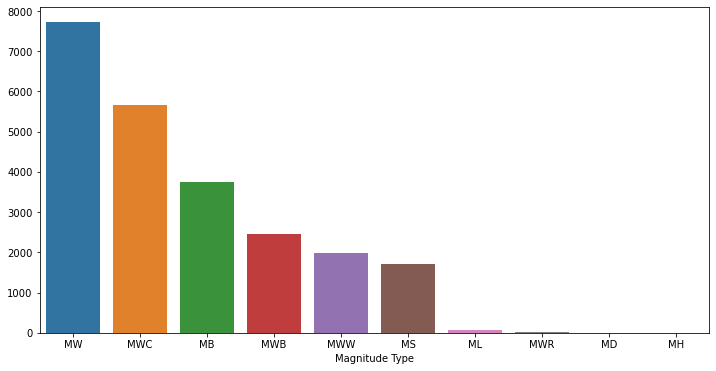

In [11]:
plt.figure(figsize=(12,6))
Mag_Types = IC_df.groupby('Magnitude Type').size().sort_values(ascending=False)
sns.barplot(x = Mag_Types.index, y = Mag_Types.values)

<AxesSubplot:>

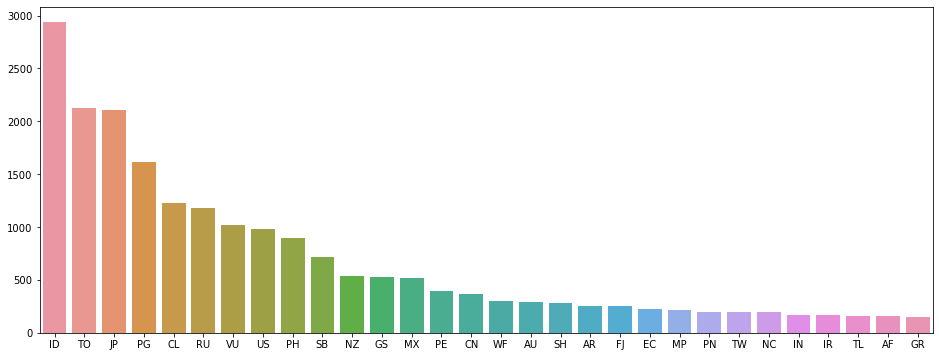

In [13]:
plt.figure(figsize=(16,6))
Country_Count = IC_df['Impacted Country'].value_counts().sort_values(ascending=False).head(30)
sns.barplot(x = Country_Count.index, y = Country_Count.values)

In [14]:
color_map = {'MW': 'blue', 'MWC': 'green', 'MB': 'red', 'MWB': 'orange',
             'MWW': 'purple', 'MS': 'pink', 'ML': 'brown', 'MWR': 'gray',
             'MD': 'black', 'MH': 'cyan'}

colors = IC_df['Magnitude Type'].map(color_map)

layout = go.Layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis=dict(title='Years'),
        yaxis=dict(title='Magnitude'),
        zaxis=dict(title='Months')
    )
)

trace = go.Scatter3d(
    x=IC_df.year,
    y=IC_df.Magnitude,
    z=IC_df.month,
    mode='markers',
    marker=dict(
        size=5,
        color=colors,
        opacity=0.6
    )
)

fig = go.Figure(data=[trace], layout=layout)
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)


In [15]:
layout = go.Layout(
    title='Years Vs Magnitude Vs Month',
    scene=dict(
        xaxis=dict(title='Years'),
        yaxis=dict(title='Magnitude'),
        zaxis=dict(title='Months')
    )
)
trace = go.Scatter3d(
    x=IC_df.year,
    y=IC_df.Magnitude,
    z=IC_df.month,
    mode='markers',
    marker=dict(
        size=5,
        color=df.Magnitude,
        colorscale='blugrn',
        opacity=0.6
    )
)

fig = go.Figure(data=[trace], layout=layout)
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [16]:
data = [
    go.Scattergeo(
        lat=df.Latitude,
        lon=df.Longitude,
        text=df['Magnitude'].astype(str) + ',' + df['year'].astype(str) + ',' + df['Depth'].astype(str), 
        mode='markers',
        marker=dict(
            size=4,
            color=df.Depth,
            colorscale= 'rdylbu',
            opacity=0.5
        )
    )
]

layout = go.Layout(
    title='Earthquakes',
    geo=dict(
        showland=True,
        showcountries=True,
        showocean=True,
        projection=dict(
            type='mercator'
        )
    ),
    width=800,
    height=800  
)

fig = go.Figure(data=data, layout=layout)
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

<AxesSubplot:xlabel='month', ylabel='Count'>

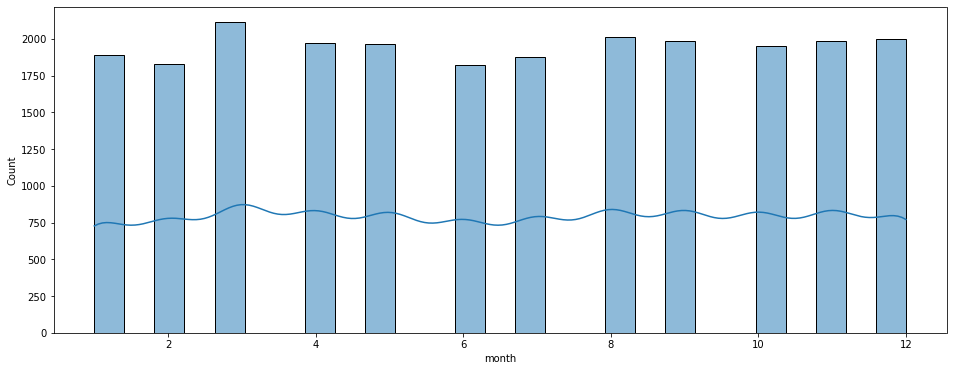

In [17]:
plt.figure(figsize=(16,6))
sns.histplot(data = df.month, kde = True)

In [ ]:
plt.figure(figsize=(18,6))
sns.histplot(data = df.year, bins = 52, kde = True)

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df.corr(), annot=True)

# Model Building

In [12]:
y = df['Magnitude']

In [13]:
X = df.loc[:, ~df.columns.isin(['Magnitude'])]

In [14]:
X.head()

month  year  Latitude  Longitude  Depth
0      1  1965    19.246    145.616  131.6
1      1  1965     1.863    127.352   80.0
2      1  1965   -20.579   -173.972   20.0
3      1  1965   -59.076    -23.557   15.0
4      1  1965    11.938    126.427   15.0

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Gradient Boosting

In [ ]:
learning_rate=[0.3,0.5,0.7]
n_estimators=[40,70,90]  
max_depth=[4,6,10,20]
min_samples_split=[4,6,10]
min_samples_leaf=[4,6,10]
reg = ensemble.GradientBoostingRegressor()
gb_grid=dict(learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
GBClf_20=GridSearchCV(reg,param_grid=gb_grid,cv=10)
GBClf_20.fit(X_train, y_train)
print("GB Model working with test size=0.20")
print("-------------------------------------------")
params_combine_GB_20=pd.concat([pd.DataFrame(GBClf_20.cv_results_["params"]),pd.DataFrame(GBClf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_GB_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",GBClf_20.best_params_)
print("Best accuracy score with test size=0.20: ",GBClf_20.best_score_)
print("--------------------------------------------------------------------------------------") 
'''GBClf_25=GridSearchCV(GB_model,param_grid=gb_grid,cv=10)
GBClf_25.fit(X_train,y_train)
print("GB Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_GB_25=pd.concat([pd.DataFrame(GBClf_25.cv_results_["params"]),pd.DataFrame(GBClf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_GB_25)
print("-------------------------------------------"  )
print("Best parameter setting with test size=0.25: ",GBClf_25.best_params_)
print("Best accuracy score with test size=0.25: ",GBClf_25.best_score_)
print("--------------------------------------------------------------------------------------") '''
''' GBClf_33=GridSearchCV(GB_model,param_grid=gb_grid,cv=10)
GBClf_33.fit(X_train_33,y_train_33)
print("GB Model working with test size=0.33")
print("-------------------------------------------")
params_combine_GB_33=pd.concat([pd.DataFrame(GBClf_33.cv_results_["params"]),pd.DataFrame(GBClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_GB_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",GBClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",GBClf_33.best_score_)
print("--------------------------------------------------------------------------------------") '''

In [ ]:
params = {
    "n_estimators": 250,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

from sklearn import datasets, ensemble
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))

In [ ]:
rmse = sqrt(mse)
print("The Root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("Model Accuracy: %.3f" % reg.score(X_test, y_test))

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## Neural Network

In [ ]:
# from scikeras.wrappers import KerasRegressor

# model = KerasClassifier(build_fn=create_model, verbose=0)

# param_grid = {
#     "neurons": [16], 
#     "batch_size": [10, 20], 
#     "epochs": [10],
#     "activation": ['relu'],
#     "optimizer": ['SGD', 'Adadelta'],
#     "loss": ['squared_hinge']
# }

In [ ]:
# X_train = np.asarray(X_train).astype(np.float32)
# y_train = np.asarray(y_train).astype(np.float32)
# X_test = np.asarray(X_test).astype(np.float32)
# y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# grid_result = grid.fit(X_train, y_train)

# best_params = grid_result.best_params_
# best_params

In [21]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[5]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, validation_split=0.2)

mse, accuracy = model.evaluate(X_test, y_test)

print('MSE: {:.4f}'.format(mse))
print('Accuracy: {:.4f}'.format(accuracy))

Epoch 1/100
410/410 [==============================] - 3s 5ms/step - loss: 2.5617 - mae: 1.0515 - val_loss: 0.4525 - val_mae: 0.5218
Epoch 2/100
410/410 [==============================] - 1s 4ms/step - loss: 0.2854 - mae: 0.4018 - val_loss: 0.2010 - val_mae: 0.3424
Epoch 3/100
410/410 [==============================] - 1s 4ms/step - loss: 0.1906 - mae: 0.3229 - val_loss: 0.1937 - val_mae: 0.3126
Epoch 4/100
410/410 [==============================] - 1s 4ms/step - loss: 0.1876 - mae: 0.3205 - val_loss: 0.1898 - val_mae: 0.3205
Epoch 5/100
410/410 [==============================] - 2s 4ms/step - loss: 0.1864 - mae: 0.3184 - val_loss: 0.2018 - val_mae: 0.3144
Epoch 6/100
410/410 [==============================] - 1s 3ms/step - loss: 0.1837 - mae: 0.3174 - val_loss: 0.1907 - val_mae: 0.3282
Epoch 7/100
410/410 [==============================] - 2s 4ms/step - loss: 0.1858 - mae: 0.3190 - val_loss: 0.1993 - val_mae: 0.3546
Epoch 8/100
410/410 [==============================] - 2s 4ms/step - 

In [22]:
print('The Root mean squared error (RMSE) on test set: {:.4f}'.format(sqrt(mse)))
print('Model Accuracy: {:.4f}'.format(accuracy))

The Root mean squared error (RMSE) on test set: 0.4235
Model Accuracy: 0.3003


In [23]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[5]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, validation_split=0.2)

mse, accuracy = model.evaluate(X_test, y_test)

print('MSE: {:.4f}'.format(mse))
print('Accuracy: {:.4f}'.format(accuracy))

Epoch 1/100
410/410 [==============================] - 3s 5ms/step - loss: 2.0586 - mae: 0.9302 - val_loss: 0.3512 - val_mae: 0.4502
Epoch 2/100
410/410 [==============================] - 2s 4ms/step - loss: 0.2315 - mae: 0.3565 - val_loss: 0.1951 - val_mae: 0.3419
Epoch 3/100
410/410 [==============================] - 2s 4ms/step - loss: 0.1881 - mae: 0.3211 - val_loss: 0.1871 - val_mae: 0.3168
Epoch 4/100
410/410 [==============================] - 2s 4ms/step - loss: 0.1868 - mae: 0.3186 - val_loss: 0.1894 - val_mae: 0.3248
Epoch 5/100
410/410 [==============================] - 2s 4ms/step - loss: 0.1846 - mae: 0.3177 - val_loss: 0.1994 - val_mae: 0.3014
Epoch 6/100
410/410 [==============================] - 2s 4ms/step - loss: 0.1886 - mae: 0.3203 - val_loss: 0.2002 - val_mae: 0.3497
Epoch 7/100
410/410 [==============================] - 2s 4ms/step - loss: 0.1852 - mae: 0.3183 - val_loss: 0.1882 - val_mae: 0.3248
Epoch 8/100
410/410 [==============================] - 2s 4ms/step - 

In [16]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[5]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, validation_split=0.2)

mse, accuracy = model.evaluate(X_test, y_test)

print('MSE: {:.4f}'.format(mse))
print('Accuracy: {:.4f}'.format(accuracy))

Epoch 1/100
410/410 [==============================] - 2s 2ms/step - loss: 1.6143 - mae: 0.8405 - val_loss: 0.2815 - val_mae: 0.3965
Epoch 2/100
410/410 [==============================] - 1s 2ms/step - loss: 0.2099 - mae: 0.3383 - val_loss: 0.1959 - val_mae: 0.3131
Epoch 3/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1914 - mae: 0.3244 - val_loss: 0.1919 - val_mae: 0.3314
Epoch 4/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1913 - mae: 0.3240 - val_loss: 0.2027 - val_mae: 0.3005
Epoch 5/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1901 - mae: 0.3234 - val_loss: 0.2007 - val_mae: 0.3259
Epoch 6/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1875 - mae: 0.3203 - val_loss: 0.2042 - val_mae: 0.3138
Epoch 7/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1869 - mae: 0.3204 - val_loss: 0.1872 - val_mae: 0.3166
Epoch 8/100
410/410 [==============================] - 1s 2ms/step - 

410/410 [==============================] - 1s 2ms/step - loss: 0.1789 - mae: 0.3117 - val_loss: 0.1835 - val_mae: 0.3263
Epoch 63/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1783 - mae: 0.3111 - val_loss: 0.1856 - val_mae: 0.3341
Epoch 64/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1773 - mae: 0.3111 - val_loss: 0.1862 - val_mae: 0.3339
Epoch 65/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1767 - mae: 0.3102 - val_loss: 0.1819 - val_mae: 0.3108
Epoch 66/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1773 - mae: 0.3106 - val_loss: 0.1944 - val_mae: 0.3050
Epoch 67/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1786 - mae: 0.3118 - val_loss: 0.1871 - val_mae: 0.3145
Epoch 68/100
410/410 [==============================] - 1s 2ms/step - loss: 0.1773 - mae: 0.3100 - val_loss: 0.1911 - val_mae: 0.3411
Epoch 69/100
410/410 [==============================] - 1s 2ms/step - loss:

In [17]:
print('The Root mean squared error (RMSE) on test set: {:.4f}'.format(sqrt(mse)))
print('Model Accuracy: {:.4f}'.format(accuracy))

The Root mean squared error (RMSE) on test set: 0.4220
Model Accuracy: 0.3134
